#### Exploratory Data Analysis (EDA)

Dataset: 

- _videogames_clean.csv_

Author: Luis Sergio Pastrana Lemus  
Date: 2025-05-29

# Exploratory Data Analysis – Videogames Dataset

## __1. Libraries__

In [1]:
from pathlib import Path
import sys

# Define project root dynamically, gets the current directory from which the notebook belongs and moves one level upper
project_root = Path.cwd().parent

# Add src to sys.path if it is not already
if str(project_root) not in sys.path:

    sys.path.append(str(project_root))

# Import function directly (more controlled than import *)
from src import *


from IPython.display import display, HTML
import numpy as np
import os
import pandas as pd

## __2. Path to Data file__

In [2]:
# Build route to data file and upload
data_file_path = project_root / "data" / "processed" / "clean"
df_vg = load_dataset_from_csv(data_file_path, "videogames_clean.csv", sep=',', header='infer')

data_file_path = project_root / "data" / "processed" / "feature"
df_vg_platform_sales = load_dataset_from_csv(data_file_path, "vg_platform_sales_feature.csv", sep=',', header='infer')
df_vg_platform_top_sales_year = load_dataset_from_csv(data_file_path, "vg_platform_top_sales_year_feature.csv", sep=',', header='infer')
df_vg_platform_popular_loss = load_dataset_from_csv(data_file_path, "vg_platform_popular_loss_feature.csv", sep=',', header='infer')
df_vg_platform_profit = load_dataset_from_csv(data_file_path, "vg_platform_profit_feature.csv", sep=',', header='infer')
df_vg_platform_avg_sales = load_dataset_from_csv(data_file_path, "vg_platform_avg_sales_feature.csv", sep=',', header='infer')
df_vg_us_sales = load_dataset_from_csv(data_file_path, "vg_us_sales_feature.csv", sep=',', header='infer')
df_vg_cs_sales = load_dataset_from_csv(data_file_path, "vg_cs_sales_feature.csv", sep=',', header='infer')
df_vg_games_platform = load_dataset_from_csv(data_file_path, "vg_games_platform_feature.csv", sep=',', header='infer')
df_vg_games_genre = load_dataset_from_csv(data_file_path, "vg_games_genre_feature.csv", sep=',', header='infer')

## __3. Exploratory Data Analysis__

### 3.0 Casting Data types

In [3]:
df_vg = cast_datatypes(df_vg)

In [4]:
df_vg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   name             16715 non-null  string  
 1   platform         16715 non-null  category
 2   year_of_release  16713 non-null  float64 
 3   genre            16715 non-null  category
 4   na_sales         16715 non-null  float64 
 5   eu_sales         16715 non-null  float64 
 6   jp_sales         16715 non-null  float64 
 7   other_sales      16715 non-null  float64 
 8   critic_score     15360 non-null  float32 
 9   user_score       15185 non-null  float32 
 10  rating           15390 non-null  object  
dtypes: category(2), float32(2), float64(5), object(1), string(1)
memory usage: 1.1+ MB


In [5]:
# Adjust sales values for better visualization: original values (in millions) are scaled up by 1000
# to convert them to thousands, improving readability in graphs.
sales_columns = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']
df_vg[sales_columns] = df_vg[sales_columns] * 1000

### 3.1  Descriptive Statistics

#### 3.1.1 Descriptive statistics for videogames datasets

In [6]:
# Descriptive statistics for videogames dataset
df_vg.describe(include='all')

name platform  year_of_release   genre      na_sales      eu_sales      jp_sales   other_sales  critic_score    user_score rating
count            16715    16715    16713.000000    16715  16715.000000  16715.000000  16715.000000  16715.000000  15360.000000  15185.000000  15390
unique           11531       31             NaN       13           NaN           NaN           NaN           NaN           NaN           NaN      8
top     need_for_sp...      ps2             NaN   action           NaN           NaN           NaN           NaN           NaN           NaN      E
freq                12     2161             NaN     3369           NaN           NaN           NaN           NaN           NaN           NaN   6560
mean               NaN      NaN     2006.456770      NaN    263.377206    145.059527     77.617110     47.341908     69.318771      7.211998    NaN
std                NaN      NaN        5.941257      NaN    813.603522    503.338514    308.853426    186.731041     11.626289      1.214103    NaN
min                NaN      NaN     1977.000000      NaN      0.000000      0.000000      0.000000      0.000000     13.000000      0.000000    NaN
25%                NaN      NaN     2003.000000      NaN      0.000000      0.000000      0.000000      0.000000     63.000000      6.800000    NaN
50%                NaN      NaN     2007.000000      NaN     80.000000     20.000000      0.000000     10.000000     70.000000      7.400000    NaN
75%                NaN      NaN     2010.000000      NaN    240.000000    110.000000     40.000000     30.000000     76.000000      8.000000    NaN
max                NaN      NaN     2023.000000      NaN  41360.000000  28960.000000  10220.000000  10570.000000     98.000000      9.700000    NaN

#### 3.1.2 Descriptive statistics for videogames dataset, quantitative values

<table>
  <thead>
    <tr>
      <th>CV (%)</th>
      <th>Interpretation for Coefficient of Variation</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td><small><strong>0–10%</strong></small></td>
      <td><small><strong>Very low</strong> variability → <strong>very reliable</strong> Mean</small></td>
    </tr>
    <tr>
      <td><small><strong>10–20%</strong></small></td>
      <td><small><strong>Moderate</strong> variability → <strong>reliable</strong> Mean</small></td>
    </tr>
    <tr>
      <td><small><strong>20–30%</strong></small></td>
      <td><small><strong>Considerable</strong> variability → <strong>some what skewed</strong> Mean</small></td>
    </tr>
    <tr>
      <td><small><strong>>30%</strong></small></td>
      <td><small>High<strong> variability</strong> → <strong>prefer</strong> Median</small></td>
    </tr>
  </tbody>
</table>


#### 3.1.2.1 Descriptive statistics for videogames 'year_of_release' column

In [7]:
df_vg['year_of_release'].describe()

count    16713.000000
mean      2006.456770
std          5.941257
min       1977.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2023.000000
Name: year_of_release, dtype: float64

In [8]:
# Evaluate the coefficient of variation to select the proper measure of central tendency
evaluate_central_trend(df_vg, 'year_of_release')

In [9]:
# Evaluate boundary thresholds and detect potential outliers
outlier_limit_bounds(df_vg, 'year_of_release', bound='both', clamp_zero=False)

(                 name platform  year_of_release       genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score rating
 1      super_mario...      nes          1985.0     platform   29080.0    3580.0    6810.0        770.0           NaN         NaN    NaN
 5              tetris       gb          1989.0       puzzle   23200.0    2260.0    4220.0        580.0           NaN         NaN    NaN
 9           duck_hunt      nes          1984.0      shooter   26930.0     630.0     280.0        470.0           NaN         NaN    NaN
 18     super_mario...     snes          1990.0     platform   12780.0    3750.0    3540.0        550.0           NaN         NaN    NaN
 21     super_mario...       gb          1989.0     platform   10830.0    2710.0    4180.0        420.0           NaN         NaN    NaN
 ...               ...      ...             ...          ...       ...       ...       ...          ...           ...         ...    ...
 14610            doom       pc          

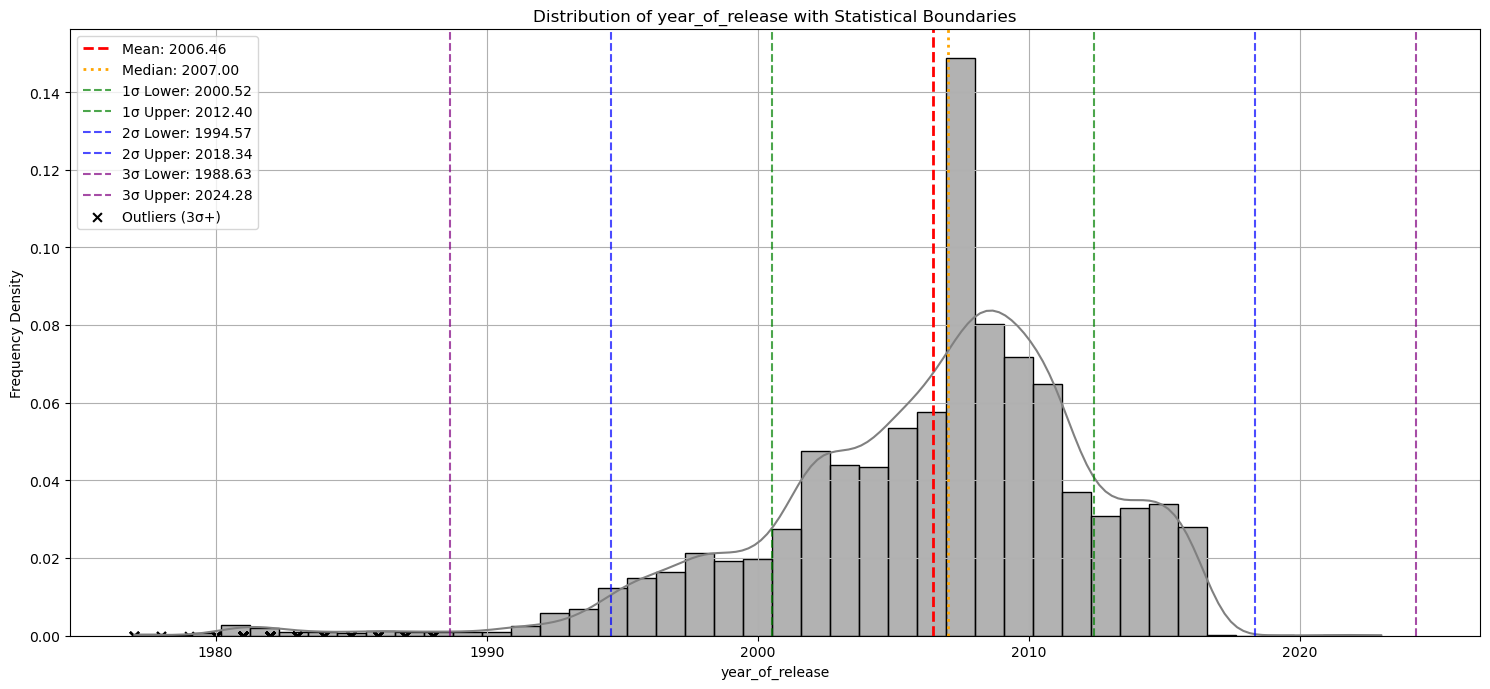

In [10]:
plot_distribution_dispersion(df_vg, 'year_of_release', bins=43)

#### 3.1.2.2 Descriptive statistics for videogames 'na_sales' column

In [11]:
df_vg['na_sales'].describe()

count    16715.000000
mean       263.377206
std        813.603522
min          0.000000
25%          0.000000
50%         80.000000
75%        240.000000
max      41360.000000
Name: na_sales, dtype: float64

In [12]:
# Evaluate the coefficient of variation to select the proper measure of central tendency
evaluate_central_trend(df_vg, 'na_sales')

In [13]:
# Evaluate boundary thresholds and detect potential outliers
outlier_limit_bounds(df_vg, 'na_sales', bound='both', clamp_zero=True)

(Empty DataFrame
 Columns: [name, platform, year_of_release, genre, na_sales, eu_sales, jp_sales, other_sales, critic_score, user_score, rating]
 Index: [],
                 name platform  year_of_release         genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score rating
 0         wii_sports      wii          2006.0         sports   41360.0   28960.0    3770.0       8450.0          76.0         8.0      E
 1     super_mario...      nes          1985.0       platform   29080.0    3580.0    6810.0        770.0           NaN         NaN    NaN
 2     mario_kart_wii      wii          2008.0         racing   15680.0   12760.0    3790.0       3290.0          82.0         8.3      E
 3     wii_sports_...      wii          2009.0         sports   15610.0   10930.0    3280.0       2950.0          80.0         8.0      E
 4     pokemon_red...       gb          1996.0   role_playing   11270.0    8890.0   10220.0       1000.0           NaN         NaN    NaN
 ...           

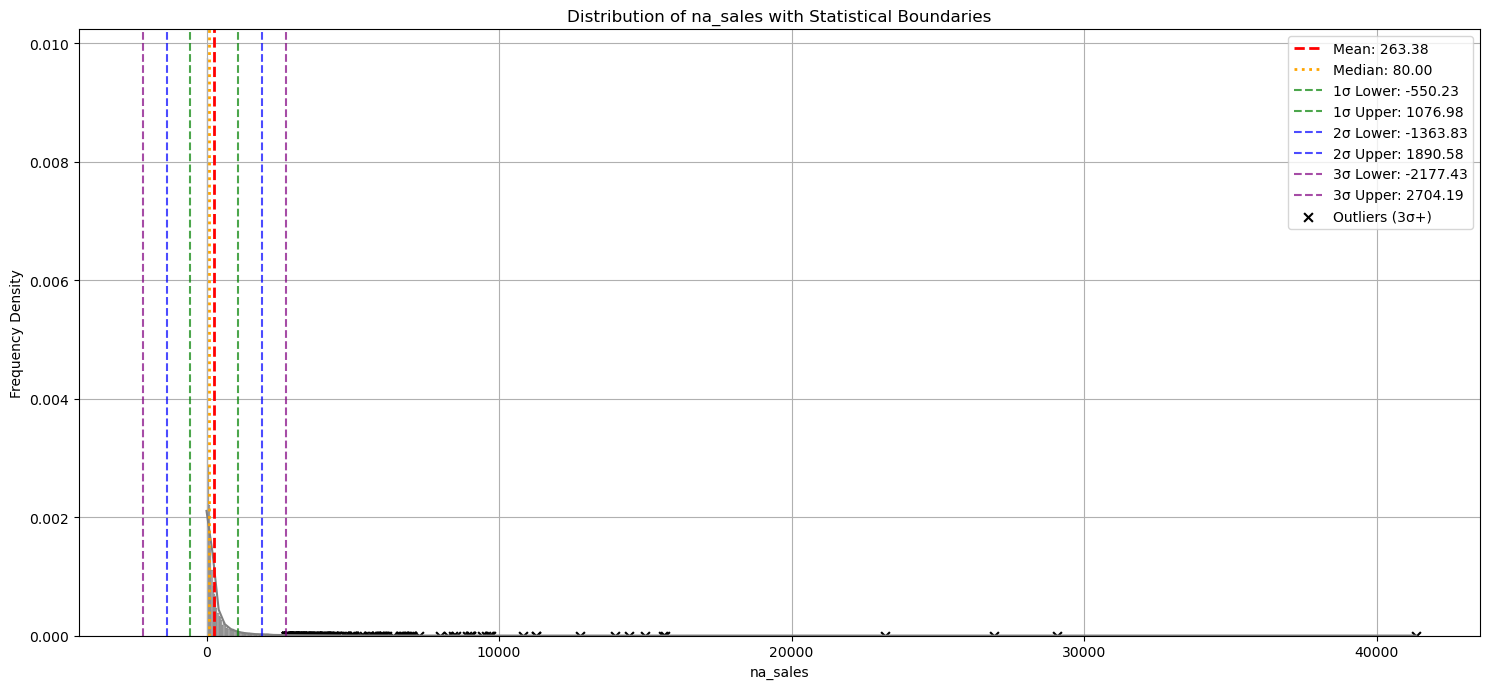

In [14]:
plot_distribution_dispersion(df_vg, 'na_sales', bins=1000)

#### 3.1.2.3 Descriptive statistics for videogames 'eu_sales' column

In [15]:
df_vg['na_sales'].describe()

count    16715.000000
mean       263.377206
std        813.603522
min          0.000000
25%          0.000000
50%         80.000000
75%        240.000000
max      41360.000000
Name: na_sales, dtype: float64

In [16]:
# Evaluate the coefficient of variation to select the proper measure of central tendency
evaluate_central_trend(df_vg, 'eu_sales')

In [17]:
# Evaluate boundary thresholds and detect potential outliers
outlier_limit_bounds(df_vg, 'eu_sales', bound='both', clamp_zero=True)

(Empty DataFrame
 Columns: [name, platform, year_of_release, genre, na_sales, eu_sales, jp_sales, other_sales, critic_score, user_score, rating]
 Index: [],
                 name platform  year_of_release         genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score rating
 0         wii_sports      wii          2006.0         sports   41360.0   28960.0    3770.0       8450.0          76.0        8.00      E
 1     super_mario...      nes          1985.0       platform   29080.0    3580.0    6810.0        770.0           NaN         NaN    NaN
 2     mario_kart_wii      wii          2008.0         racing   15680.0   12760.0    3790.0       3290.0          82.0        8.30      E
 3     wii_sports_...      wii          2009.0         sports   15610.0   10930.0    3280.0       2950.0          80.0        8.00      E
 4     pokemon_red...       gb          1996.0   role_playing   11270.0    8890.0   10220.0       1000.0           NaN         NaN    NaN
 ...           

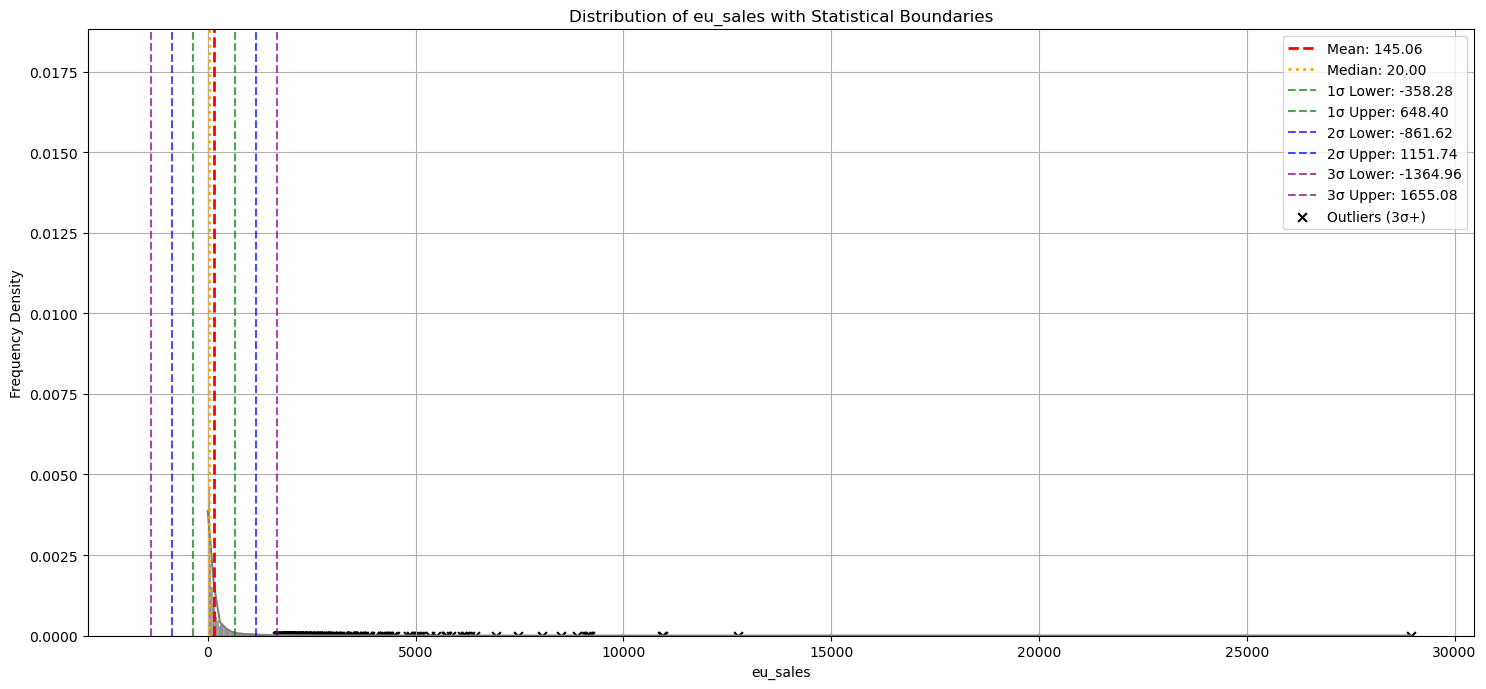

In [18]:
plot_distribution_dispersion(df_vg, 'eu_sales', bins=1000)

#### 3.1.2.4 Descriptive statistics for videogames 'jp_sales' column

In [19]:
df_vg['jp_sales'].describe()

count    16715.000000
mean        77.617110
std        308.853426
min          0.000000
25%          0.000000
50%          0.000000
75%         40.000000
max      10220.000000
Name: jp_sales, dtype: float64

In [20]:
# Evaluate the coefficient of variation to select the proper measure of central tendency
evaluate_central_trend(df_vg, 'jp_sales')

In [21]:
# Evaluate boundary thresholds and detect potential outliers
outlier_limit_bounds(df_vg, 'eu_sales', bound='both', clamp_zero=True)

(Empty DataFrame
 Columns: [name, platform, year_of_release, genre, na_sales, eu_sales, jp_sales, other_sales, critic_score, user_score, rating]
 Index: [],
                 name platform  year_of_release         genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score rating
 0         wii_sports      wii          2006.0         sports   41360.0   28960.0    3770.0       8450.0          76.0        8.00      E
 1     super_mario...      nes          1985.0       platform   29080.0    3580.0    6810.0        770.0           NaN         NaN    NaN
 2     mario_kart_wii      wii          2008.0         racing   15680.0   12760.0    3790.0       3290.0          82.0        8.30      E
 3     wii_sports_...      wii          2009.0         sports   15610.0   10930.0    3280.0       2950.0          80.0        8.00      E
 4     pokemon_red...       gb          1996.0   role_playing   11270.0    8890.0   10220.0       1000.0           NaN         NaN    NaN
 ...           

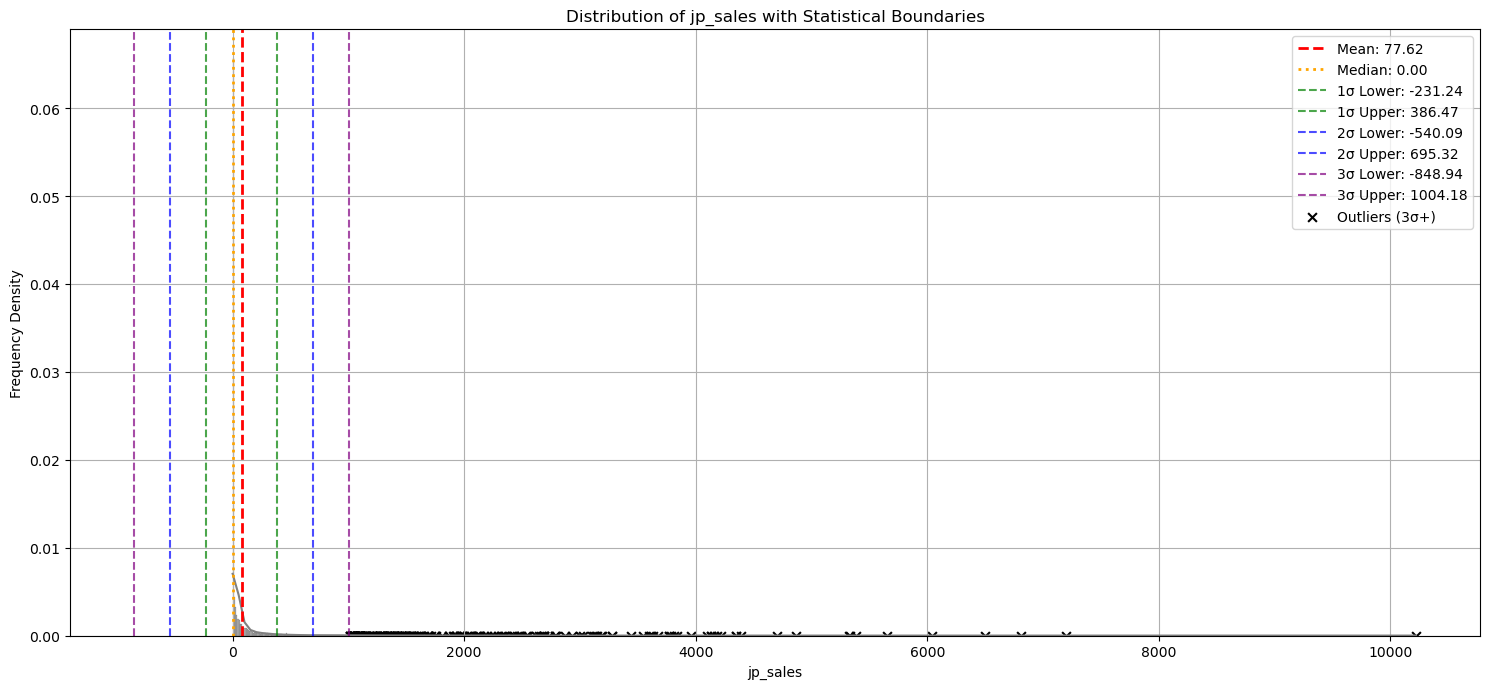

In [22]:
plot_distribution_dispersion(df_vg, 'jp_sales', bins=1000)

#### 3.1.2.5 Descriptive statistics for videogames 'other_sales' column

In [23]:
df_vg['other_sales'].describe()

count    16715.000000
mean        47.341908
std        186.731041
min          0.000000
25%          0.000000
50%         10.000000
75%         30.000000
max      10570.000000
Name: other_sales, dtype: float64

In [24]:
# Evaluate the coefficient of variation to select the proper measure of central tendency
evaluate_central_trend(df_vg, 'other_sales')

In [25]:
# Evaluate boundary thresholds and detect potential outliers
outlier_limit_bounds(df_vg, 'other_sales', bound='both', clamp_zero=True)

(Empty DataFrame
 Columns: [name, platform, year_of_release, genre, na_sales, eu_sales, jp_sales, other_sales, critic_score, user_score, rating]
 Index: [],
                 name platform  year_of_release         genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score rating
 0         wii_sports      wii          2006.0         sports   41360.0   28960.0    3770.0       8450.0          76.0        8.00      E
 1     super_mario...      nes          1985.0       platform   29080.0    3580.0    6810.0        770.0           NaN         NaN    NaN
 2     mario_kart_wii      wii          2008.0         racing   15680.0   12760.0    3790.0       3290.0          82.0        8.30      E
 3     wii_sports_...      wii          2009.0         sports   15610.0   10930.0    3280.0       2950.0          80.0        8.00      E
 4     pokemon_red...       gb          1996.0   role_playing   11270.0    8890.0   10220.0       1000.0           NaN         NaN    NaN
 ...           

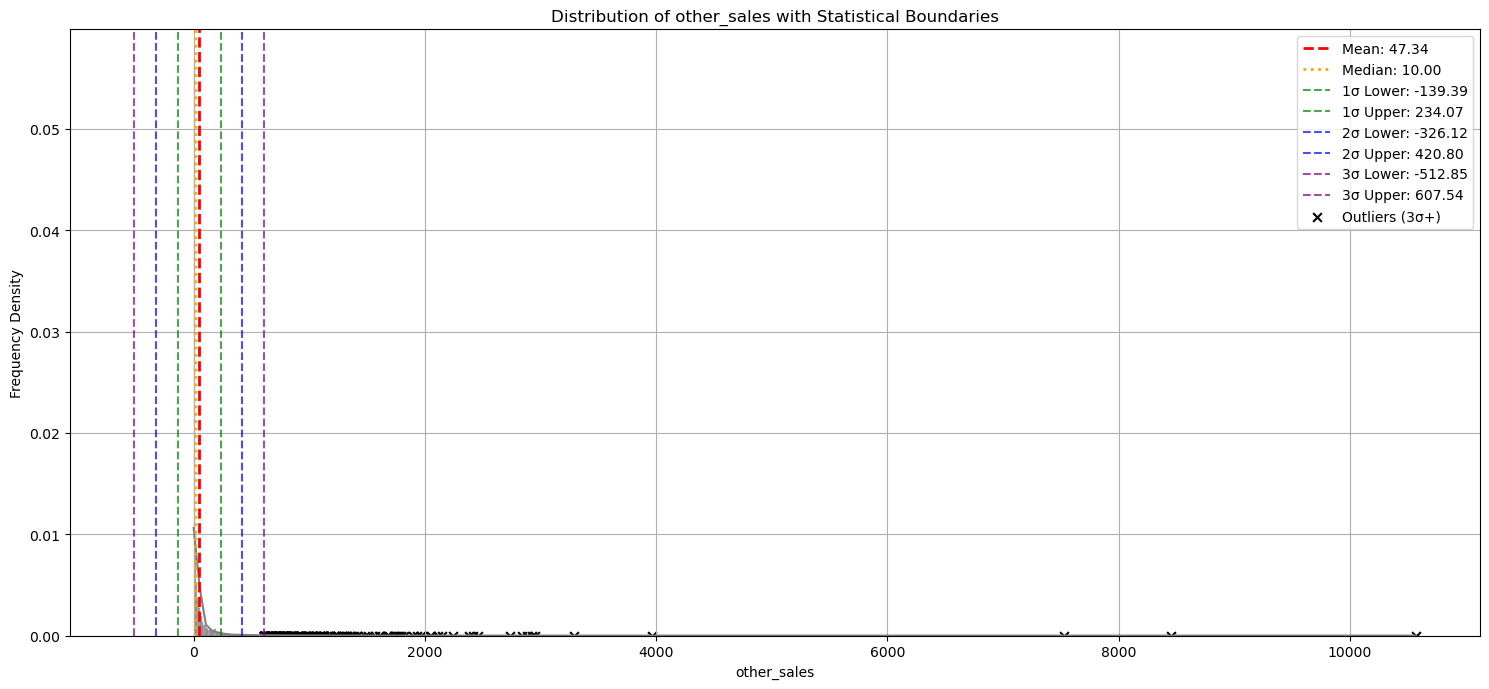

In [26]:
plot_distribution_dispersion(df_vg, 'other_sales', bins=1000)

### 3.2 Data Visualization: Distributions and Relationships

#### 3.2.1 Covariance and Correlation Analysis 

##### 3.2.1.1 Covariance Matrix

In [27]:
# Covariance for video games data
df_vg[['year_of_release', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score']].cov()

year_of_release       na_sales       eu_sales       jp_sales   other_sales  critic_score  user_score
year_of_release       35.298529     -447.818621      14.120575    -301.322724     42.184575     -1.996080   -1.657403
na_sales            -447.818621   661950.691439  313418.319354  112975.895304  97026.818791   1655.175003   58.173118
eu_sales              14.120575   313418.319354  253349.659912   67633.601829  67934.413952   1098.351318   23.878354
jp_sales            -301.322724   112975.895304   67633.601829   95390.438525  16787.808317    417.567398   37.716177
other_sales           42.184575    97026.818791   67934.413952   16787.808317  34868.481572    374.020146    8.367815
critic_score          -1.996080     1655.175003    1098.351318     417.567398    374.020146    135.169364    6.935640
user_score            -1.657403       58.173118      23.878354      37.716177      8.367815      6.935640    1.474058

##### 3.2.1.2 Correlation Matrix

| Correlation Value     | Interpretation                |
| --------------------- | ----------------------------- |
| `+0.7` to `+1.0`      | Strong positive correlation   |
| `+0.3` to `+0.7`      | Moderate positive correlation |
| `0.0` to `+0.3`       | Weak positive correlation     |
| `0`                   | No correlation                |
| `-0.3` to `0`         | Weak negative correlation     |
| `-0.7` to `-0.3`      | Moderate negative correlation |
| `-1.0` to `-0.7`      | Strong negative correlation   |


In [28]:
# Correlation for video games data
df_vg[['year_of_release', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score']].corr()

year_of_release  na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score
year_of_release        1.000000  -0.092638  0.004722 -0.164201     0.038022     -0.037168   -0.299696
na_sales              -0.092638   1.000000  0.765335  0.449594     0.638649      0.198730    0.066704
eu_sales               0.004722   0.765335  1.000000  0.435061     0.722792      0.184806    0.038313
jp_sales              -0.164201   0.449594  0.435061  1.000000     0.291089      0.134118    0.115805
other_sales            0.038022   0.638649  0.722792  0.291089     1.000000      0.166257    0.035426
critic_score          -0.037168   0.198730  0.184806  0.134118     0.166257      1.000000    0.491288
user_score            -0.299696   0.066704  0.038313  0.115805     0.035426      0.491288    1.000000

In [29]:
evaluate_correlation(df_vg)

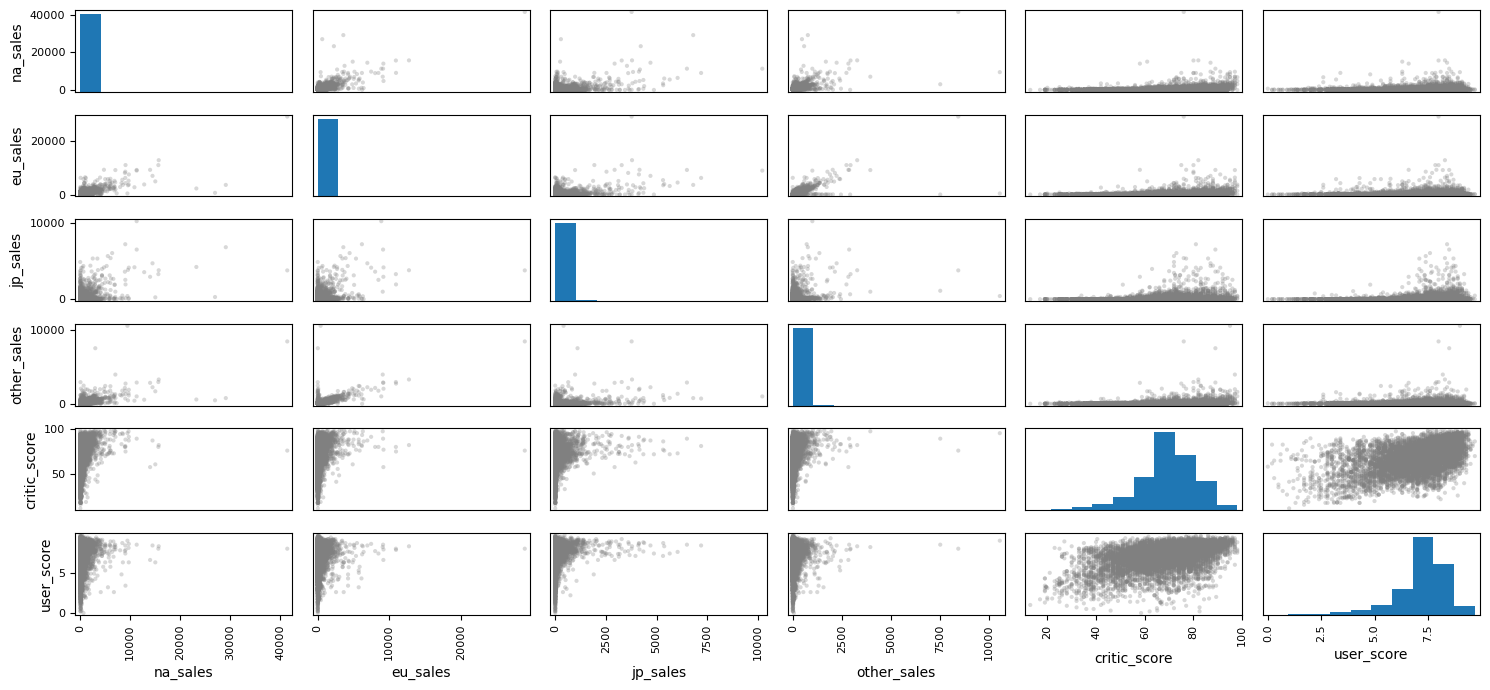

In [30]:
plot_scatter_matrix(df_vg[['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score']])

### 3.3 Data Visualization: Data dispersion and outliers

3.3.1 Data dispersion and outliers for 'year_of_release'

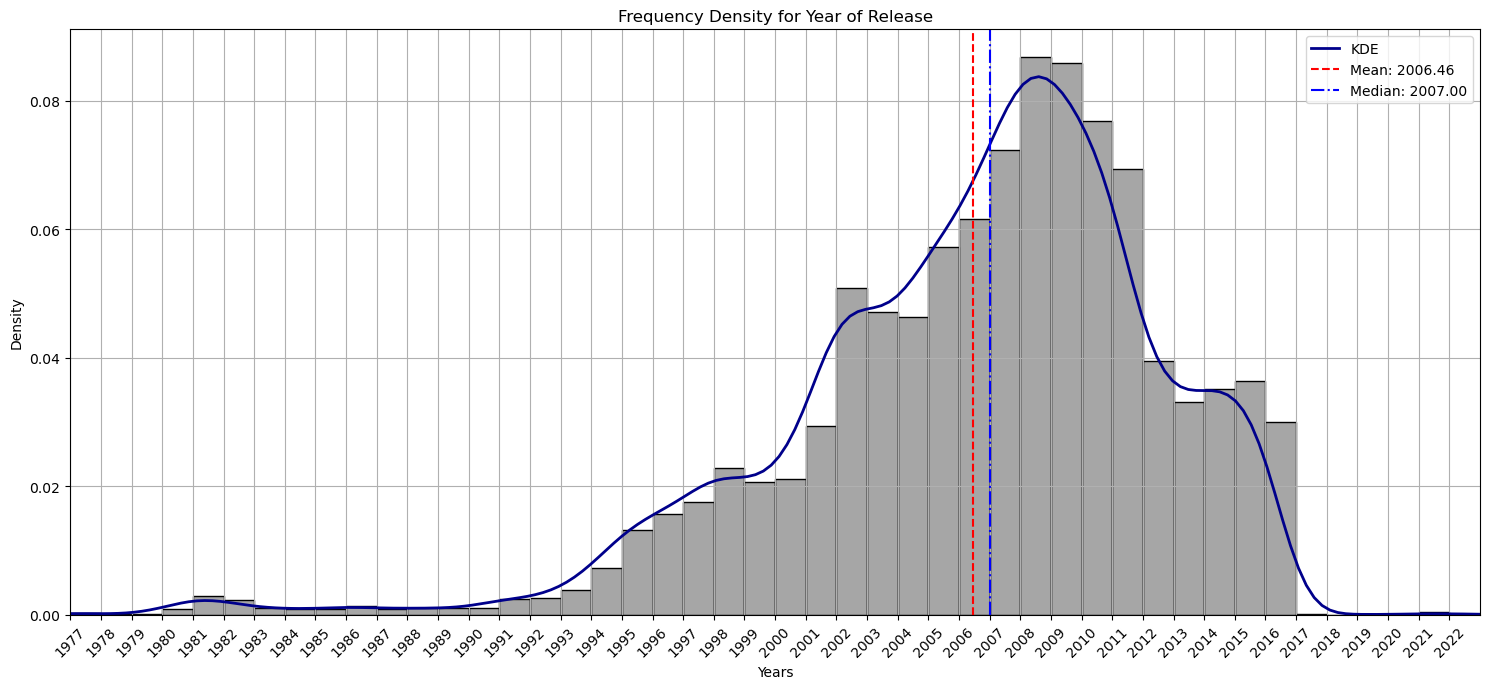

In [31]:
# Year of Release Distribution Frequency and Frequency density
plot_frequency_density(df_vg['year_of_release'], bins=range(1977, 2023, 1), color='grey', title='Frequency Density for Year of Release', xlabel='Years', 
                       ylabel='Density', xticks_range=(1977, 2023, 1), rotation=45, show_kde=True)

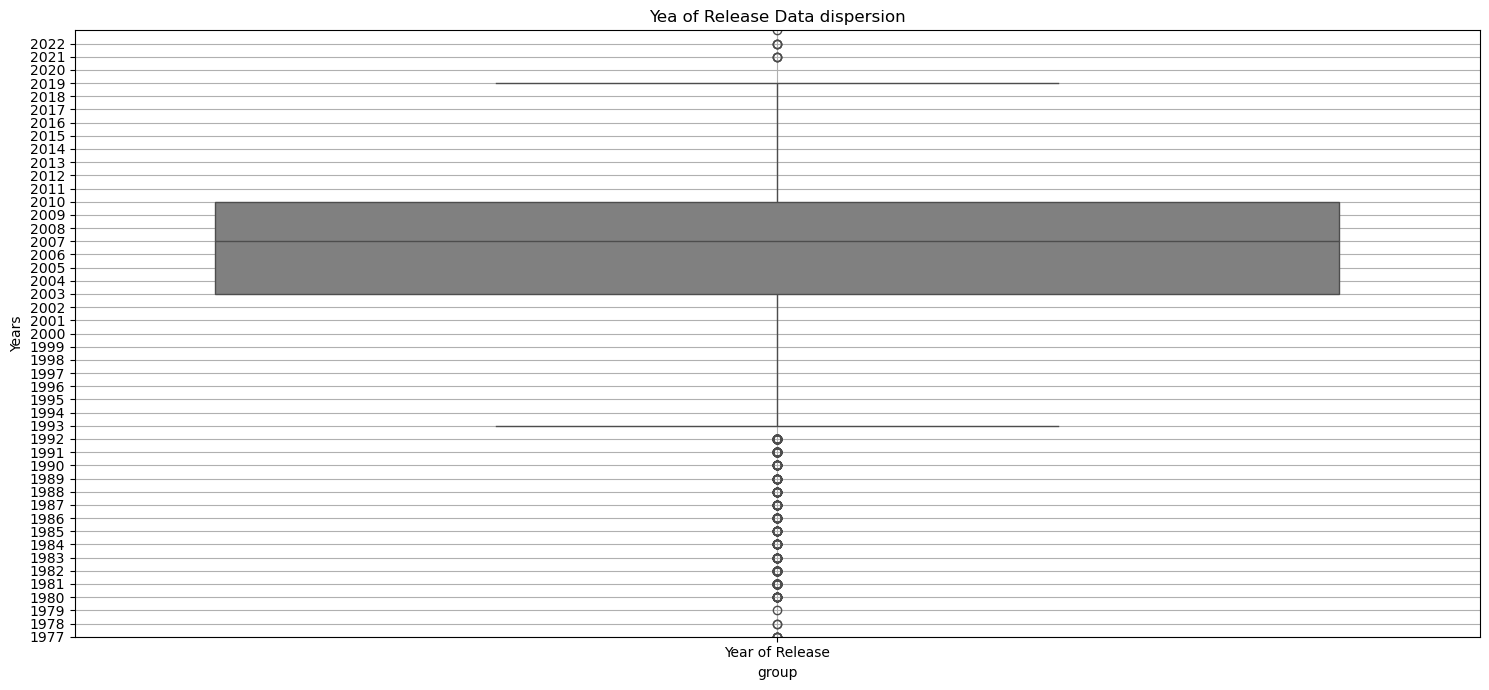

In [32]:
# Year of Release data dispersion
plot_boxplots(ds_list=[df_vg['year_of_release']], xlabels=['Year of Release'], ylabel='Years',
              title='Yea of Release Data dispersion', yticks_range=(1977, 2023, 1), rotation=0, color=['grey'])

3.3.2 Data dispersion and outliers for 'na_sales'

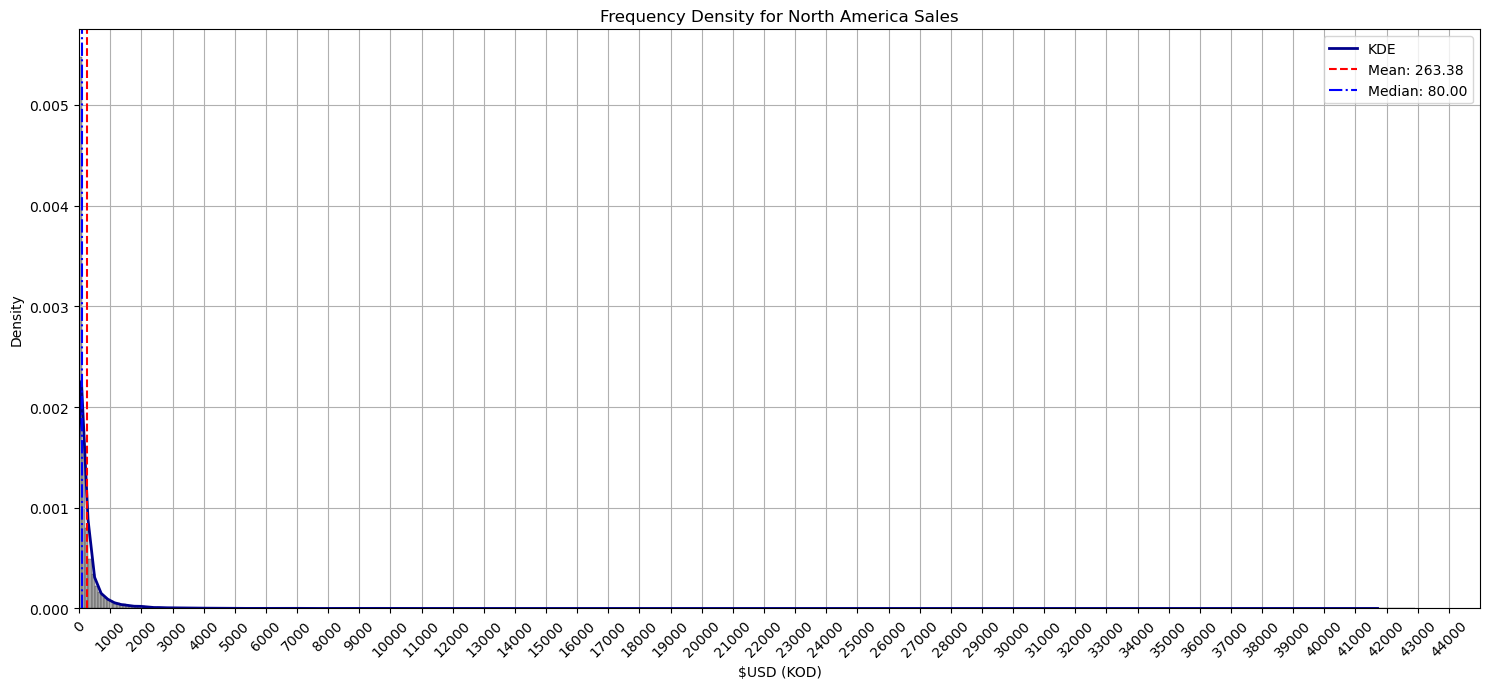

In [33]:
# NA Sales Distribution Frequency and Frequency density
plot_frequency_density(df_vg['na_sales'], bins=range(0, 43000, 100), color='grey', title='Frequency Density for North America Sales', 
                       xlabel='$USD (KOD)', ylabel='Density', xticks_range=(0, 45000, 1000), rotation=45, show_kde=True)

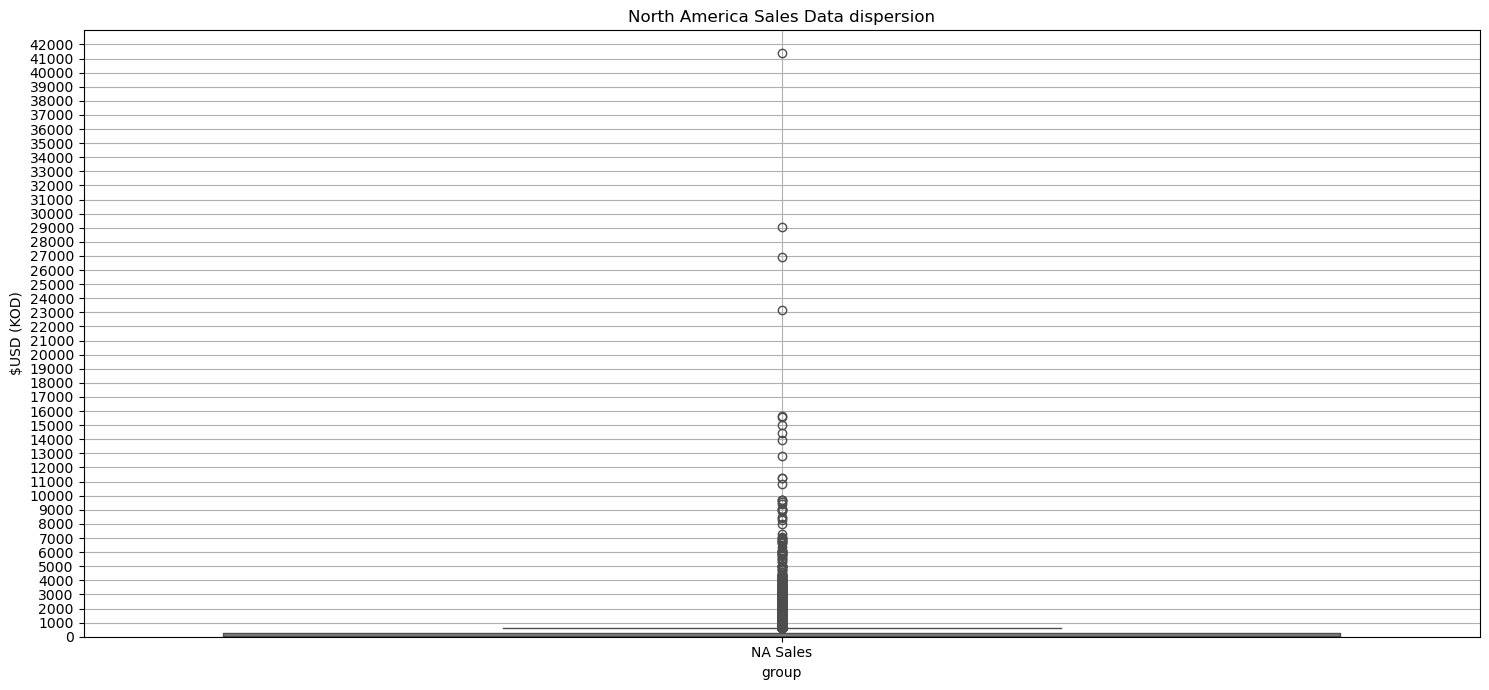

In [34]:
# NA Sales data dispersion
plot_boxplots(ds_list=[df_vg['na_sales']], xlabels=['NA Sales'], ylabel='$USD (KOD)',
              title='North America Sales Data dispersion', yticks_range=(0, 43000, 1000),  rotation=0, color=['grey'])

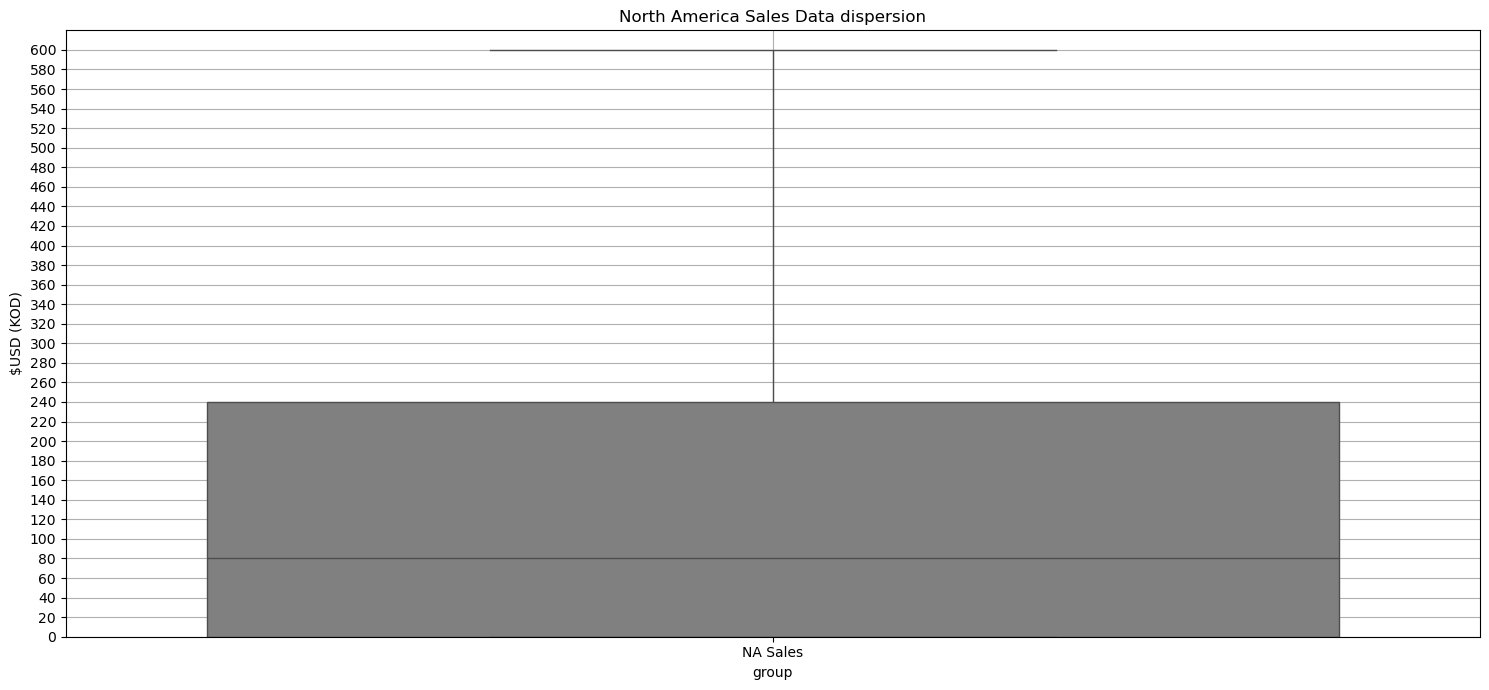

In [35]:
plot_boxplots(ds_list=[df_vg['na_sales']], xlabels=['NA Sales'], ylabel='$USD (KOD)',
              title='North America Sales Data dispersion', yticks_range=(0, 620, 20), rotation=0, color=['grey'], showfliers=False)

3.3.3 Data dispersion and outliers for 'eu_sales'

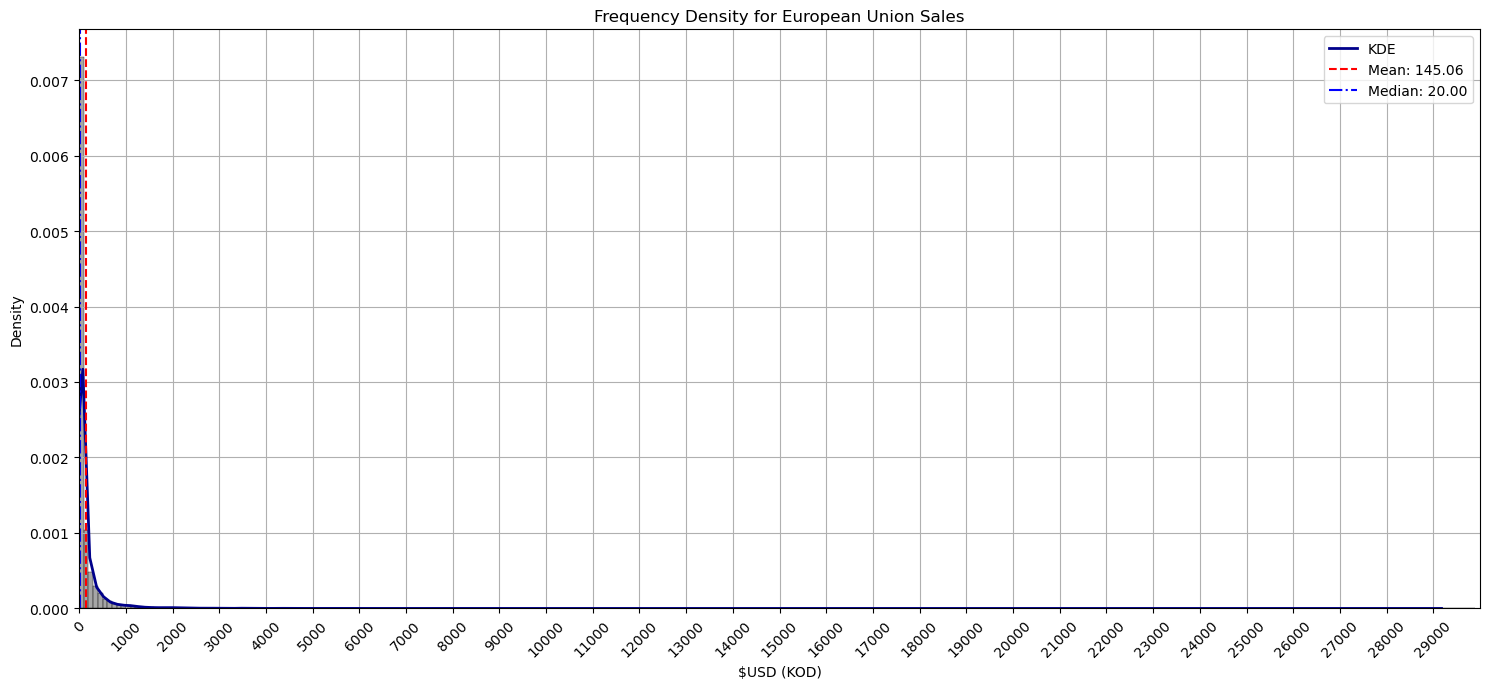

In [36]:
# EU Sales Distribution Frequency and Frequency density
plot_frequency_density(df_vg['eu_sales'], bins=range(0, 30000, 100), color='grey', title='Frequency Density for European Union Sales', 
                       xlabel='$USD (KOD)', xticks_range=(0, 30000, 1000),  ylabel='Density', rotation=45, show_kde=True)

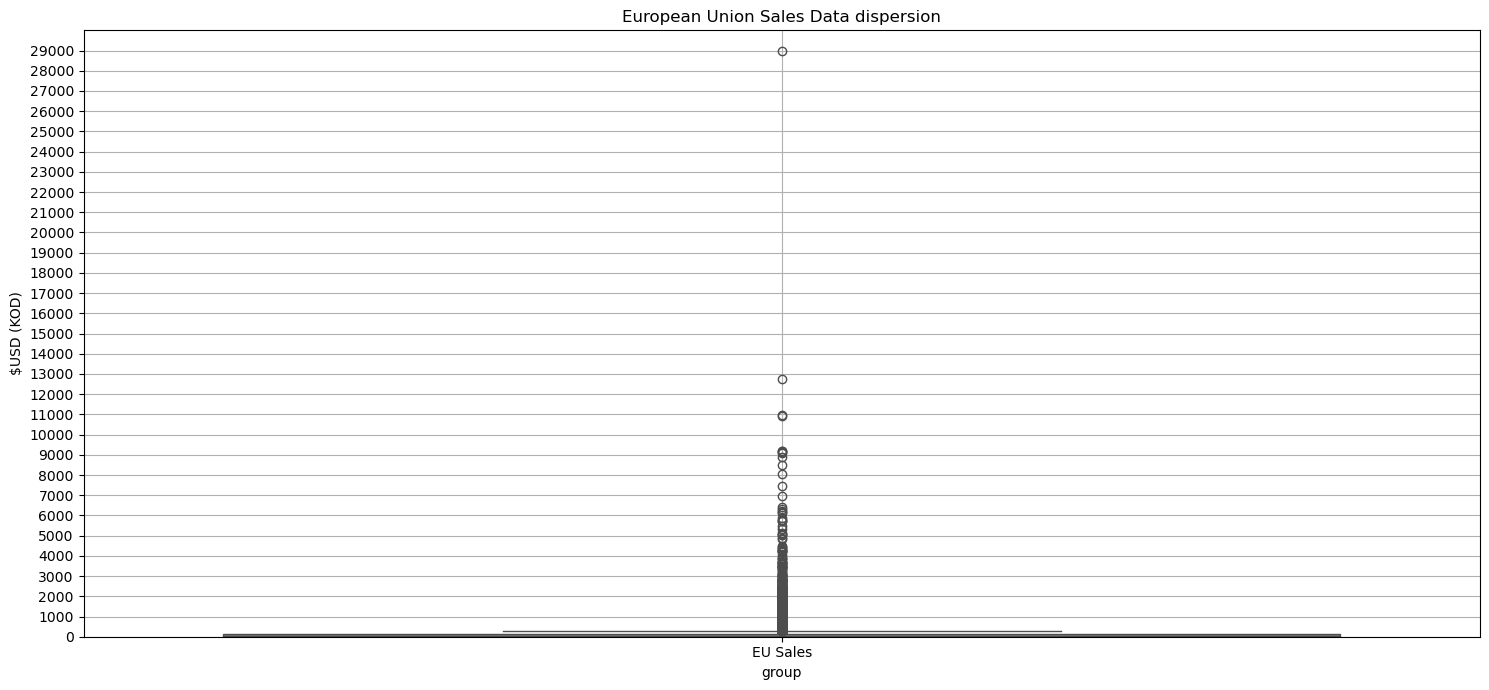

In [37]:
# EU Sales data dispersion
plot_boxplots(ds_list=[df_vg['eu_sales']], xlabels=['EU Sales'], ylabel='$USD (KOD)',
              title='European Union Sales Data dispersion', yticks_range=(0, 30000, 1000),  rotation=0, color=['grey'])

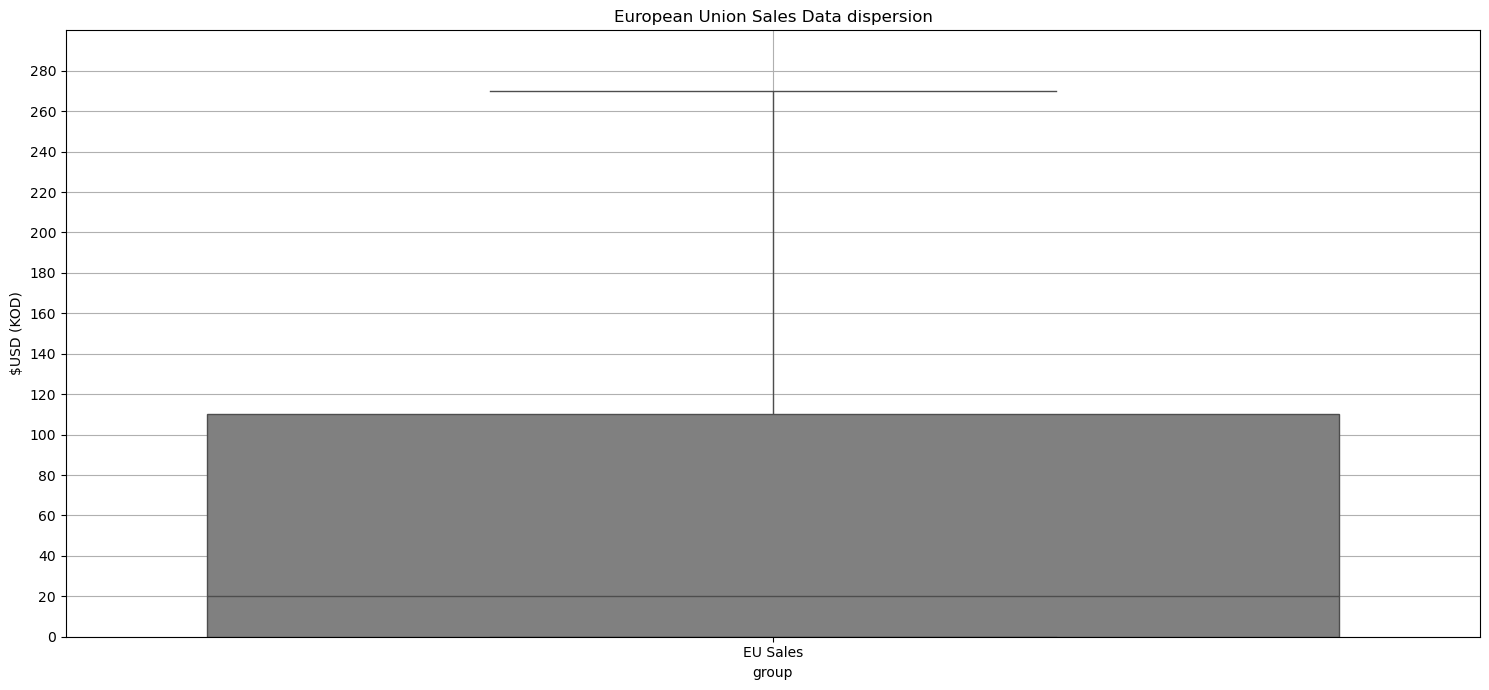

In [38]:
plot_boxplots(ds_list=[df_vg['eu_sales']], xlabels=['EU Sales'], ylabel='$USD (KOD)',
              title='European Union Sales Data dispersion', yticks_range=(0, 300, 20), rotation=0, color=['grey'], showfliers=False)

3.3.4 Data dispersion and outliers for 'jp_sales'

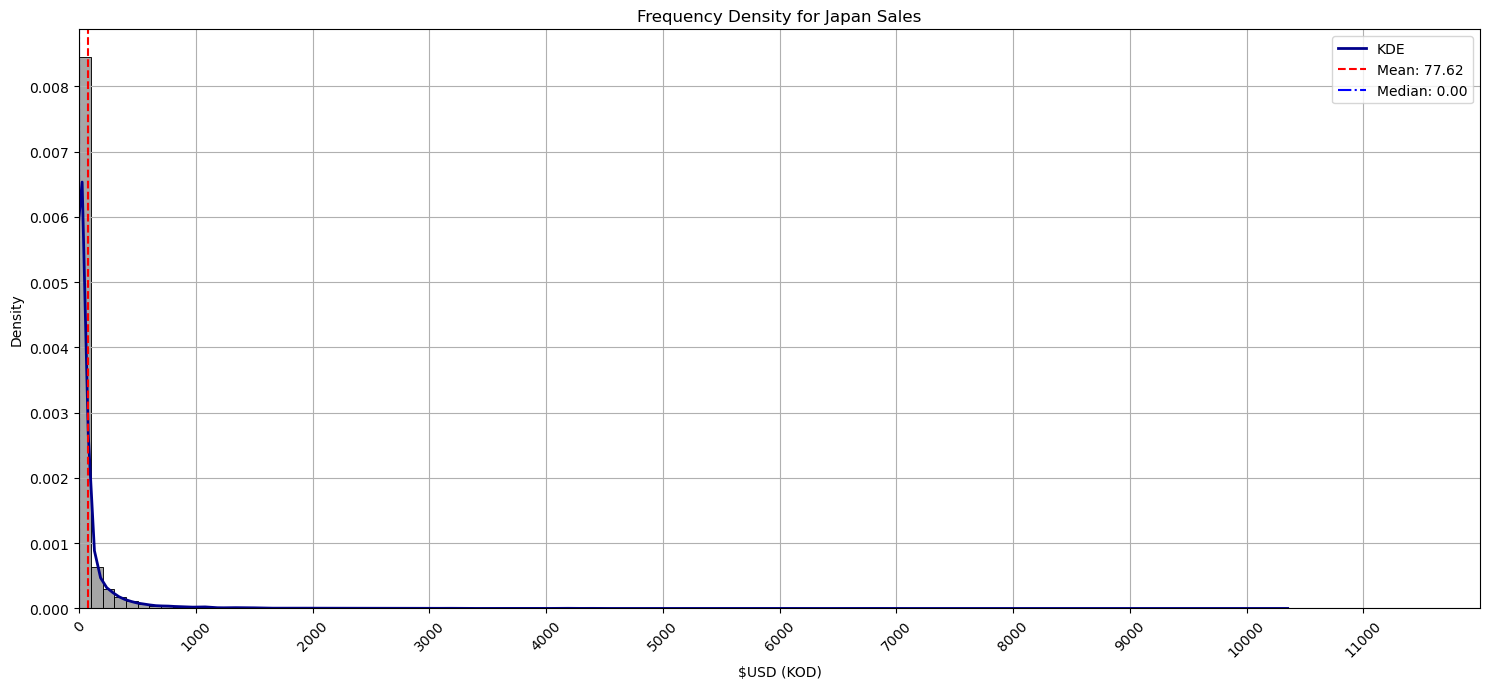

In [39]:
# JP Sales Distribution Frequency and Frequency density
plot_frequency_density(df_vg['jp_sales'], bins=range(0, 12000, 100), color='grey', title='Frequency Density for Japan Sales', 
                       xlabel='$USD (KOD)', xticks_range=(0, 12000, 1000), ylabel='Density', rotation=45, show_kde=True)

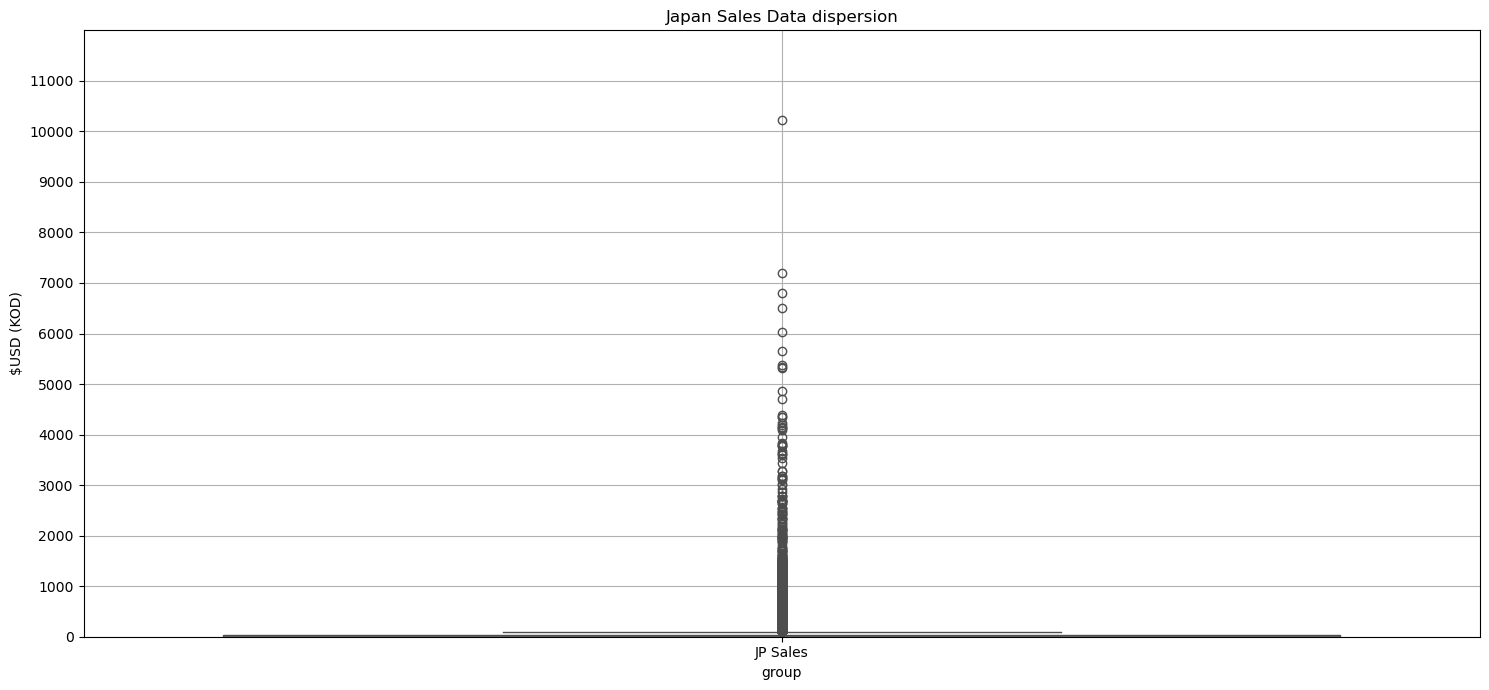

In [40]:
# JP Sales data dispersion
plot_boxplots(ds_list=[df_vg['jp_sales']], xlabels=['JP Sales'], ylabel='$USD (KOD)',
              title='Japan Sales Data dispersion', yticks_range=(0, 12000, 1000),  rotation=0, color=['grey'])

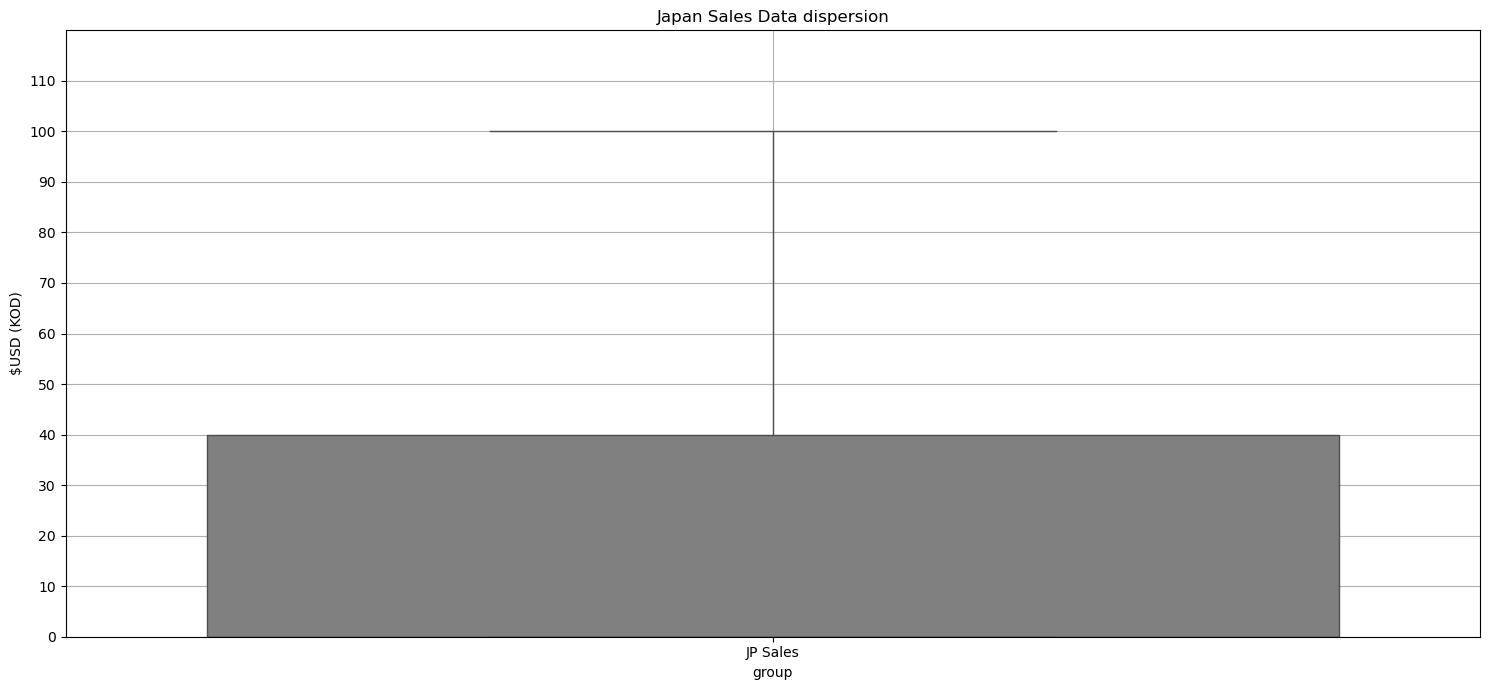

In [41]:
plot_boxplots(ds_list=[df_vg['jp_sales']], xlabels=['JP Sales'], ylabel='$USD (KOD)',
              title='Japan Sales Data dispersion', yticks_range=(0, 120, 10), rotation=0, color=['grey'], showfliers=False)

3.3.5 Data dispersion and outliers for 'other_sales'

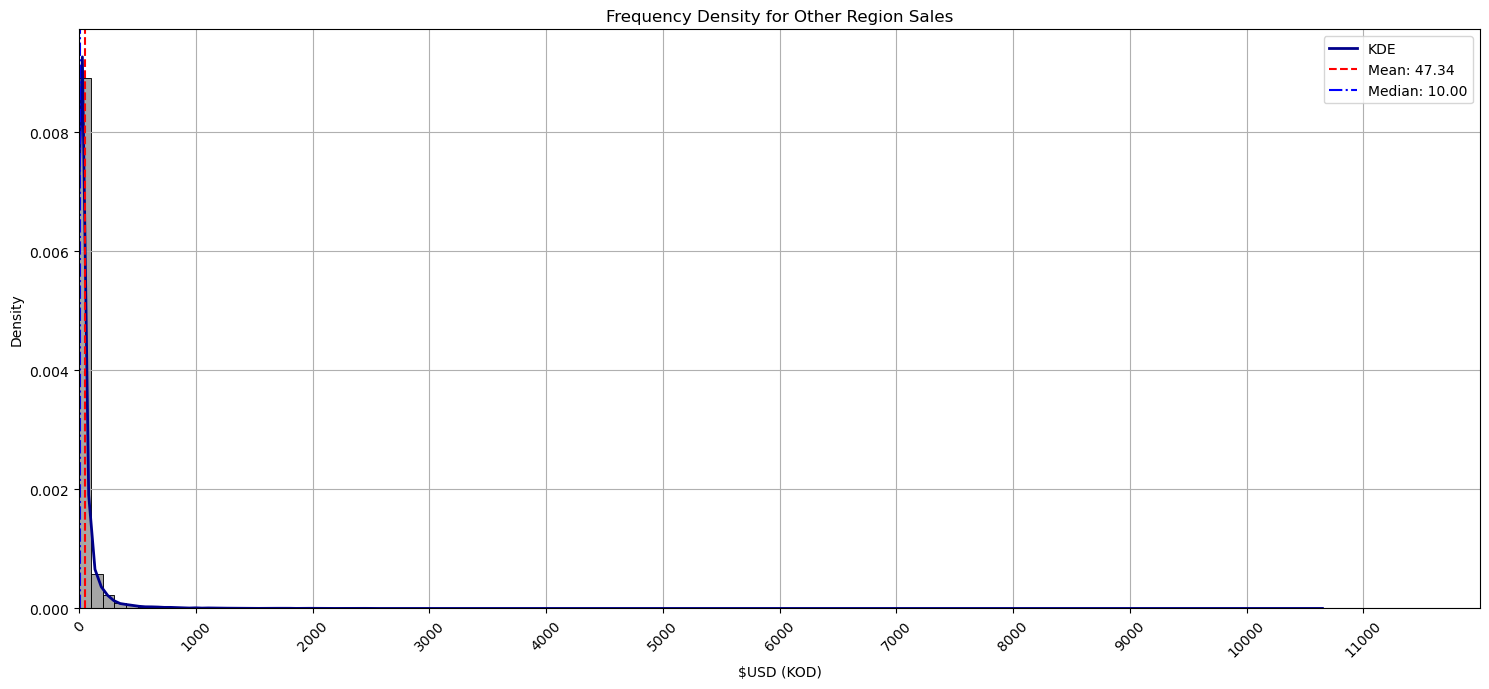

In [42]:
# Other Sales Distribution Frequency and Frequency density
plot_frequency_density(df_vg['other_sales'], bins=range(0, 12000, 100), color='grey', title='Frequency Density for Other Region Sales', 
                       xlabel='$USD (KOD)', xticks_range=(0, 12000, 1000), ylabel='Density', rotation=45, show_kde=True)

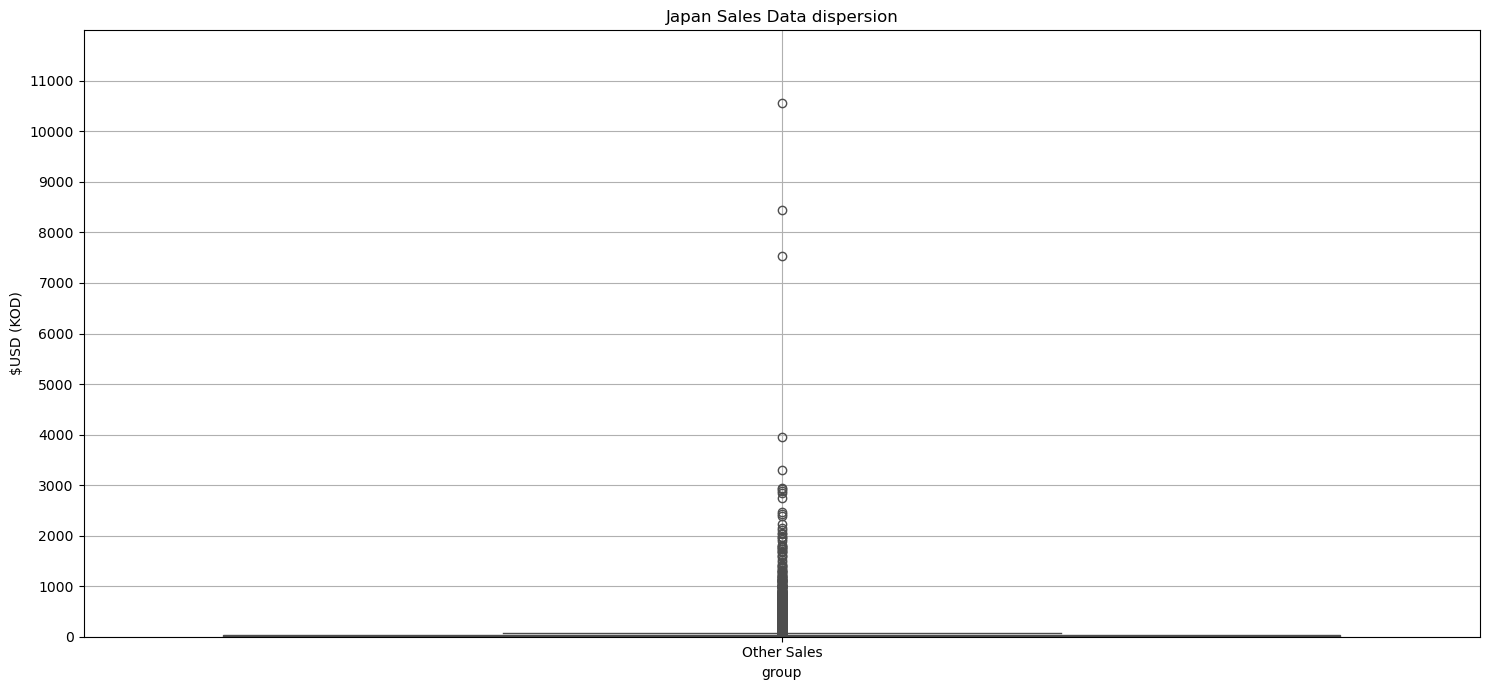

In [43]:
# Other Sales data dispersion
plot_boxplots(ds_list=[df_vg['other_sales']], xlabels=['Other Sales'], ylabel='$USD (KOD)',
              title='Japan Sales Data dispersion', yticks_range=(0, 12000, 1000),  rotation=0, color=['grey'])

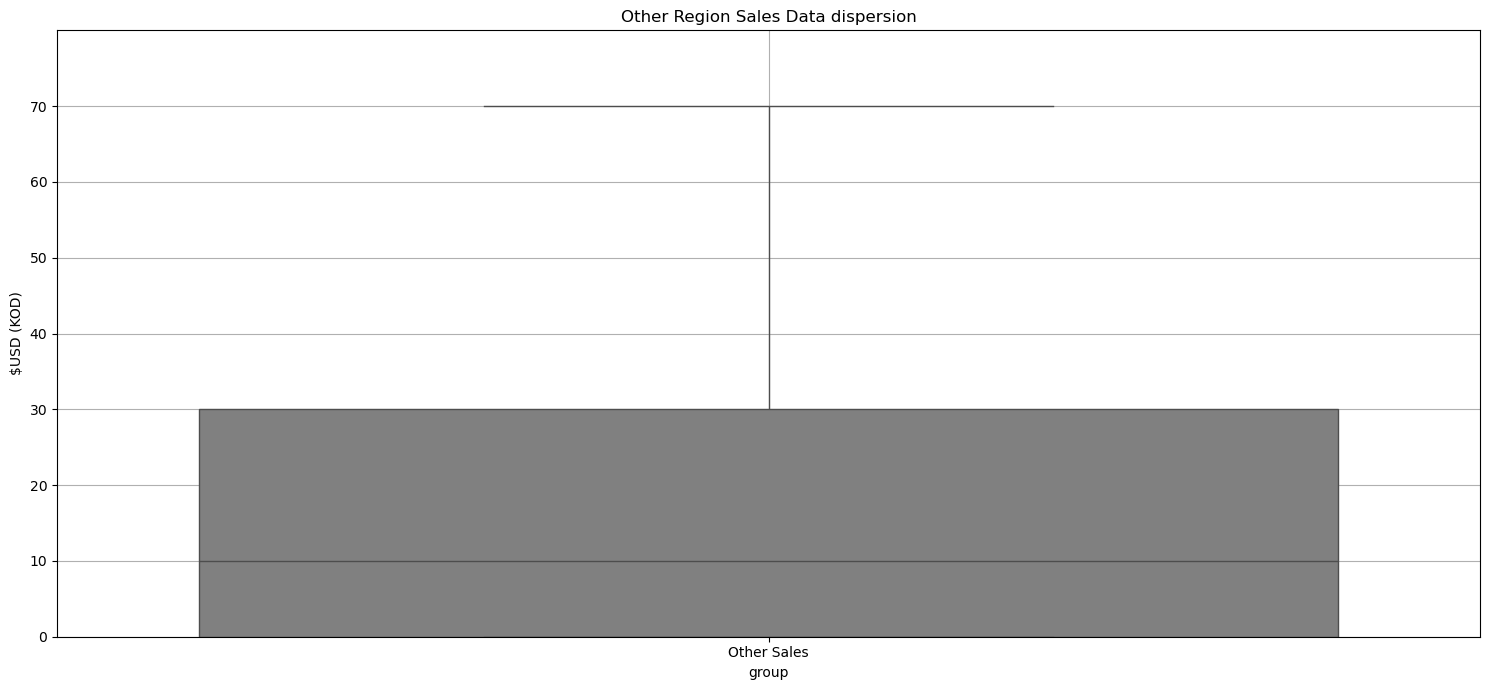

In [44]:
plot_boxplots(ds_list=[df_vg['other_sales']], xlabels=['Other Sales'], ylabel='$USD (KOD)',
              title='Other Region Sales Data dispersion', yticks_range=(0, 80, 10), rotation=0, color=['grey'], showfliers=False)

3.3.6 Data dispersion and outliers for 'critic_score'

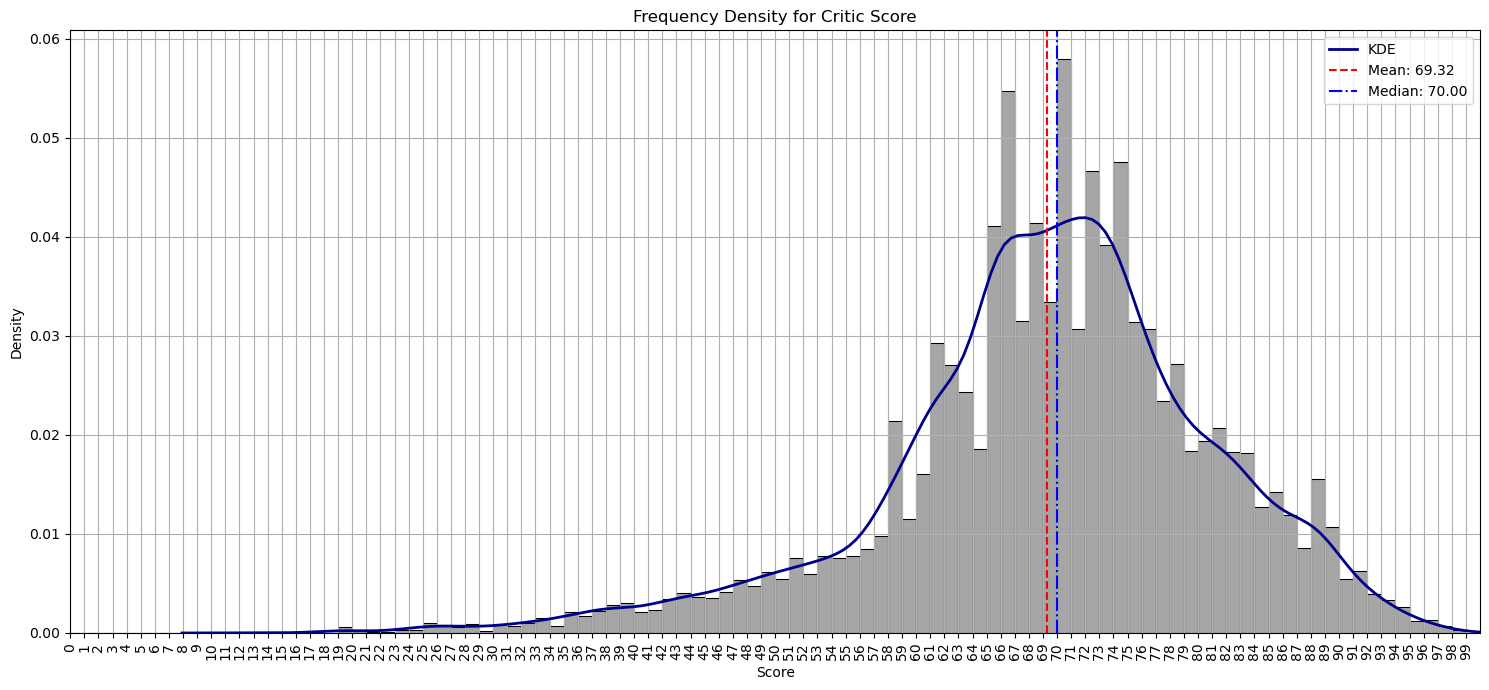

In [45]:
# Critic Score Distribution Frequency and Frequency density
plot_frequency_density(df_vg['critic_score'], bins=range(0, 100, 1), color='grey', title='Frequency Density for Critic Score', 
                       xlabel='Score', xticks_range=(0, 100, 1), ylabel='Density', rotation=90, show_kde=True)

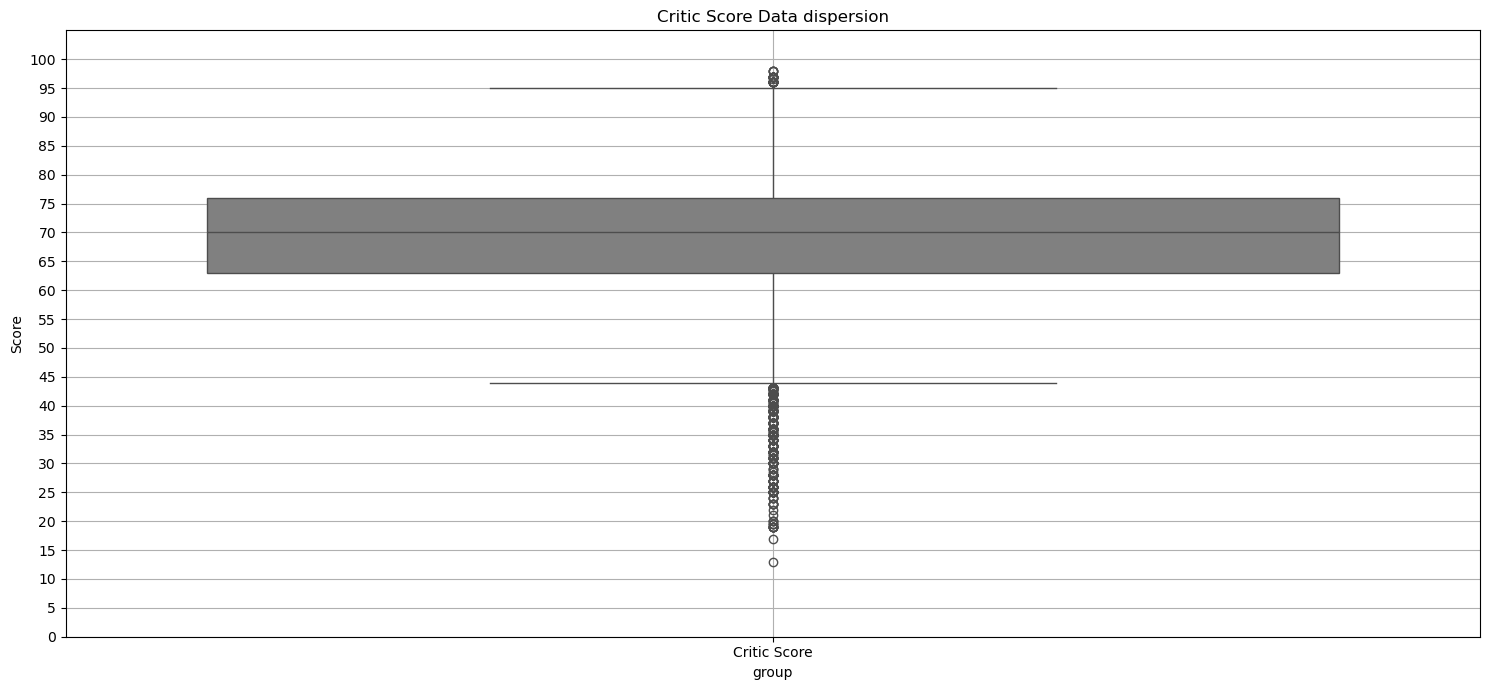

In [46]:
# Critic Score data dispersion
plot_boxplots(ds_list=[df_vg['critic_score']], xlabels=['Critic Score'], ylabel='Score',
              title='Critic Score Data dispersion', yticks_range=(0, 105, 5), rotation=0, color=['grey'])

3.3.7 Data dispersion and outliers for 'user_score'

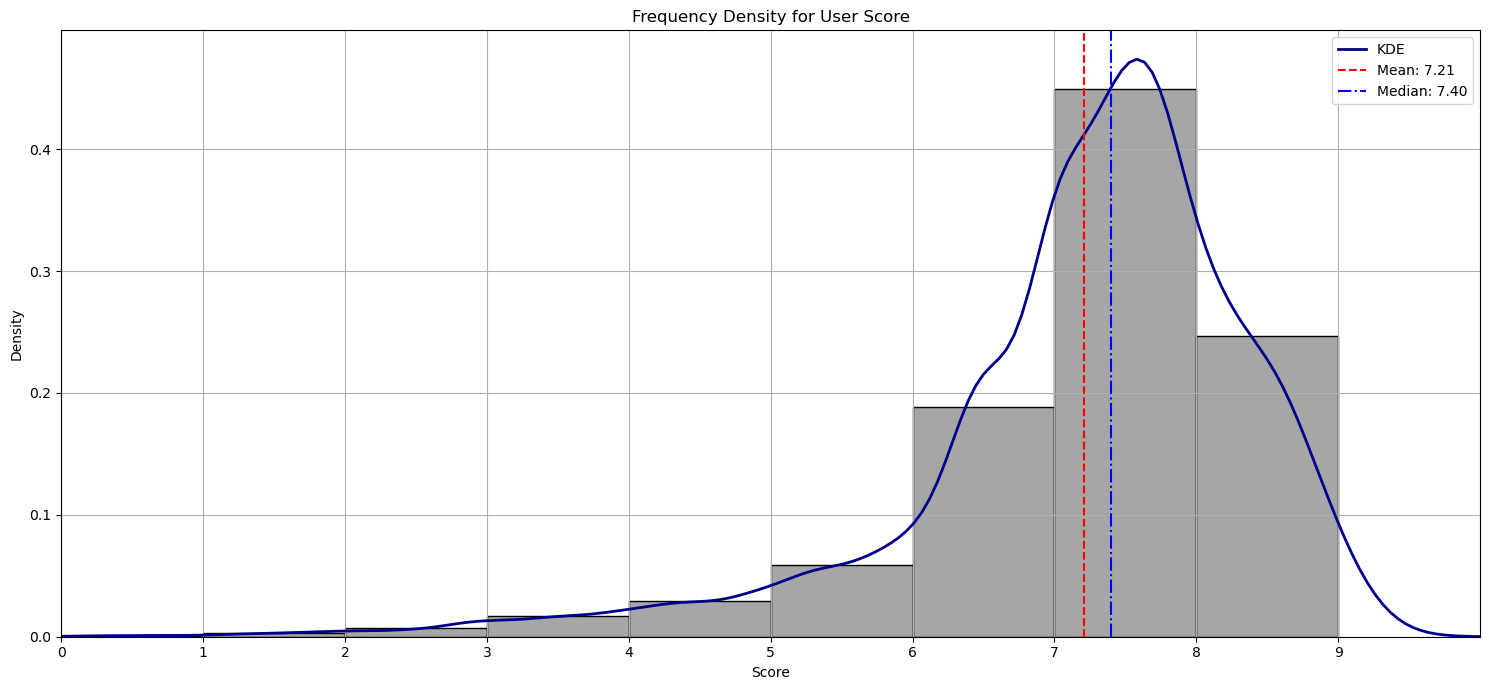

In [47]:
# User Score Distribution Frequency and Frequency density
plot_frequency_density(df_vg['user_score'], bins=range(0, 10, 1), color='grey', title='Frequency Density for User Score', 
                       xlabel='Score', xticks_range=(0, 10, 1), ylabel='Density', rotation=0, show_kde=True)

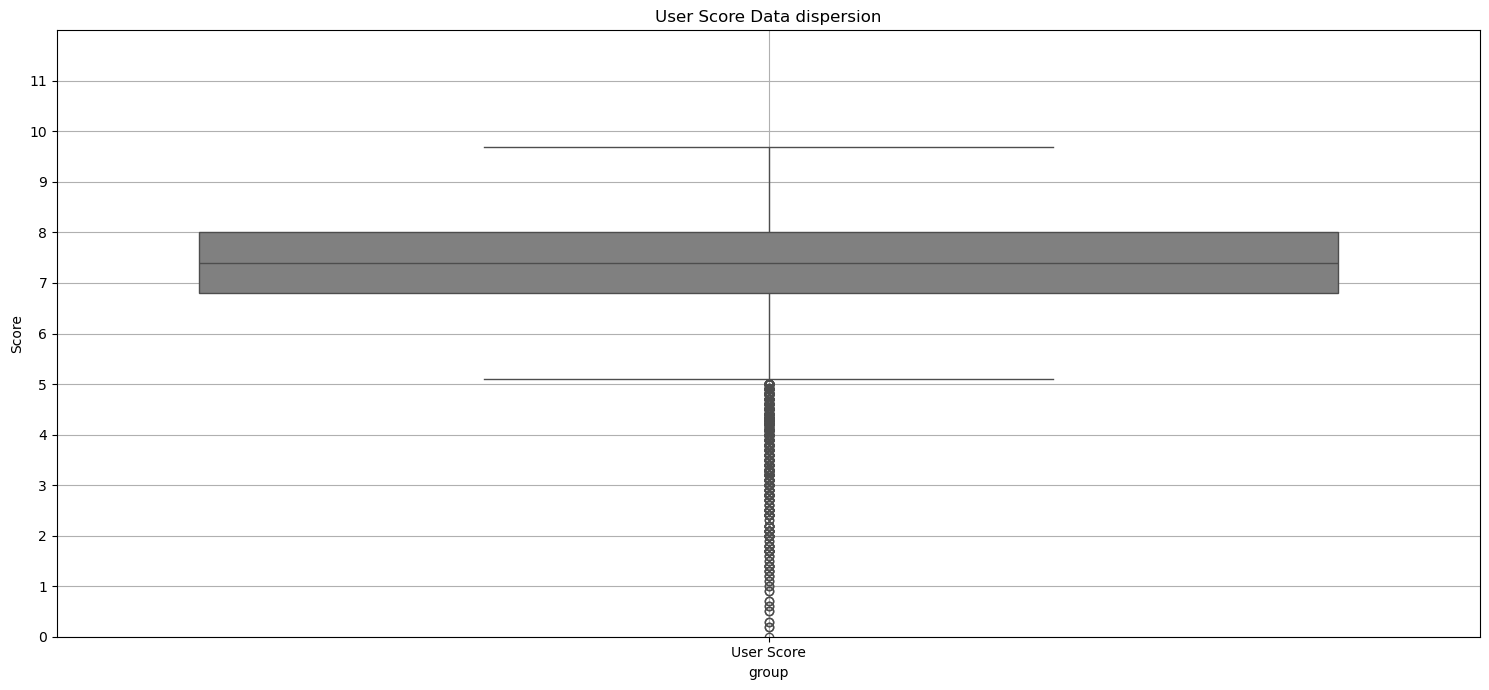

In [48]:
# User Score data dispersion
plot_boxplots(ds_list=[df_vg['user_score']], xlabels=['User Score'], ylabel='Score',
              title='User Score Data dispersion', yticks_range=(0, 12, 1), rotation=0, color=['grey'])

#### 3.4 Data visualization for video games

##### 3.4.1 Data visualization for Games amount released by years

In [49]:
# Plots for how many games were released in different years
ds_games_year = df_vg.groupby('year_of_release')['name'].count().reset_index()
ds_games_year.columns = ['year_of_release', 'games_released']
ds_games_year

year_of_release  games_released
0           1977.0                5
1           1978.0                2
2           1979.0                1
3           1980.0               14
4           1981.0               48
..             ...              ...
40          2017.0                2
41          2019.0                1
42          2021.0                3
43          2022.0                3
44          2023.0                1

[45 rows x 2 columns]

c:\Users\luisp\OneDrive\Documentos\GitHub\P_20250529_Videogames_analysis\src\eda.py:496: UserWarning: 
The palette list has fewer values (2) than needed (37) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=ds, x=x_col, y=y_col, hue=hue_col, palette=strong_palette, alpha=alpha, ax=ax)


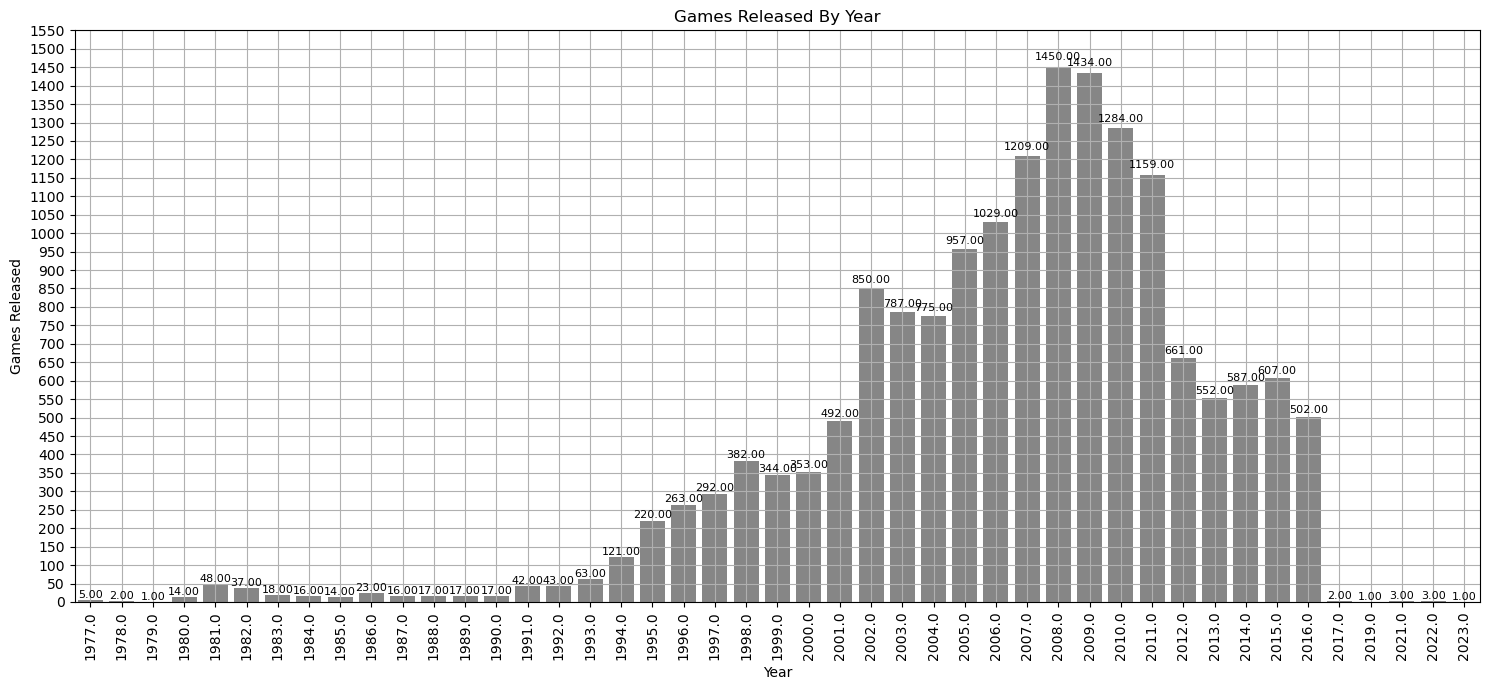

In [50]:
plot_grouped_barplot(ds_games_year, x_col='year_of_release', y_col='games_released', hue_col='games_released', palette=['grey'],
                     title='Games Released By Year', xlabel='Year', ylabel='Games Released',
                     yticks_range=range(0, 1600, 50), x_rotation=90, show_legend=False)

##### 3.4.2 Data visualization for Sales variation by platform

3.4.2.1 Data visualization for Platform Sales in North America

c:\Users\luisp\OneDrive\Documentos\GitHub\P_20250529_Videogames_analysis\src\eda.py:496: UserWarning: 
The palette list has fewer values (2) than needed (31) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=ds, x=x_col, y=y_col, hue=hue_col, palette=strong_palette, alpha=alpha, ax=ax)


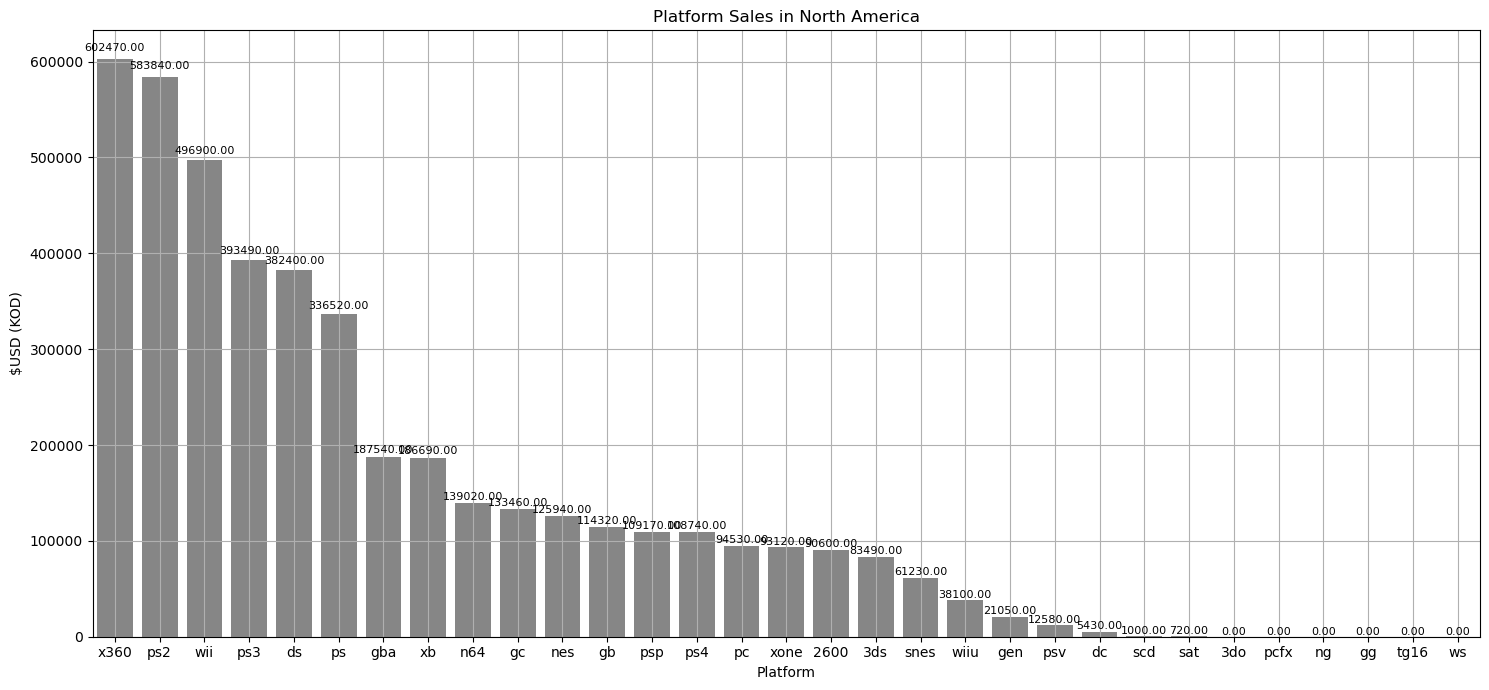

In [51]:
# Platform Sales in North America
df_vg_platform_na = df_vg_platform_sales.loc[:, ['platform', 'na_sales']].sort_values(by='na_sales', ascending=False)
plot_grouped_barplot(df_vg_platform_na, x_col='platform', y_col='na_sales', hue_col='platform', palette=['grey'],
                     title='Platform Sales in North America', xlabel='Platform', ylabel='$USD (KOD)',
                      x_rotation=0)

3.4.2.2 Data visualization for Platform Sales in European Union

c:\Users\luisp\OneDrive\Documentos\GitHub\P_20250529_Videogames_analysis\src\eda.py:496: UserWarning: 
The palette list has fewer values (2) than needed (31) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=ds, x=x_col, y=y_col, hue=hue_col, palette=strong_palette, alpha=alpha, ax=ax)


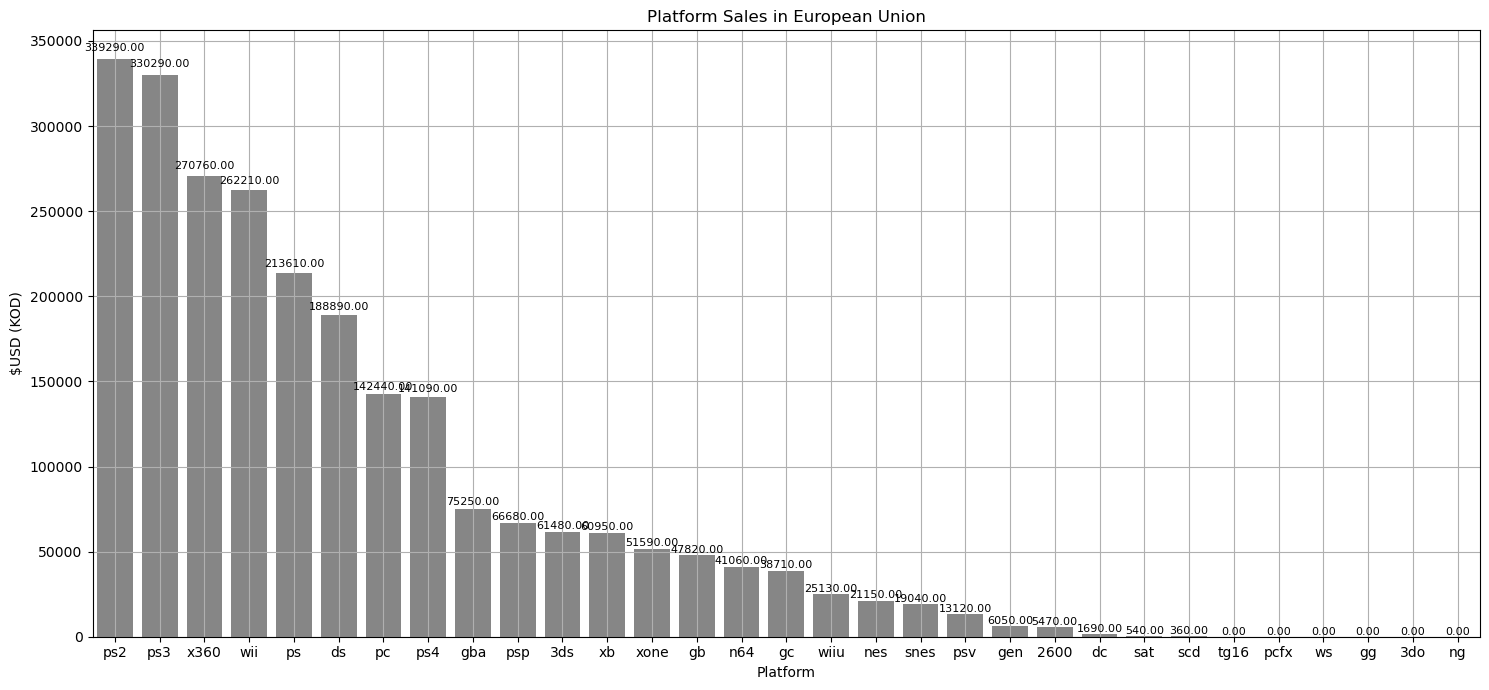

In [52]:
# Platform Sales in European Union
df_vg_platform_eu = df_vg_platform_sales.loc[:, ['platform', 'eu_sales']].sort_values(by='eu_sales', ascending=False)
plot_grouped_barplot(df_vg_platform_eu, x_col='platform', y_col='eu_sales', hue_col='platform', palette=['grey'],
                     title='Platform Sales in European Union', xlabel='Platform', ylabel='$USD (KOD)',
                      x_rotation=0)

3.4.2.3 Data visualization for Platform Sales in Japan

c:\Users\luisp\OneDrive\Documentos\GitHub\P_20250529_Videogames_analysis\src\eda.py:496: UserWarning: 
The palette list has fewer values (2) than needed (31) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=ds, x=x_col, y=y_col, hue=hue_col, palette=strong_palette, alpha=alpha, ax=ax)


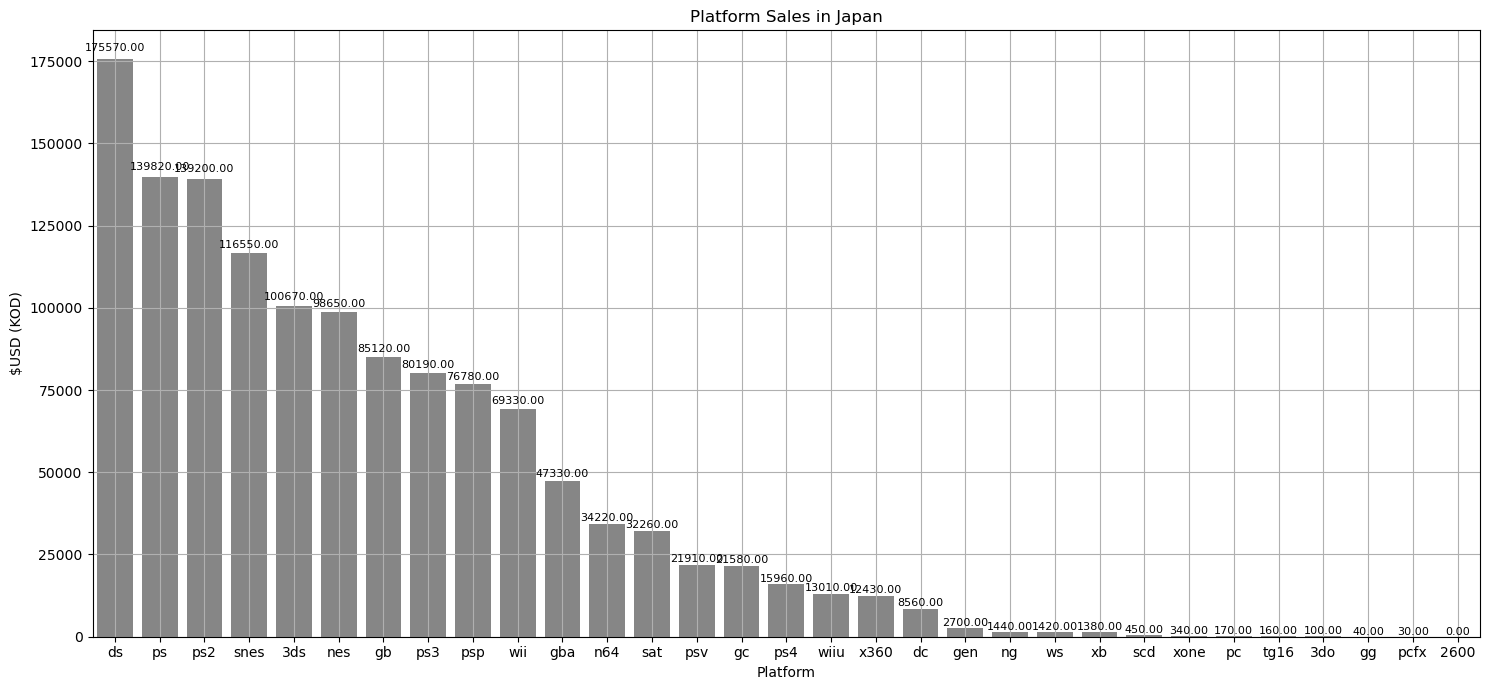

In [53]:
# Platform Sales in Japan
df_vg_platform_jp = df_vg_platform_sales.loc[:, ['platform', 'jp_sales']].sort_values(by='jp_sales', ascending=False)
plot_grouped_barplot(df_vg_platform_jp, x_col='platform', y_col='jp_sales', hue_col='platform', palette=['grey'],
                     title='Platform Sales in Japan', xlabel='Platform', ylabel='$USD (KOD)',
                      x_rotation=0)

3.4.2.4 Data visualization for Platform Sales in Other Region

c:\Users\luisp\OneDrive\Documentos\GitHub\P_20250529_Videogames_analysis\src\eda.py:496: UserWarning: 
The palette list has fewer values (2) than needed (31) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=ds, x=x_col, y=y_col, hue=hue_col, palette=strong_palette, alpha=alpha, ax=ax)


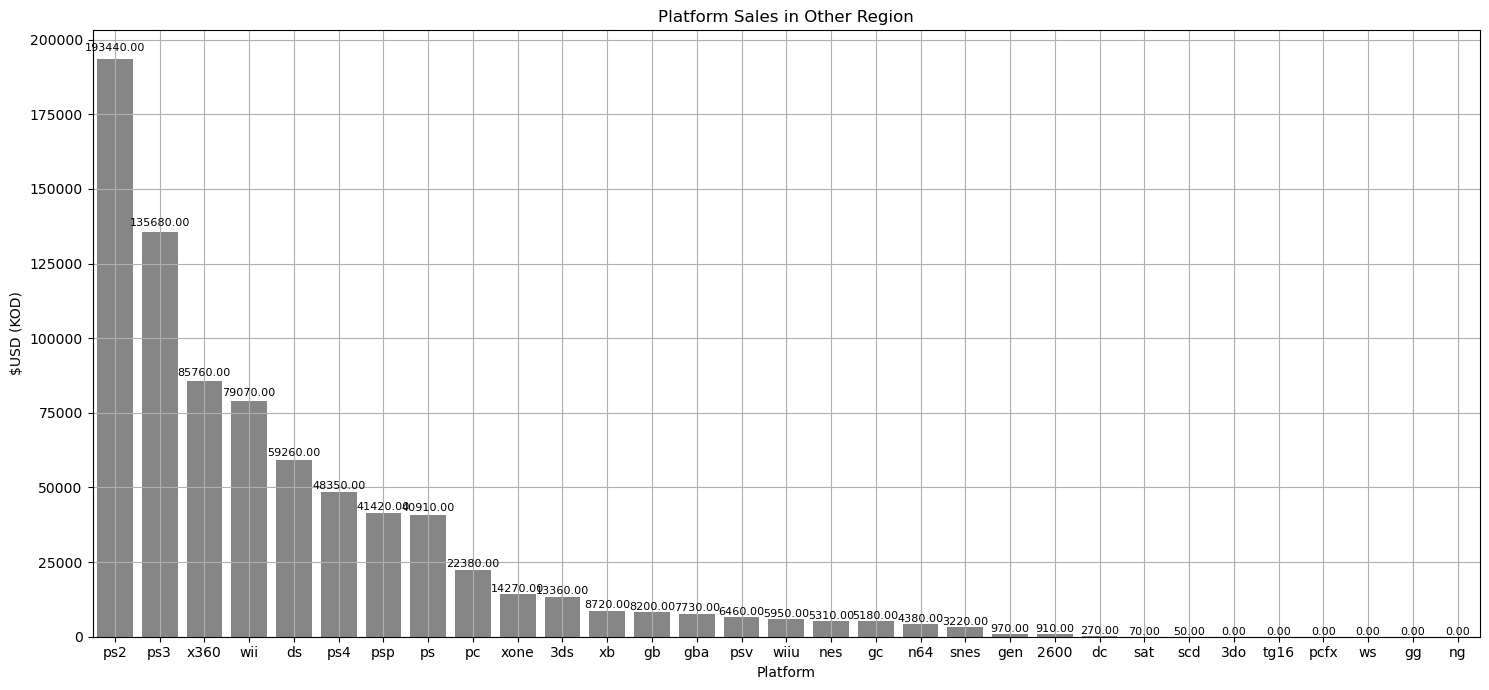

In [54]:
# Platform Sales in Other Region
df_vg_platform_other = df_vg_platform_sales.loc[:, ['platform', 'other_sales']].sort_values(by='other_sales', ascending=False)
plot_grouped_barplot(df_vg_platform_other, x_col='platform', y_col='other_sales', hue_col='platform', palette=['grey'],
                     title='Platform Sales in Other Region', xlabel='Platform', ylabel='$USD (KOD)',
                      x_rotation=0)

3.4.2.5 Data visualization for Platform Total Sales

c:\Users\luisp\OneDrive\Documentos\GitHub\P_20250529_Videogames_analysis\src\eda.py:496: UserWarning: 
The palette list has fewer values (2) than needed (31) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(data=ds, x=x_col, y=y_col, hue=hue_col, palette=strong_palette, alpha=alpha, ax=ax)


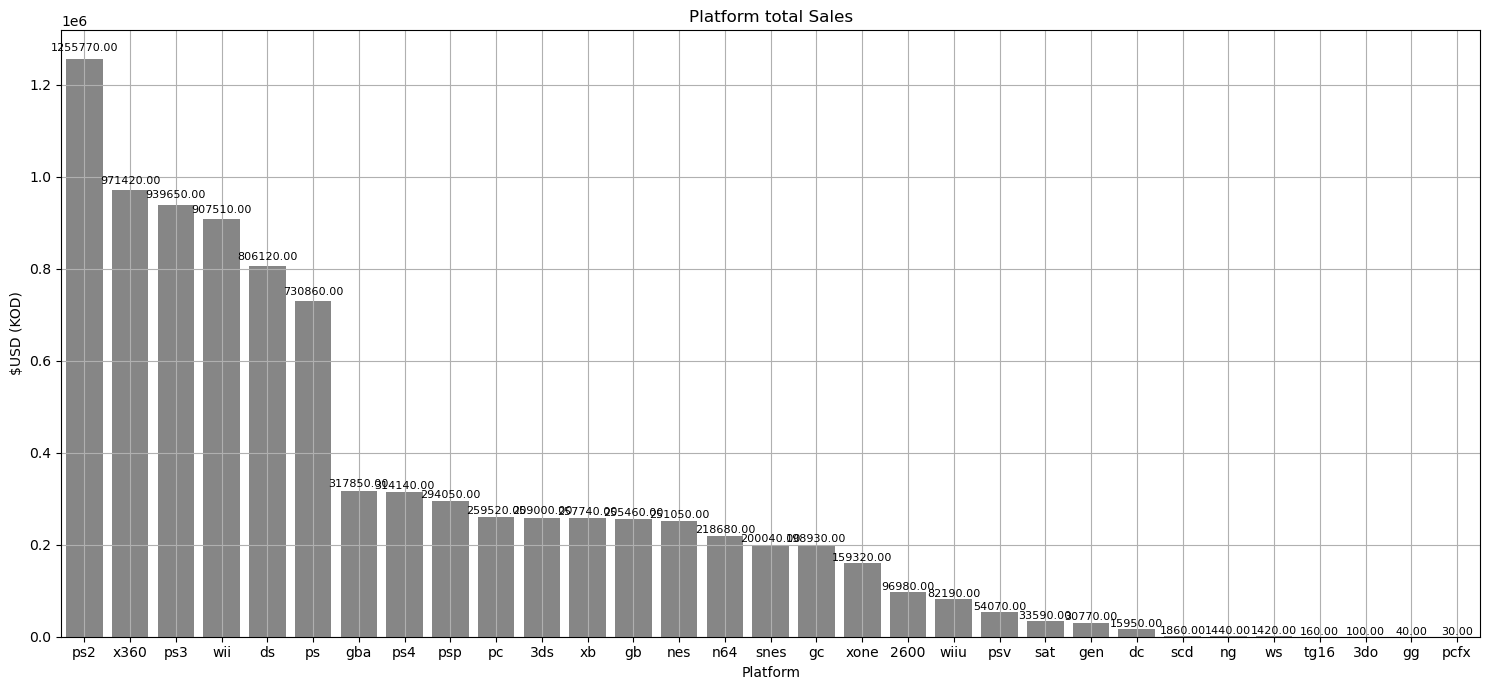

In [55]:
# Platform Total Sales
df_vg_platform_total = df_vg_platform_sales.loc[:, ['platform', 'total_sales']].sort_values(by='total_sales', ascending=False)
plot_grouped_barplot(df_vg_platform_total, x_col='platform', y_col='total_sales', hue_col='platform', palette=['grey'],
                     title='Platform total Sales', xlabel='Platform', ylabel='$USD (KOD)',
                      x_rotation=0)

##### 3.4.3 Data visualization for Platforms highest total sales per year.

In [56]:
# Platform highest total sales per year
# Step 1: Group by platform and year to get total sales
df_vg_platform_year_sales = df_vg_platform_top_sales_year.groupby(['year_of_release', 'platform'], as_index=False)['total_sales'].sum()
df_vg_platform_year_sales

year_of_release platform  total_sales
0            1983.0       nes      10960.0
1            1984.0       nes      50080.0
2            1985.0       nes      53440.0
3            1986.0       nes      36410.0
4            1987.0       nes      19760.0
..              ...       ...          ...
158          2016.0       ps3       3600.0
159          2016.0       ps4      69250.0
160          2016.0       psv       4250.0
161          2016.0      wiiu       4600.0
162          2016.0      xone      26150.0

[163 rows x 3 columns]

In [57]:
# Step 2: For each year, find the platform with the max total_sales
idx = df_vg_platform_year_sales.groupby('year_of_release')['total_sales'].idxmax() # grabs the index of the row with the maximum value.
idx.name = 'index'
idx

year_of_release
1983.0      0
1984.0      1
1985.0      2
1986.0      3
1987.0      4
         ... 
2012.0    129
2013.0    136
2014.0    146
2015.0    153
2016.0    159
Name: index, Length: 34, dtype: int64

In [58]:
df_vg_platform_year_top_sales = df_vg_platform_year_sales.loc[idx].sort_values('year_of_release')
df_vg_platform_year_top_sales

year_of_release platform  total_sales
0            1983.0       nes      10960.0
1            1984.0       nes      50080.0
2            1985.0       nes      53440.0
3            1986.0       nes      36410.0
4            1987.0       nes      19760.0
..              ...       ...          ...
129          2012.0       ps3     107430.0
136          2013.0       ps3     113300.0
146          2014.0       ps4     100000.0
153          2015.0       ps4     118900.0
159          2016.0       ps4      69250.0

[34 rows x 3 columns]

In [59]:
ds_vg_platform_year_top_sales = df_vg_platform_year_top_sales.set_index(['year_of_release', 'platform'])['total_sales']
ds_vg_platform_year_top_sales

year_of_release  platform
1983.0           nes          10960.0
1984.0           nes          50080.0
1985.0           nes          53440.0
1986.0           nes          36410.0
1987.0           nes          19760.0
                               ...   
2012.0           ps3         107430.0
2013.0           ps3         113300.0
2014.0           ps4         100000.0
2015.0           ps4         118900.0
2016.0           ps4          69250.0
Name: total_sales, Length: 34, dtype: float64

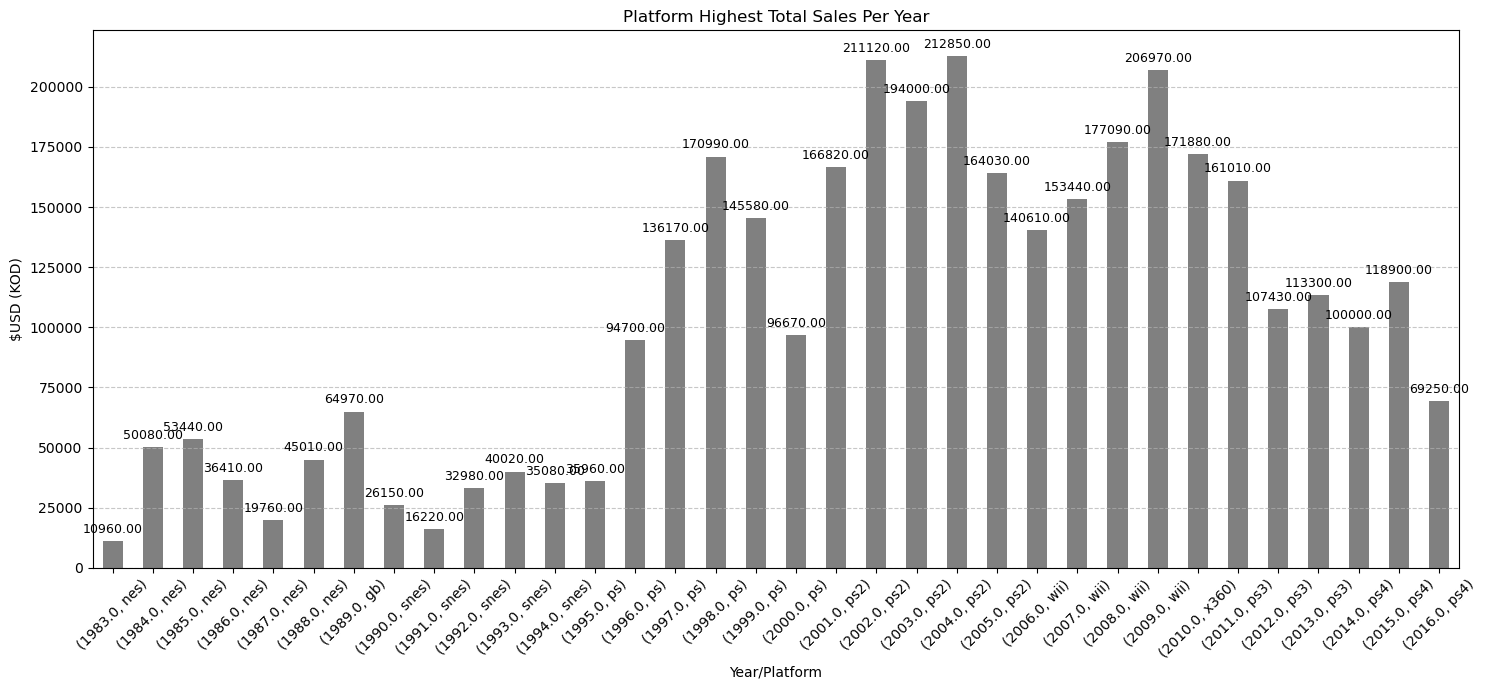

In [60]:
plot_bar_series(ds_vg_platform_year_top_sales, title='Platform Highest Total Sales Per Year', xlabel='Year/Platform', 
                ylabel='$USD (KOD)', figsize=(15, 7), color='grey', rotation=45, show_values=True, xticks=None, 
                yticks=None)

##### 3.4.4 Data visualization for Platforms that used to be popular but are now losing sales.

In [61]:
mask = (df_vg_platform_popular_loss['year_of_release'] > 1993) & (df_vg_platform_popular_loss['year_of_release'] < 2018)
df_vg_platform_popular_loss = df_vg_platform_popular_loss.loc[mask, :]
df_vg_platform_popular_loss

platform  year_of_release  games  total_sales
14       3do          1994.0       1         20.0
15       3do          1995.0       2         80.0
16       3ds          2010.0       3        580.0
17       3ds          2011.0     119      63760.0
18       3ds          2012.0      95      51410.0
..       ...             ...     ...          ...
269       xb          2008.0       1        180.0
271     xone          2013.0      19      18960.0
272     xone          2014.0      61      54070.0
273     xone          2015.0      80      60140.0
274     xone          2016.0      87      26150.0

[215 rows x 4 columns]

In [62]:
df_popular_platform_sales = df_vg_platform_popular_loss.loc[:, ['platform', 'year_of_release', 'total_sales']]
df_popular_platform_sales

platform  year_of_release  total_sales
14       3do          1994.0          20.0
15       3do          1995.0          80.0
16       3ds          2010.0         580.0
17       3ds          2011.0       63760.0
18       3ds          2012.0       51410.0
..       ...             ...           ...
269       xb          2008.0         180.0
271     xone          2013.0       18960.0
272     xone          2014.0       54070.0
273     xone          2015.0       60140.0
274     xone          2016.0       26150.0

[215 rows x 3 columns]

In [63]:
df_popular_platform_sales_peak = df_popular_platform_sales.groupby('platform')['total_sales'].max().reset_index()
df_popular_platform_sales_peak

platform  total_sales
0       3do         80.0
1       3ds      63760.0
2        dc       5990.0
3        ds     147350.0
4        gb      38000.0
..      ...          ...
24     wiiu      22030.0
25       ws        680.0
26     x360     171880.0
27       xb      67760.0
28     xone      60140.0

[29 rows x 2 columns]

In [64]:
df_popular_platform_sales_peak = df_popular_platform_sales.merge(df_popular_platform_sales_peak, on=['platform', 'total_sales'])
df_popular_platform_sales_peak.columns = ['platform', 'year_of_release', 'max_sales']
df_popular_platform_sales_peak

platform  year_of_release  max_sales
0       3do          1995.0        80.0
1       3ds          2011.0     63760.0
2        dc          2000.0      5990.0
3        ds          2007.0    147350.0
4        gb          1999.0     38000.0
..      ...             ...         ...
24     wiiu          2014.0     22030.0
25       ws          2000.0       680.0
26     x360          2010.0    171880.0
27       xb          2004.0     67760.0
28     xone          2015.0     60140.0

[29 rows x 3 columns]

In [65]:
df_popular_platform_sale_recent_years = df_vg_platform_popular_loss.loc[(df_vg_platform_popular_loss['year_of_release'] >= 
                                                                        (df_vg_platform_popular_loss['year_of_release'].max() - 5))]
df_popular_platform_sale_recent_years

platform  year_of_release  games  total_sales
18       3ds          2012.0      95      51410.0
19       3ds          2013.0      91      56570.0
20       3ds          2014.0      80      43760.0
21       3ds          2015.0      86      27780.0
22       3ds          2016.0      46      15140.0
..       ...             ...     ...          ...
258     x360          2016.0      13       1520.0
271     xone          2013.0      19      18960.0
272     xone          2014.0      61      54070.0
273     xone          2015.0      80      60140.0
274     xone          2016.0      87      26150.0

[54 rows x 4 columns]

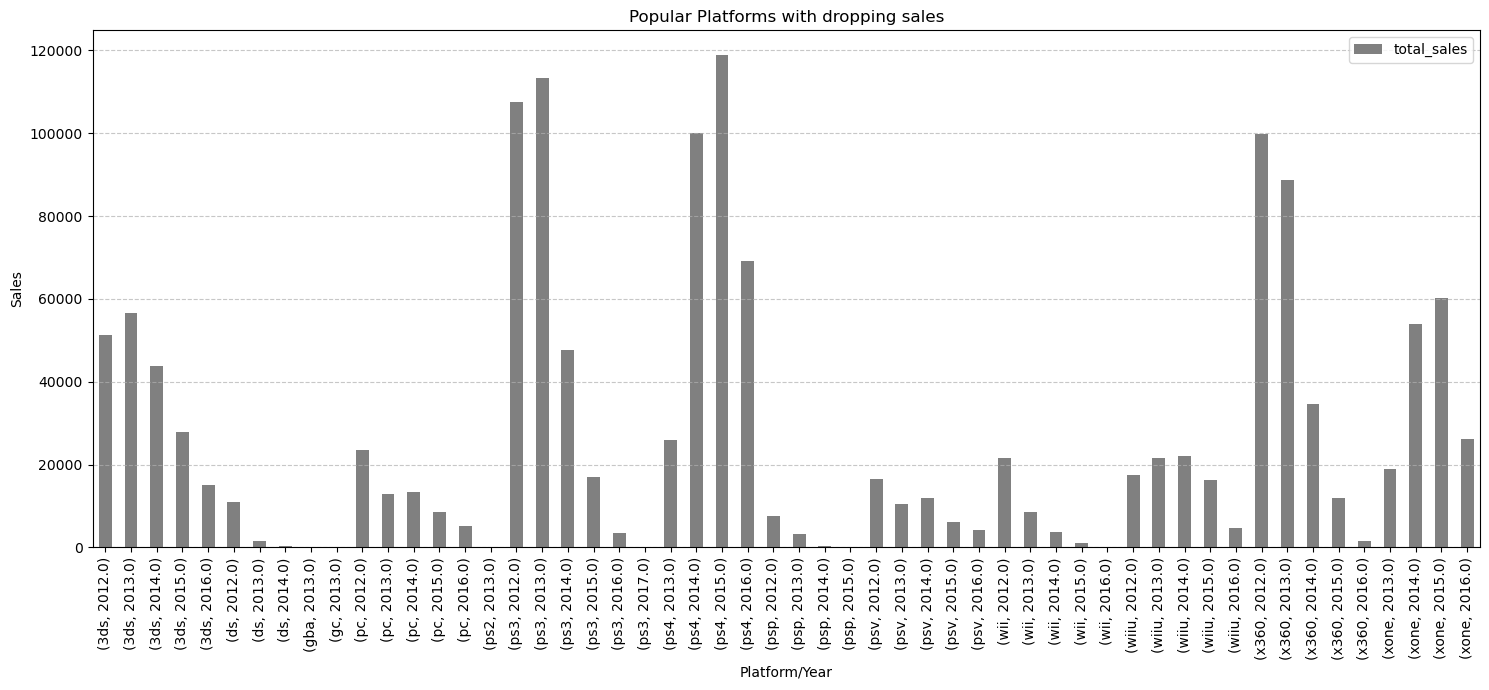

In [66]:
df_popular_platform_recent_years_sales = df_popular_platform_sale_recent_years.loc[:, ['platform', 'year_of_release', 'total_sales']]
df_popular_platform_recent_years_sales = df_popular_platform_recent_years_sales.set_index(['platform', 'year_of_release'])
plot_bar_series(df_popular_platform_recent_years_sales, title='Popular Platforms with dropping sales', xlabel='Platform/Year', ylabel='Sales',
                color='grey', rotation=90, show_values=False, xticks=None, yticks=None)

##### 3.4.5 Data visualization for Platforms Lifetime.

In [67]:
mask = (df_vg['year_of_release'] > 1993) & (df_vg['year_of_release'] < 2018)
df_vg_platform_lifetime = df_vg.loc[mask, ['platform', 'year_of_release']].sort_values(by=['platform', 'year_of_release'])
df_vg_platform_lifetime

platform  year_of_release
15076      3do          1994.0 
12663      3do          1995.0 
15560      3do          1995.0 
5874       3ds          2010.0 
7848       3ds          2010.0 
...        ...             ... 
16630     xone          2016.0 
16643     xone          2016.0 
16645     xone          2016.0 
16660     xone          2016.0 
16672     xone          2016.0 

[16312 rows x 2 columns]

In [68]:
df_vg_platform_lifetime = df_vg_platform_lifetime.groupby('platform', observed=False)['year_of_release'].agg(['min', 'max']).reset_index()
df_vg_platform_lifetime.columns = ['platform', 'first_year', 'last_year']
df_vg_platform_lifetime['life_span'] = df_vg_platform_lifetime['last_year'] - df_vg_platform_lifetime['first_year']
df_vg_platform_lifetime = df_vg_platform_lifetime.dropna()
df_vg_platform_lifetime

platform  first_year  last_year  life_span
1       3do      1994.0     1995.0        1.0
2       3ds      2010.0     2016.0        6.0
3        dc      1998.0     2008.0       10.0
4        ds      2001.0     2014.0       13.0
5        gb      1994.0     2001.0        7.0
..      ...         ...        ...        ...
26     wiiu      2012.0     2016.0        4.0
27       ws      1999.0     2001.0        2.0
28     x360      2001.0     2016.0       15.0
29       xb      2000.0     2008.0        8.0
30     xone      2013.0     2016.0        3.0

[29 rows x 4 columns]

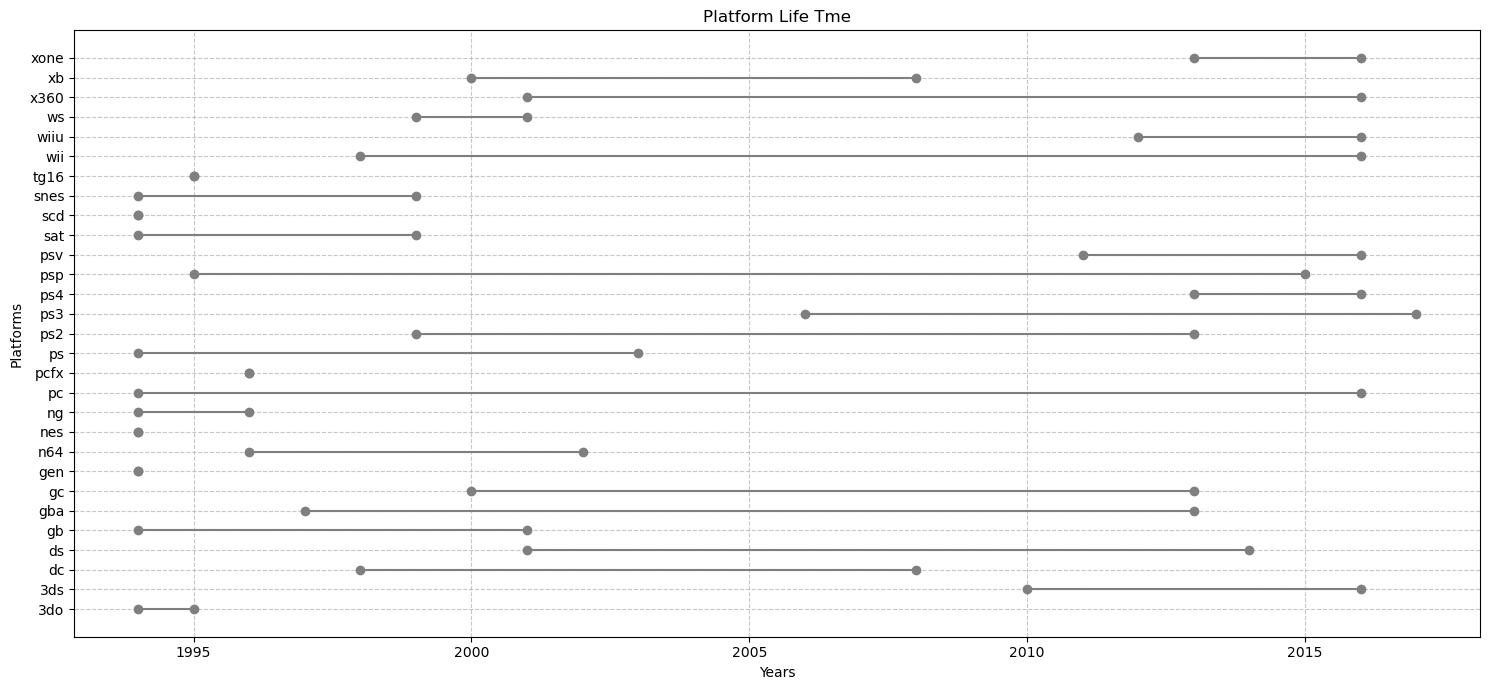

In [69]:
plot_horizontal_lines(df_vg_platform_lifetime, start_col='first_year', end_col='last_year', y_col='platform', title='Platform Life Tme', 
                      xlabel='Years', ylabel='Platforms', figsize=(15, 7), marker='o', grid=True, color='tab:grey')

##### 3.4.6 Data visualization for Profitable Platforms.

In [70]:
# Relative Profitability
df_vg_platform_profit = df_vg_platform_profit.set_index('platform')
df_vg_platform_profit

total_sales  games_sold  lifespan  profit
platform                                           
3do             100.0           3       2.0   16.67
3ds          259000.0         520       7.0   71.15
dc            15950.0          52      11.0   27.88
ds           805880.0        2147      14.0   26.81
gb           153110.0          68       8.0  281.45
...               ...         ...       ...     ...
wiiu          82190.0         147       5.0  111.82
ws             1420.0           6       3.0   78.89
x360         970970.0        1259      16.0   48.20
xb           257370.0         822       9.0   34.79
xone         159320.0         247       4.0  161.26

[29 rows x 4 columns]

In [71]:
df_vg_platform_profit = df_vg_platform_profit.sort_values(by='profit')
df_vg_platform_profit


total_sales  games_sold  lifespan  profit
platform                                           
pc           256250.0         964      23.0   11.56
psp          293630.0        1206      21.0   11.59
3do             100.0           3       2.0   16.67
psv           54070.0         430       6.0   20.96
gba          317850.0         822      17.0   22.75
...               ...         ...       ...     ...
wiiu          82190.0         147       5.0  111.82
xone         159320.0         247       4.0  161.26
ps4          314140.0         392       4.0  200.34
gb           153110.0          68       8.0  281.45
gen            8130.0          12       1.0  677.50

[29 rows x 4 columns]

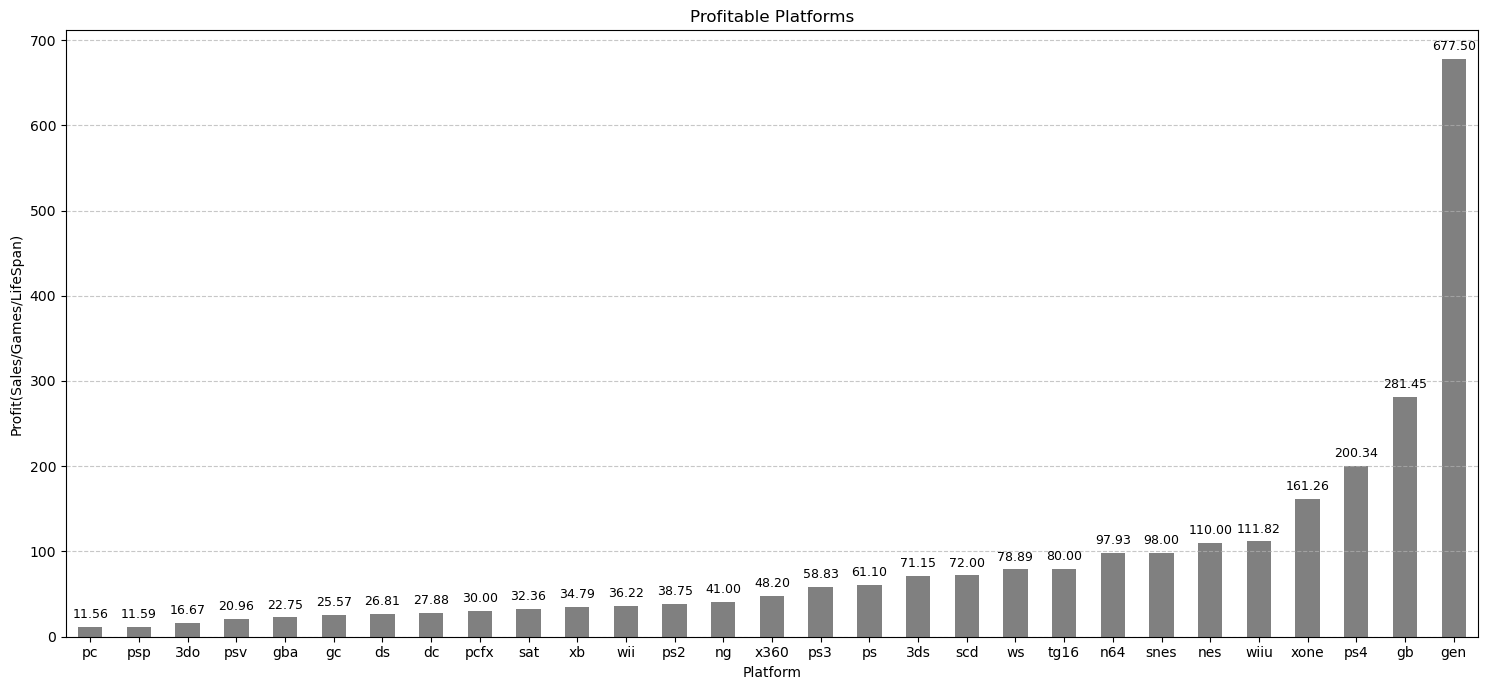

In [72]:
plot_bar_series(df_vg_platform_profit['profit'], title='Profitable Platforms', xlabel='Platform', ylabel='Profit(Sales/Games/LifeSpan)',
                color='grey', rotation=0, show_values=True, xticks=None, yticks=None)

##### 3.4.7 Data visualization for Average sales across various platforms.

In [73]:
df_vg_platform_avg_sales = df_vg_platform_avg_sales.set_index('platform')
df_vg_platform_avg_sales

na_sales  eu_sales  jp_sales  other_sales  total_sales
platform                                                        
3do            0.0       0.0      20.0          0.0         20.0
3ds           10.0       0.0      50.0          0.0        120.0
dc             0.0       0.0     120.0          0.0        135.0
ds            60.0       0.0       0.0         10.0        110.0
gb             0.0       0.0     375.0          0.0        945.0
...            ...       ...       ...          ...          ...
wiiu         110.0      70.0       0.0         20.0        220.0
ws             0.0       0.0     215.0          0.0        215.0
x360         170.0      50.0       0.0         20.0        280.0
xb           110.0      30.0       0.0         10.0        150.0
xone         120.0      70.0       0.0         20.0        220.0

[29 rows x 5 columns]

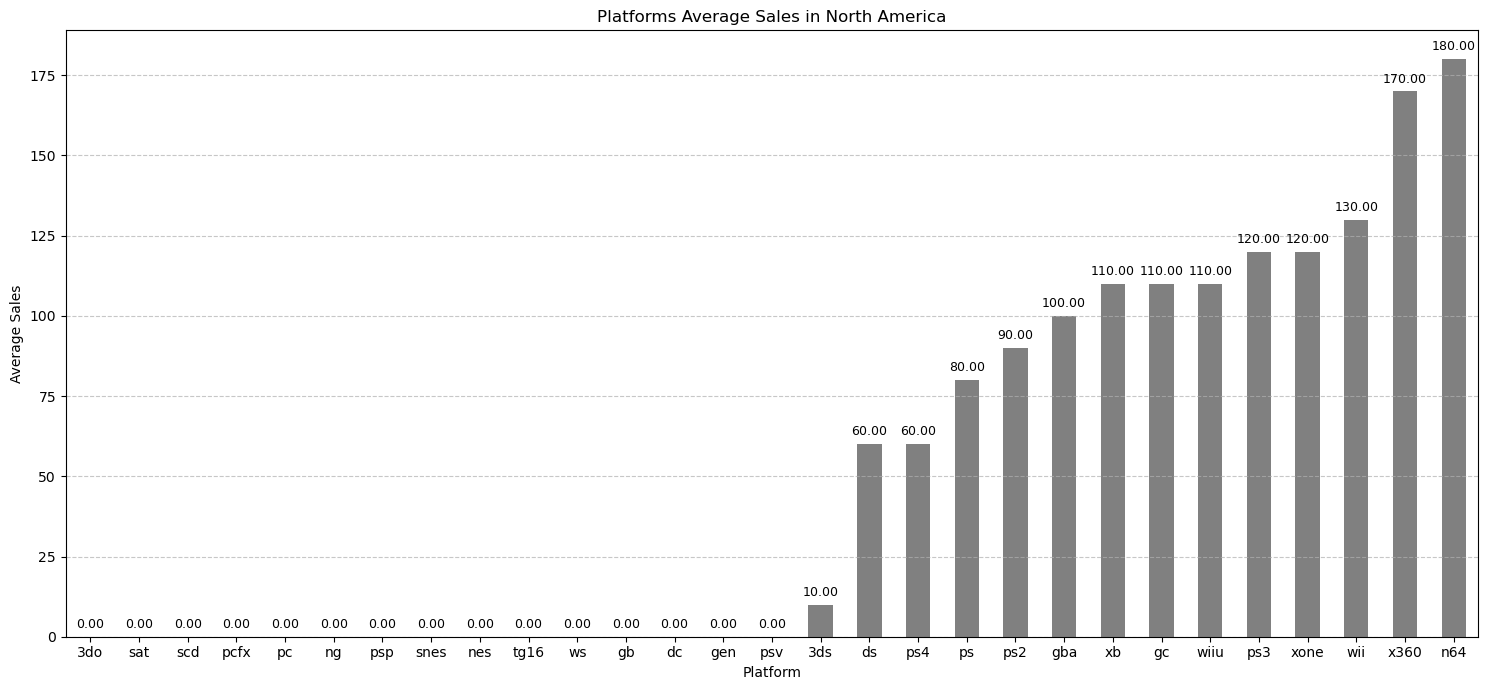

In [74]:
df_vg_platform_avg_sales = df_vg_platform_avg_sales.sort_values(by='na_sales')
plot_bar_series(df_vg_platform_avg_sales['na_sales'], title='Platforms Average Sales in North America', xlabel='Platform', ylabel='Average Sales',
                color='grey', rotation=0, show_values=True, xticks=None, yticks=None)

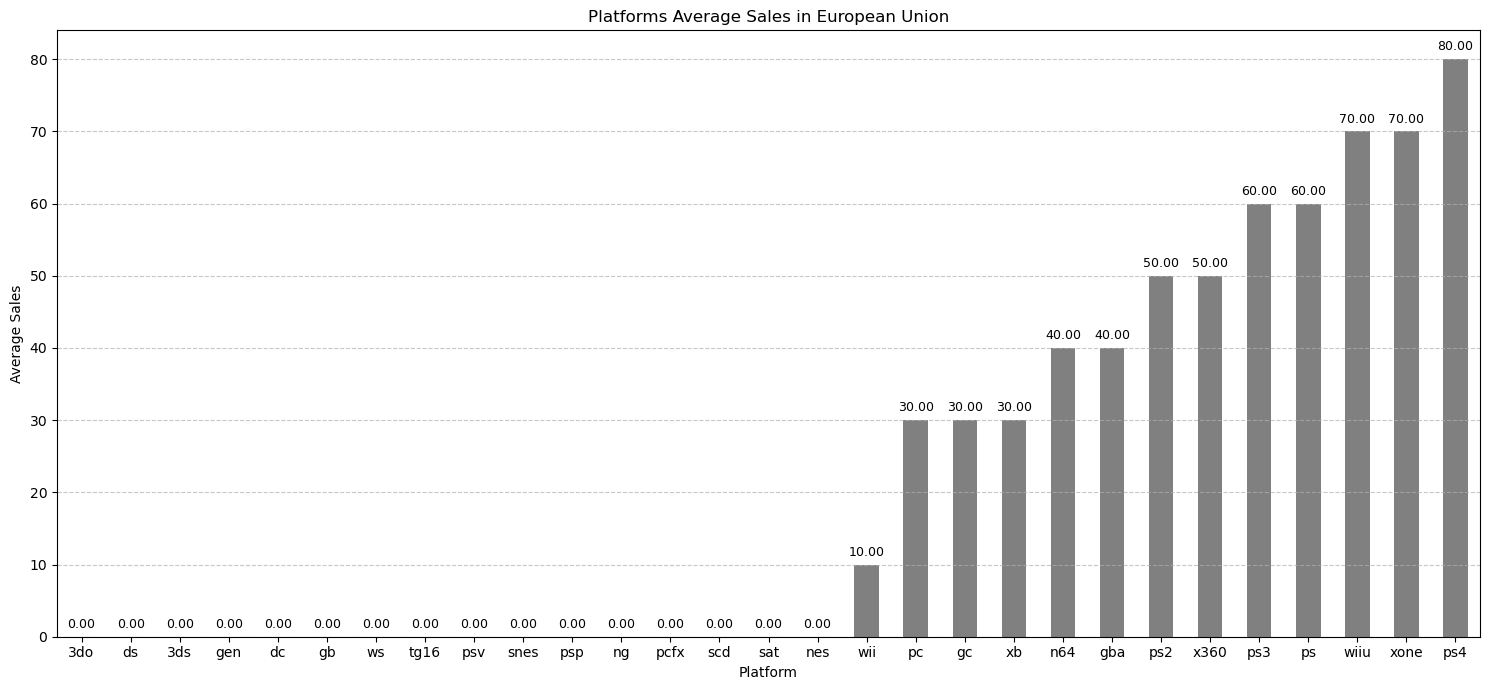

In [75]:
df_vg_platform_avg_sales = df_vg_platform_avg_sales.sort_values(by='eu_sales')
plot_bar_series(df_vg_platform_avg_sales['eu_sales'], title='Platforms Average Sales in European Union', xlabel='Platform', ylabel='Average Sales',
                color='grey', rotation=0, show_values=True, xticks=None, yticks=None)

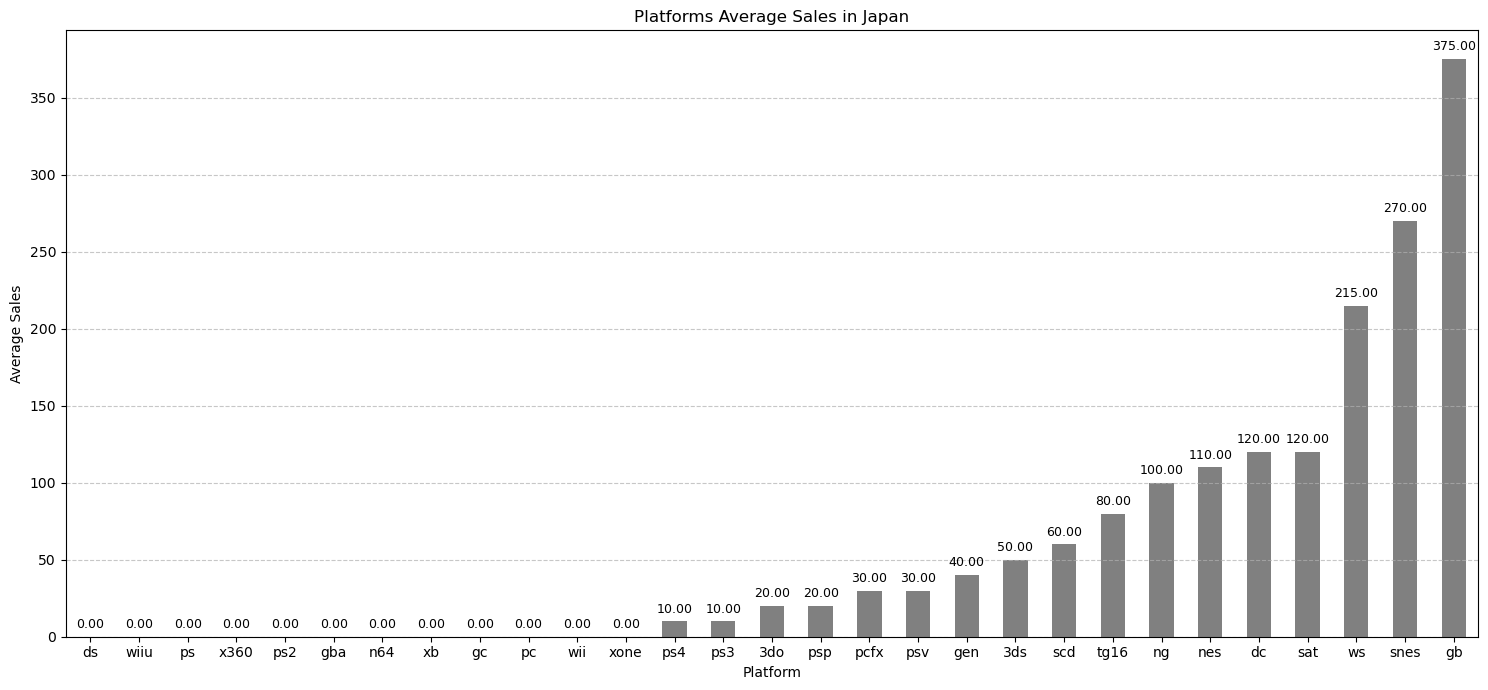

In [76]:
df_vg_platform_avg_sales = df_vg_platform_avg_sales.sort_values(by='jp_sales')
plot_bar_series(df_vg_platform_avg_sales['jp_sales'], title='Platforms Average Sales in Japan', xlabel='Platform', ylabel='Average Sales',
                color='grey', rotation=0, show_values=True, xticks=None, yticks=None)

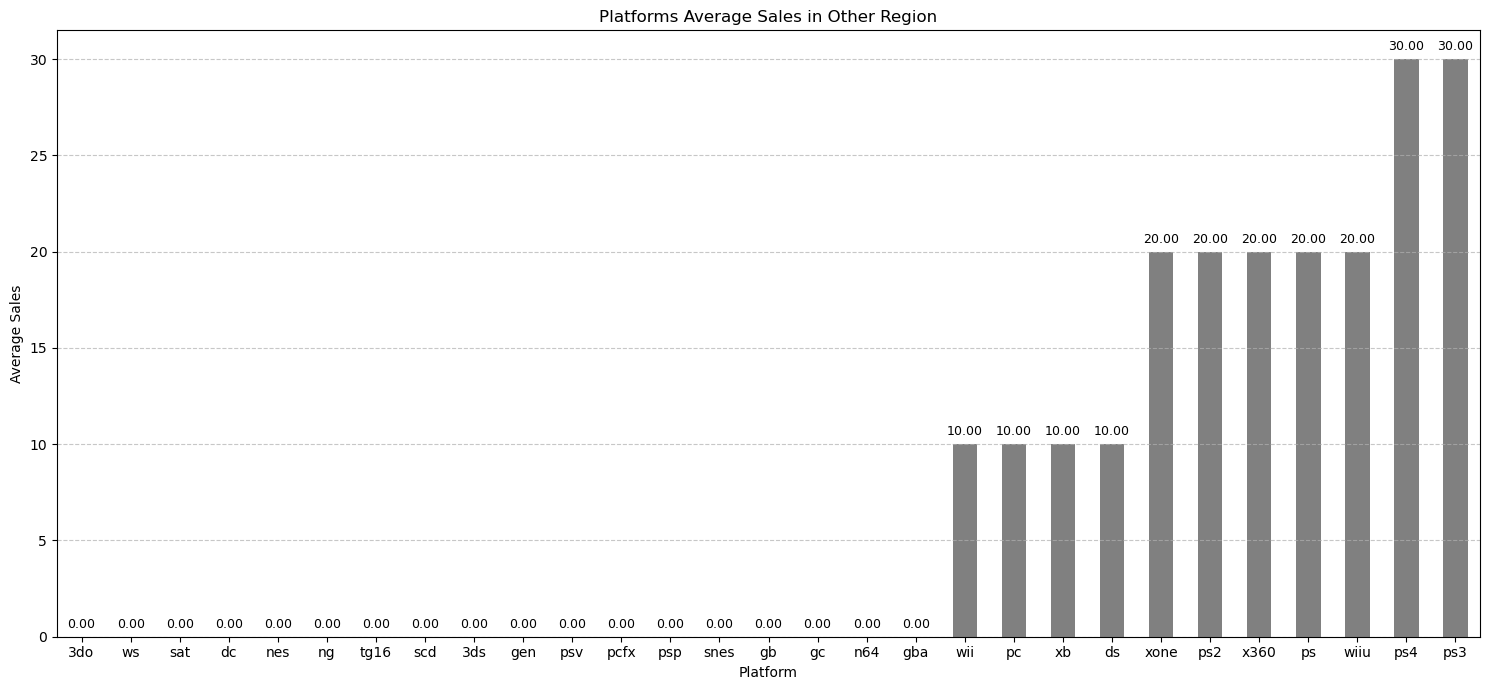

In [77]:
df_vg_platform_avg_sales = df_vg_platform_avg_sales.sort_values(by='other_sales')
plot_bar_series(df_vg_platform_avg_sales['other_sales'], title='Platforms Average Sales in Other Region', xlabel='Platform', ylabel='Average Sales',
                color='grey', rotation=0, show_values=True, xticks=None, yticks=None)

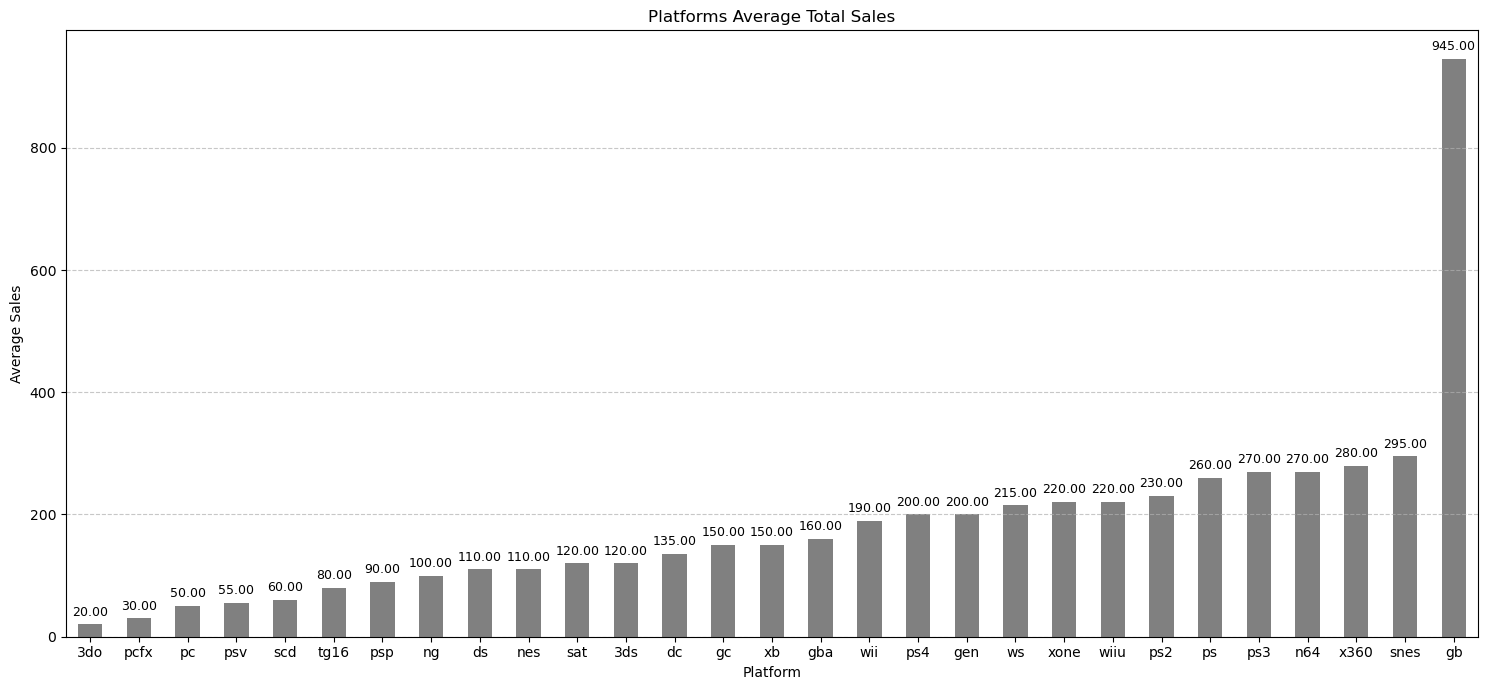

In [78]:
df_vg_platform_avg_sales = df_vg_platform_avg_sales.sort_values(by='total_sales')
plot_bar_series(df_vg_platform_avg_sales['total_sales'], title='Platforms Average Total Sales', xlabel='Platform', ylabel='Average Sales',
                color='grey', rotation=0, show_values=True, xticks=None, yticks=None)

##### 3.4.8 Data visualization for Impact of User and Critic Reviews on Game Sales for [Platform].

3.4.8.1 Data visualization for Impact of User Reviews on Game Sales per platform.

In [79]:
df_vg_us_sales

platform  user_score  na_sales  eu_sales  jp_sales  other_sales  total_sales
0         3ds         2.4     100.0     350.0       0.0         30.0        480.0
1         3ds         2.8       0.0      30.0       0.0          0.0         30.0
2         3ds         3.0     150.0     150.0       0.0         30.0        330.0
3         3ds         3.3     300.0     370.0      30.0         70.0        770.0
4         3ds         3.4     160.0     100.0       0.0         20.0        280.0
...       ...         ...       ...       ...       ...          ...          ...
1506     xone         8.6     260.0      90.0       0.0         40.0        390.0
1507     xone         8.7     130.0      60.0       0.0         20.0        210.0
1508     xone         8.8      10.0       0.0       0.0          0.0         10.0
1509     xone         8.9      30.0      10.0       0.0          0.0         40.0
1510     xone         9.2     690.0     500.0       0.0        110.0       1300.0

[1511 rows x 7 columns]

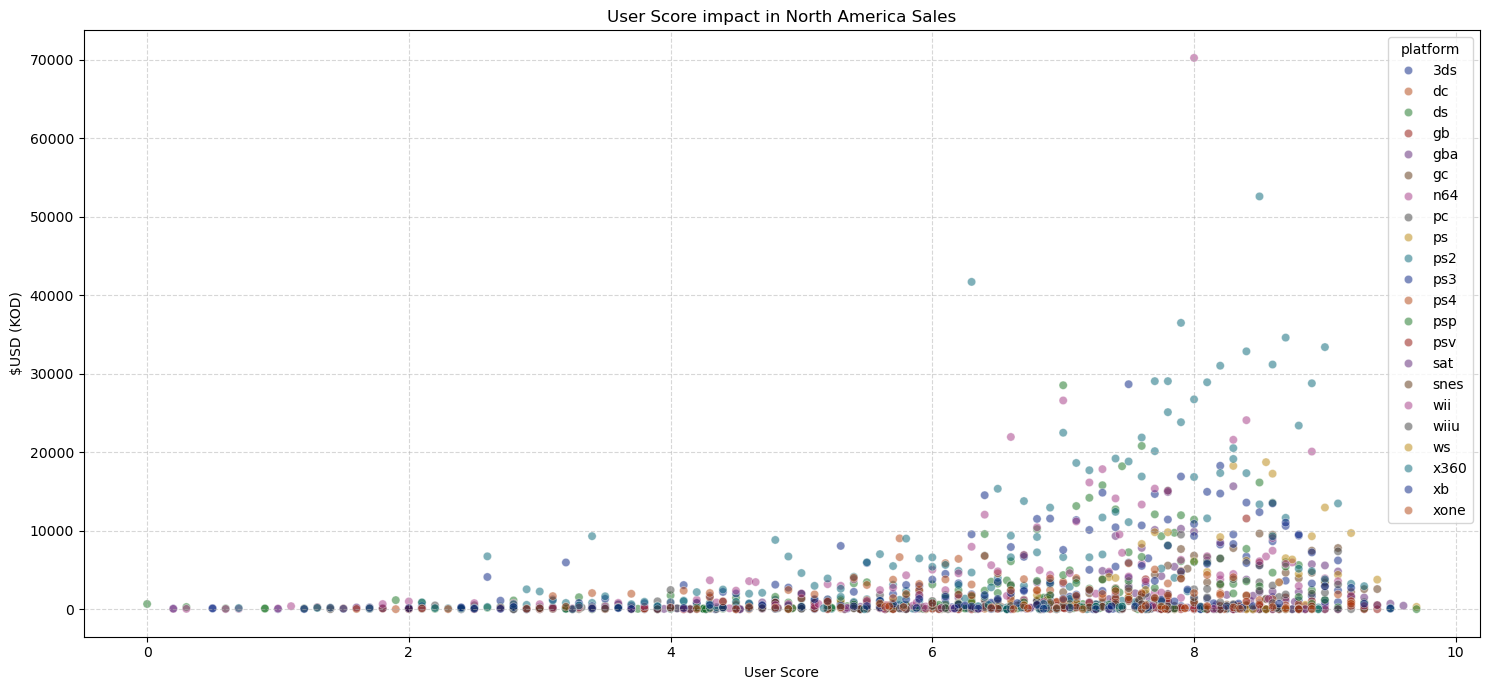

In [80]:
plot_scatter(df_vg_us_sales, x_col='user_score', y_col='na_sales', hue='platform', palette='dark', title='User Score impact in North America Sales', 
             xlabel='User Score', ylabel='$USD (KOD)', figsize=(15, 7), alpha=0.5, marker='o', xticks_range=None, yticks_range=None, 
             x_rotation=0, y_rotation=0)

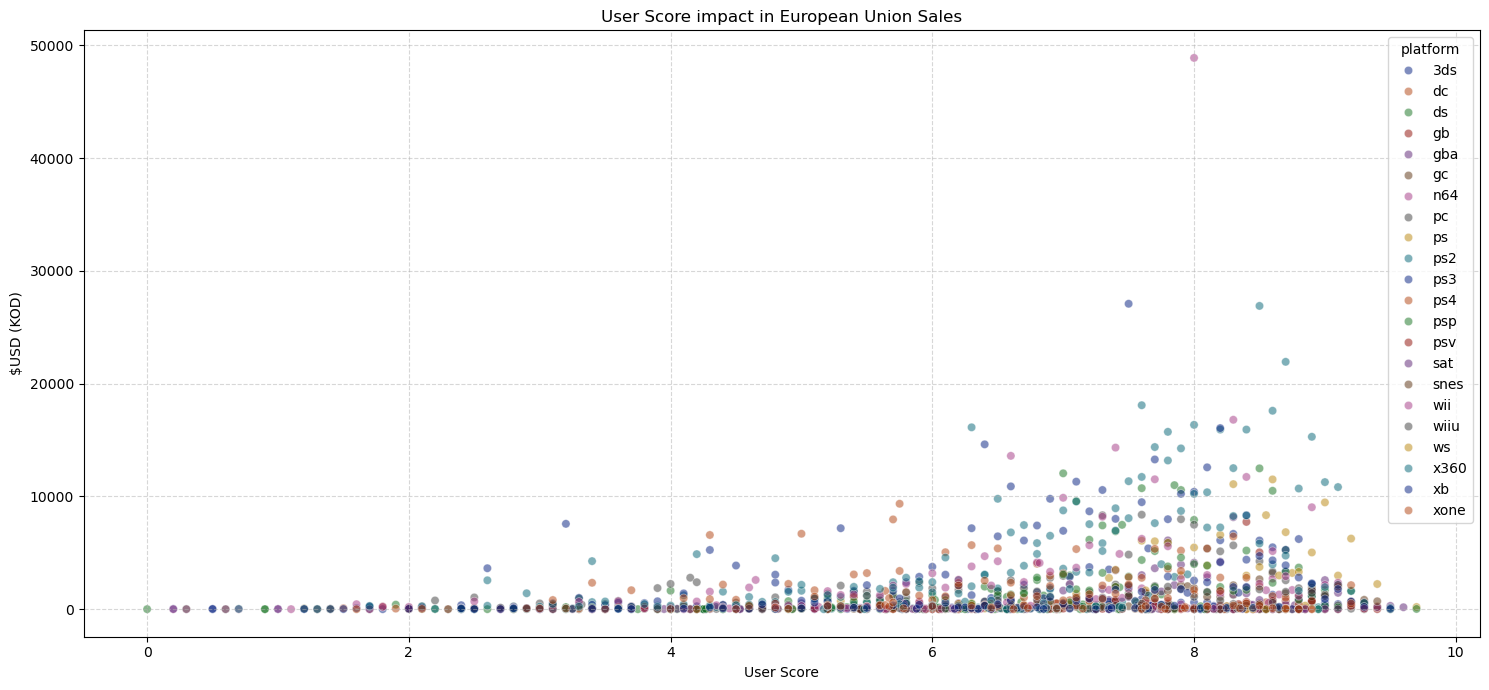

In [81]:
plot_scatter(df_vg_us_sales, x_col='user_score', y_col='eu_sales', hue='platform', palette='dark', title='User Score impact in European Union Sales', 
             xlabel='User Score', ylabel='$USD (KOD)', figsize=(15, 7), alpha=0.5, marker='o', xticks_range=None, yticks_range=None, 
             x_rotation=0, y_rotation=0)

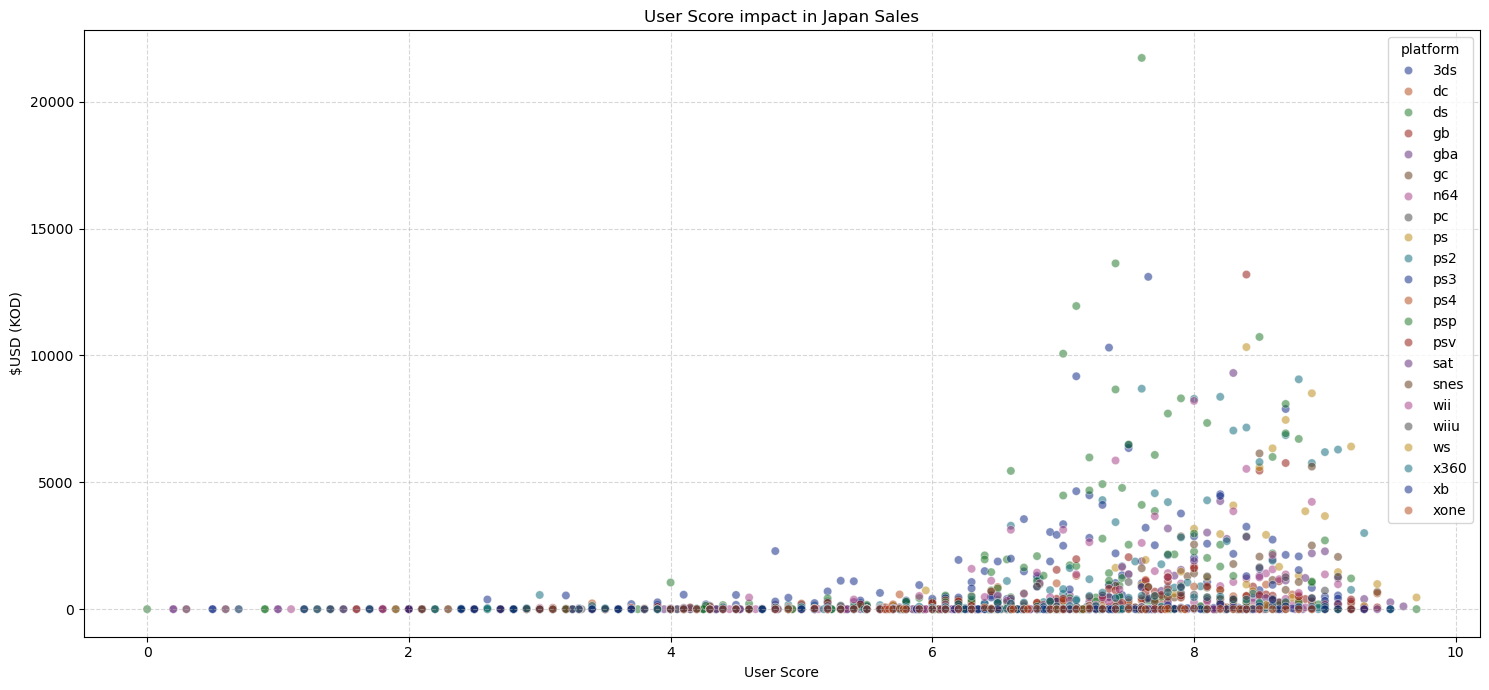

In [82]:
plot_scatter(df_vg_us_sales, x_col='user_score', y_col='jp_sales', hue='platform', palette='dark', title='User Score impact in Japan Sales', 
             xlabel='User Score', ylabel='$USD (KOD)', figsize=(15, 7), alpha=0.5, marker='o', xticks_range=None, yticks_range=None, 
             x_rotation=0, y_rotation=0)

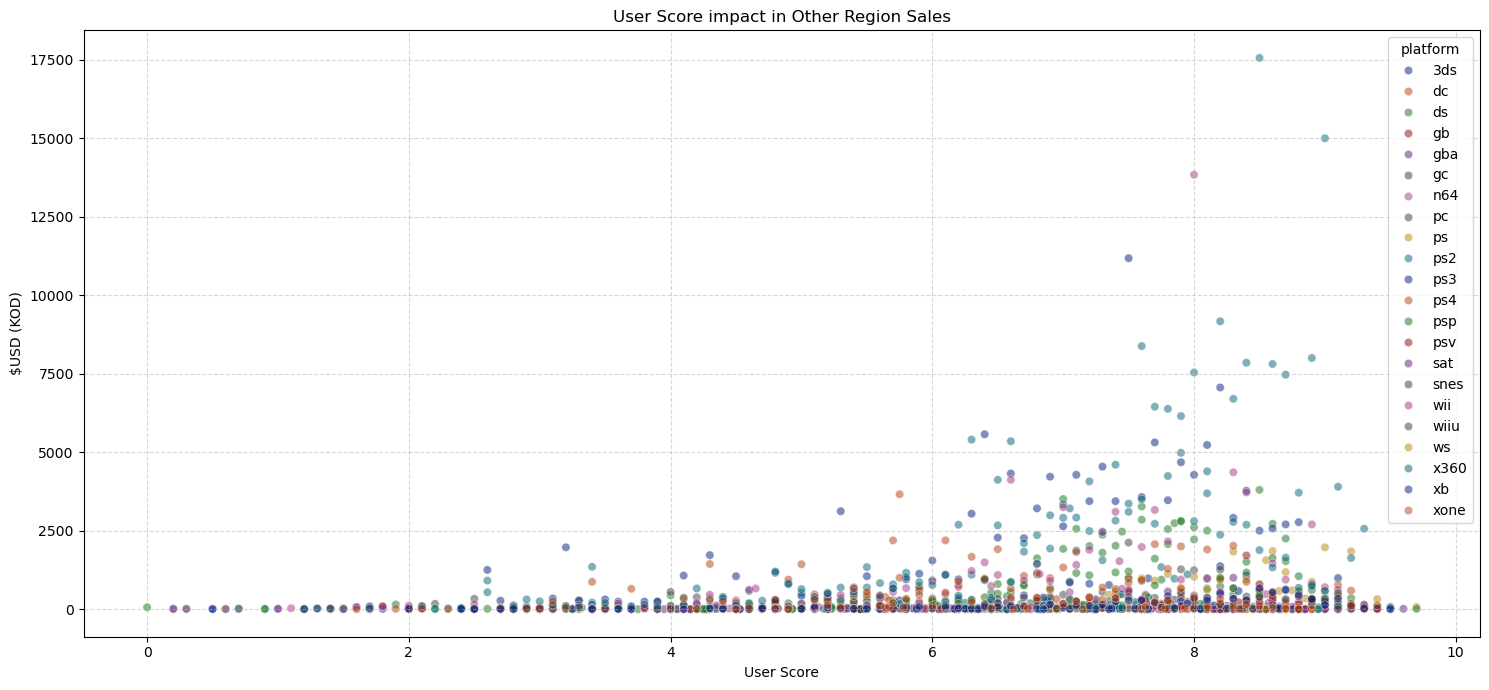

In [83]:
plot_scatter(df_vg_us_sales, x_col='user_score', y_col='other_sales', hue='platform', palette='dark', title='User Score impact in Other Region Sales', 
             xlabel='User Score', ylabel='$USD (KOD)', figsize=(15, 7), alpha=0.5, marker='o', xticks_range=None, yticks_range=None, 
             x_rotation=0, y_rotation=0)

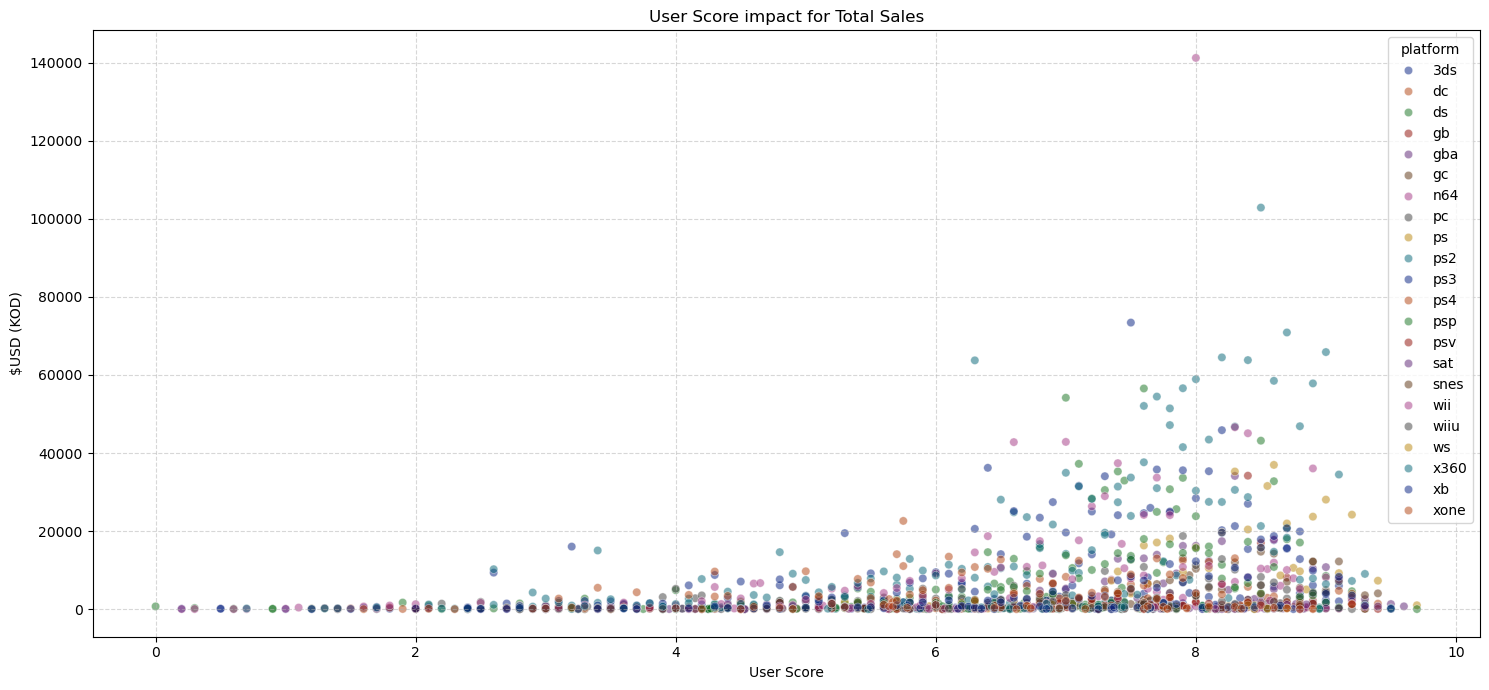

In [84]:
plot_scatter(df_vg_us_sales, x_col='user_score', y_col='total_sales', hue='platform', palette='dark', title='User Score impact for Total Sales', 
             xlabel='User Score', ylabel='$USD (KOD)', figsize=(15, 7), alpha=0.5, marker='o', xticks_range=None, yticks_range=None, 
             x_rotation=0, y_rotation=0)

3.4.8.2 Data visualization for Impact of Critic Reviews on Game Sales per platform.

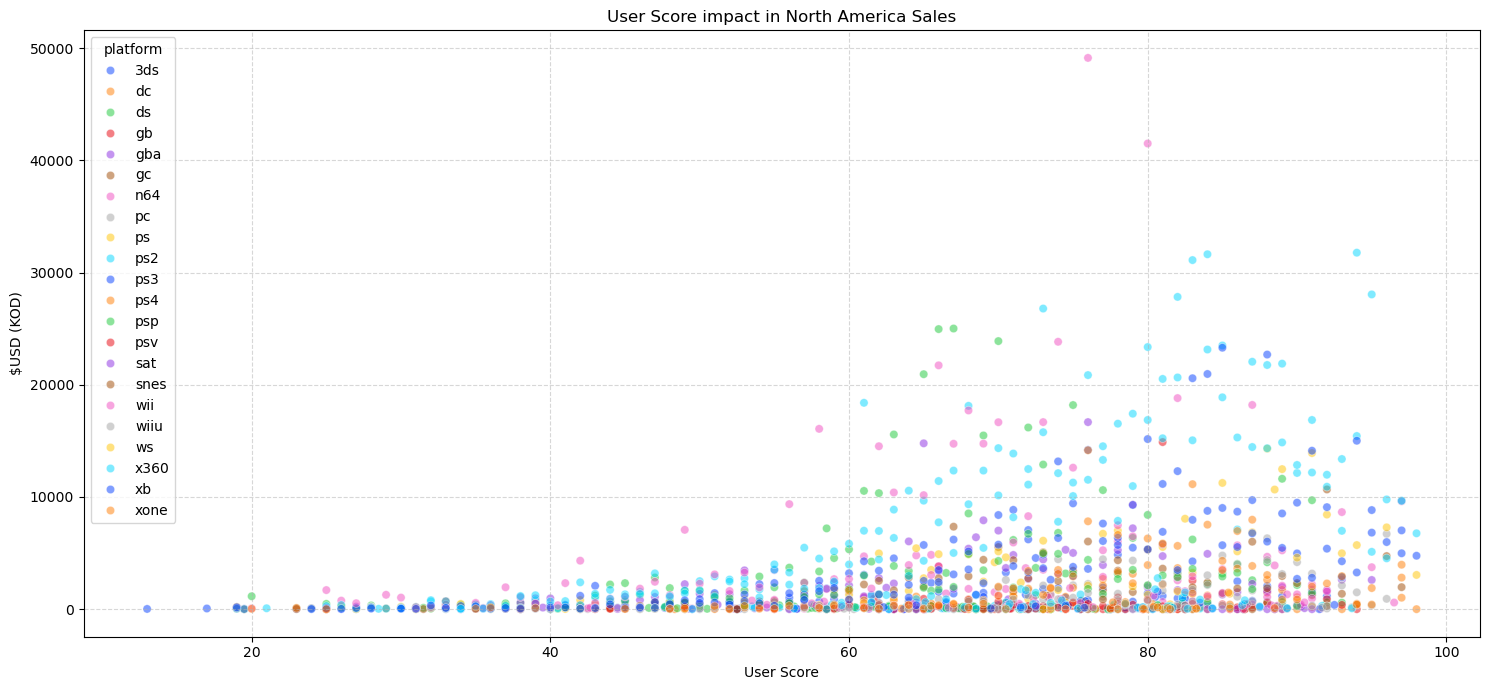

In [85]:
plot_scatter(df_vg_cs_sales, x_col='critic_score', y_col='na_sales', hue='platform', palette='bright', title='User Score impact in North America Sales', 
             xlabel='User Score', ylabel='$USD (KOD)', figsize=(15, 7), alpha=0.5, marker='o', xticks_range=None, yticks_range=None, 
             x_rotation=0, y_rotation=0)

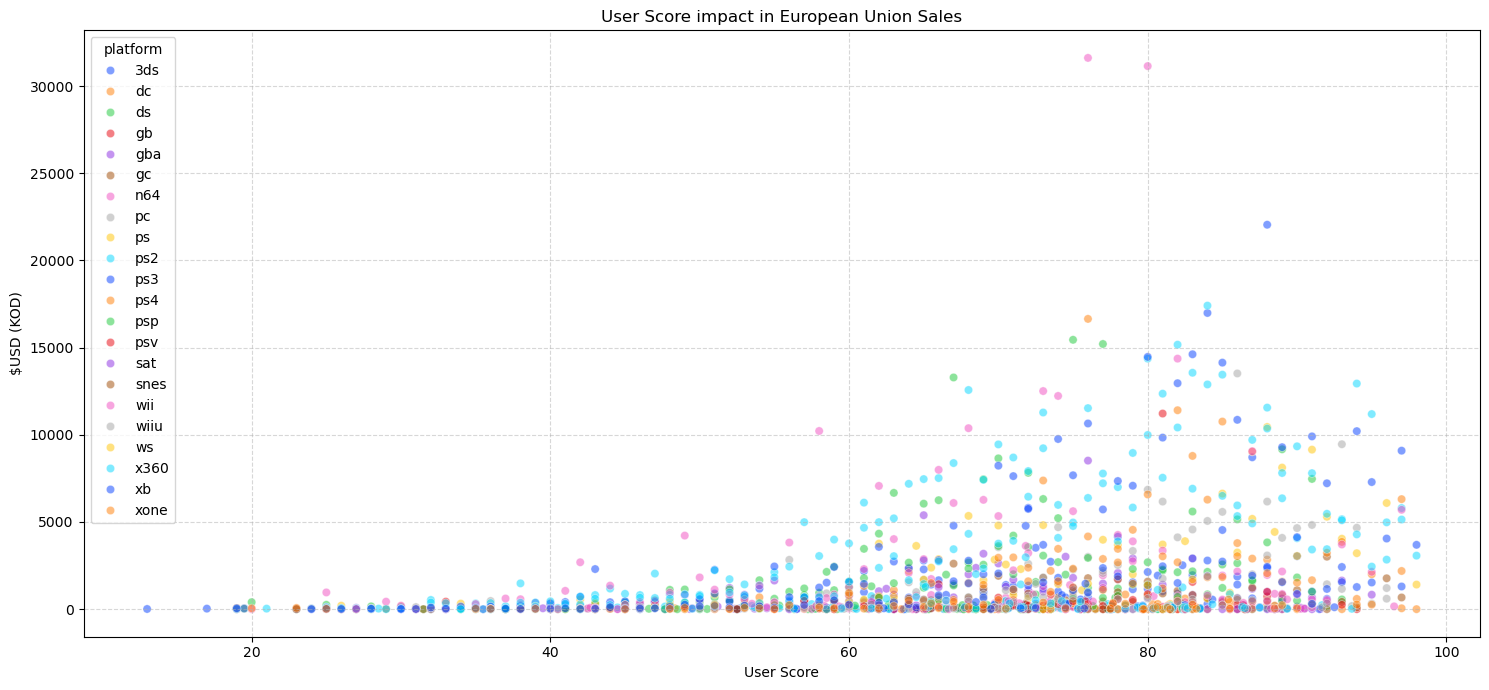

In [86]:
plot_scatter(df_vg_cs_sales, x_col='critic_score', y_col='eu_sales', hue='platform', palette='bright', title='User Score impact in European Union Sales', 
             xlabel='User Score', ylabel='$USD (KOD)', figsize=(15, 7), alpha=0.5, marker='o', xticks_range=None, yticks_range=None, 
             x_rotation=0, y_rotation=0)

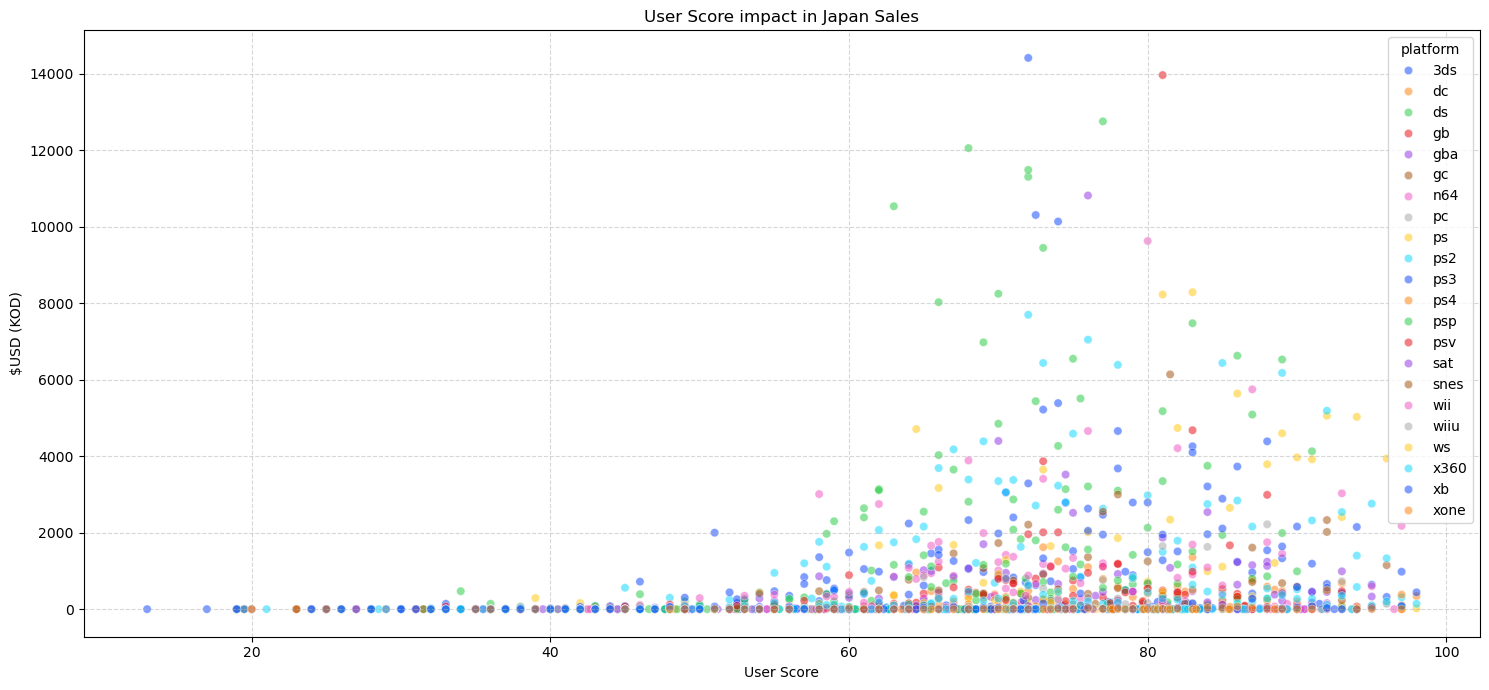

In [87]:
plot_scatter(df_vg_cs_sales, x_col='critic_score', y_col='jp_sales', hue='platform', palette='bright', title='User Score impact in Japan Sales', 
             xlabel='User Score', ylabel='$USD (KOD)', figsize=(15, 7), alpha=0.5, marker='o', xticks_range=None, yticks_range=None, 
             x_rotation=0, y_rotation=0)

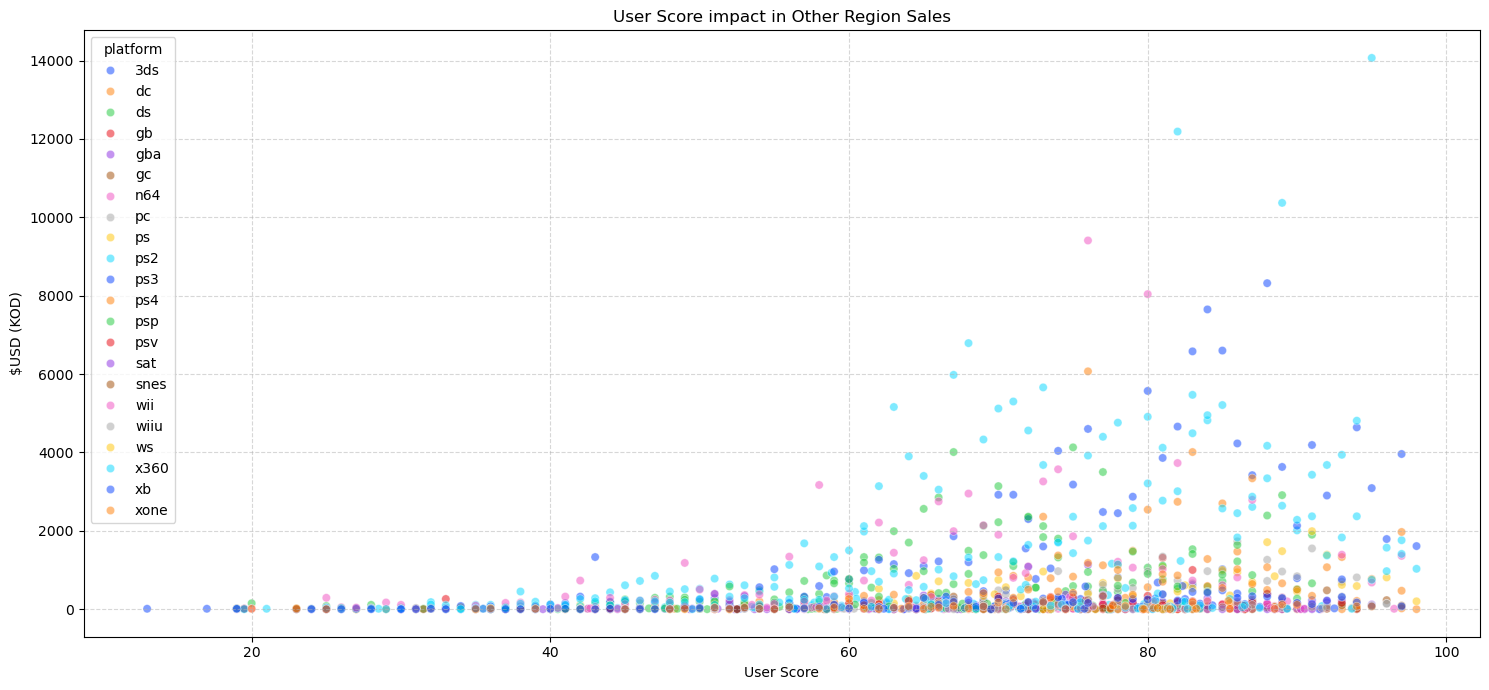

In [88]:
plot_scatter(df_vg_cs_sales, x_col='critic_score', y_col='other_sales', hue='platform', palette='bright', title='User Score impact in Other Region Sales', 
             xlabel='User Score', ylabel='$USD (KOD)', figsize=(15, 7), alpha=0.5, marker='o', xticks_range=None, yticks_range=None, 
             x_rotation=0, y_rotation=0)

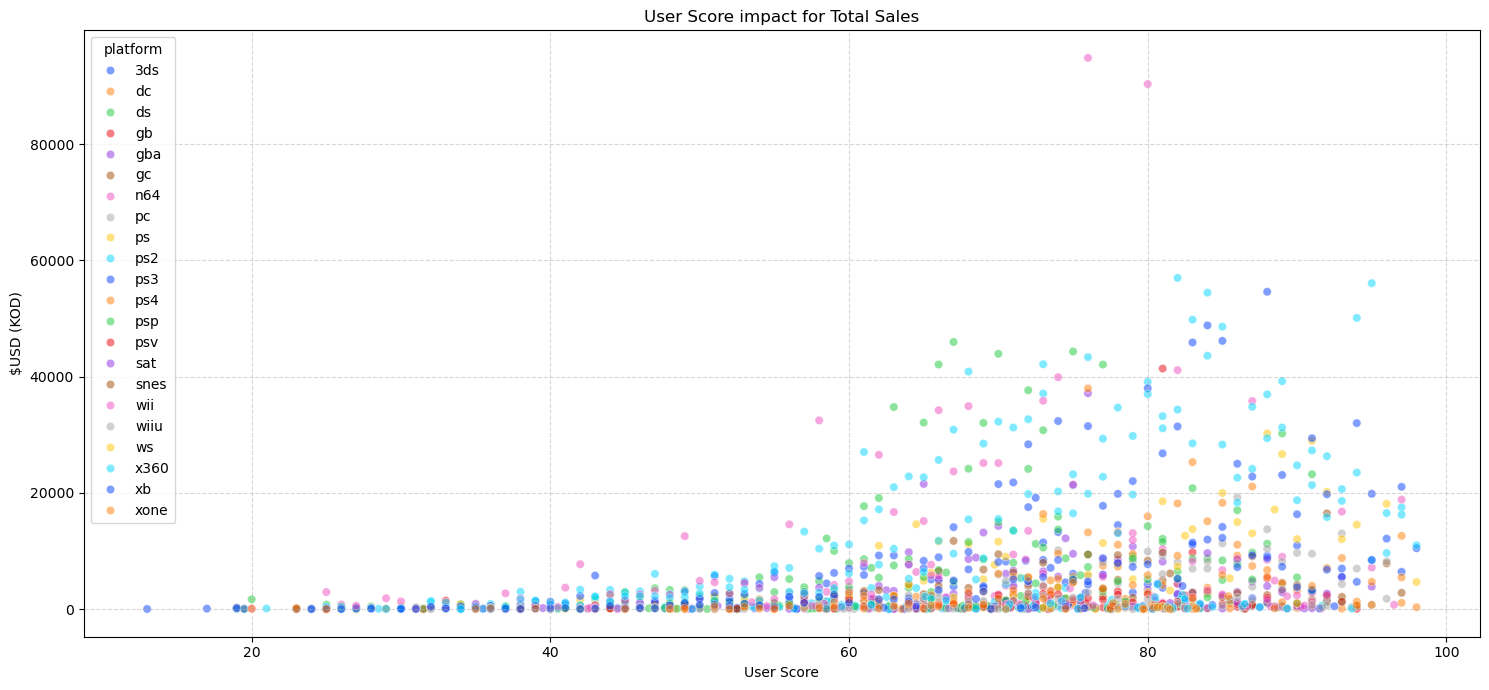

In [89]:
plot_scatter(df_vg_cs_sales, x_col='critic_score', y_col='total_sales', hue='platform', palette='bright', title='User Score impact for Total Sales', 
             xlabel='User Score', ylabel='$USD (KOD)', figsize=(15, 7), alpha=0.5, marker='o', xticks_range=None, yticks_range=None, 
             x_rotation=0, y_rotation=0)

##### 3.4.9 Data visualization for Sales Comparison of the Same Games Across Different Platforms.

 3.4.9.1 Data visualization for Total Sales Comparison of the Same Games Across Different Platforms.

In [90]:
df_vg_games_platform['total_sales'] = df_vg_games_platform[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

df_games_platform_top_games = (df_vg_games_platform.groupby('name', as_index=False)['total_sales'].sum()
                               .sort_values(by='total_sales', ascending=False).head(25))

df_vg_games_platform_top_games = df_vg_games_platform[df_vg_games_platform['name'].isin(df_games_platform_top_games['name'])]
df_vg_games_platform_top_games

name platform  na_sales  eu_sales  jp_sales  other_sales  name_total_count  total_sales
29   assassin_s_...      ps3    2640.0    2520.0     160.0       1120.0               2         6440.0
30   assassin_s_...     x360    3130.0    1690.0      30.0        440.0               2         5290.0
42    battlefield_3      ps3    2850.0    2890.0     350.0       1080.0               2         7170.0
43    battlefield_3     x360    4460.0    2110.0      60.0        690.0               2         7320.0
85   call_of_dut...       ds     950.0      10.0      10.0         80.0               3         1050.0
..              ...      ...       ...       ...       ...          ...             ...            ...
670  the_elder_s...      ps3    2550.0    2600.0     250.0       1000.0               3         6400.0
671  the_elder_s...      ps4     480.0     590.0      40.0        210.0               3         1320.0
672  the_elder_s...     x360    5050.0    2790.0     100.0        850.0               3         8790.0
688  the_legend_...      3ds    2090.0    1310.0     620.0        310.0               2         4330.0
689  the_legend_...      n64    4100.0    1890.0    1450.0        160.0               2         7600.0

[64 rows x 8 columns]

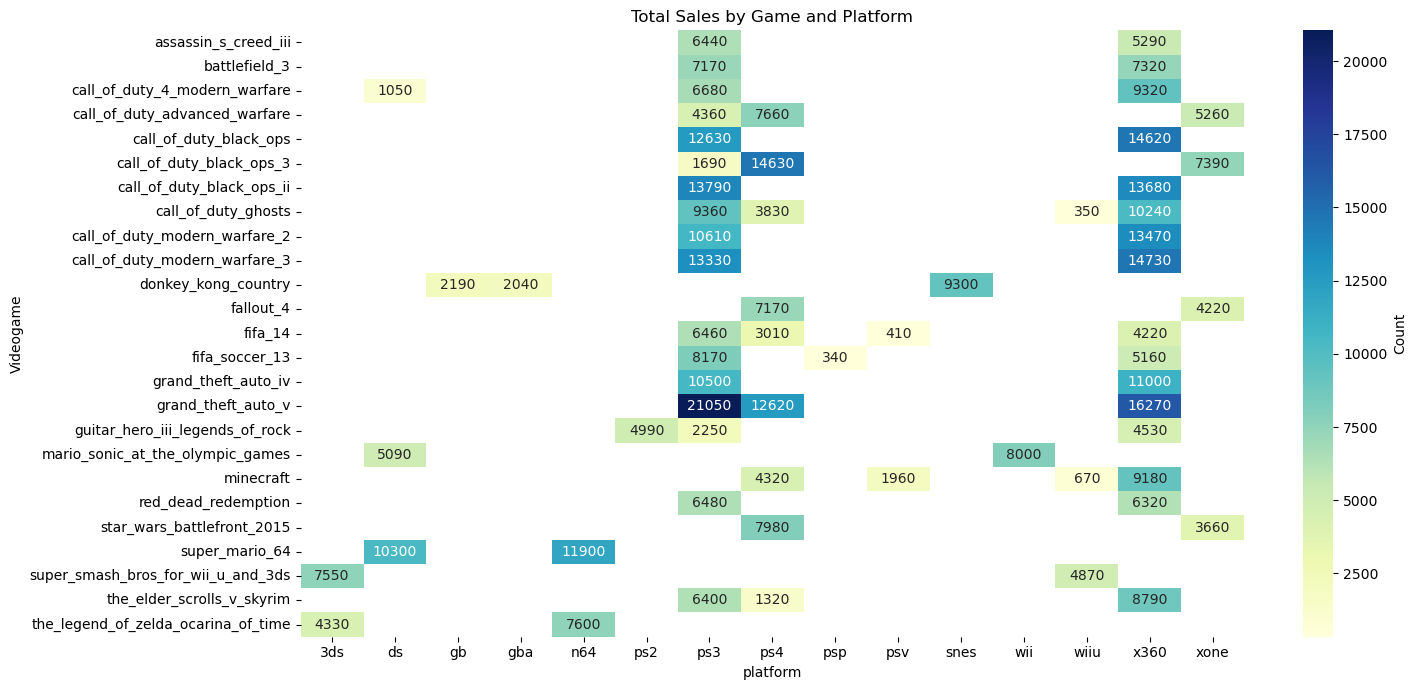

In [91]:
pivot = df_vg_games_platform_top_games.pivot(index='name', columns='platform', values='total_sales')

plot_heatmap(pivot, title='Total Sales by Game and Platform', xlabel='platform', ylabel='Videogame', cmap='YlGnBu', annot=True, fmt='.0f', cbar_label='Count', figsize=(15, 7))


3.4.9.2 Data visualization for North America Sales Comparison of the Same Games Across Different Platforms.

In [92]:
df_games_platform_top_games_na = (df_vg_games_platform.groupby('name', as_index=False)['na_sales'].sum()
                                 .sort_values(by='na_sales', ascending=False).head(25))

df_vg_games_platform_top_games_na = df_vg_games_platform[df_vg_games_platform['name'].isin(df_games_platform_top_games_na['name'])]
df_vg_games_platform_top_games_na

name platform  na_sales  eu_sales  jp_sales  other_sales  name_total_count  total_sales
21   assassin_s_...      ps3    1910.0    2000.0      90.0        820.0               2         4820.0
22   assassin_s_...     x360    3280.0    1640.0      70.0        560.0               2         5550.0
27   assassin_s_...      ps3    2540.0    1930.0     210.0        860.0               2         5540.0
28   assassin_s_...     x360    3110.0    1550.0      80.0        510.0               2         5250.0
29   assassin_s_...      ps3    2640.0    2520.0     160.0       1120.0               2         6440.0
..              ...      ...       ...       ...       ...          ...             ...            ...
670  the_elder_s...      ps3    2550.0    2600.0     250.0       1000.0               3         6400.0
671  the_elder_s...      ps4     480.0     590.0      40.0        210.0               3         1320.0
672  the_elder_s...     x360    5050.0    2790.0     100.0        850.0               3         8790.0
688  the_legend_...      3ds    2090.0    1310.0     620.0        310.0               2         4330.0
689  the_legend_...      n64    4100.0    1890.0    1450.0        160.0               2         7600.0

[61 rows x 8 columns]

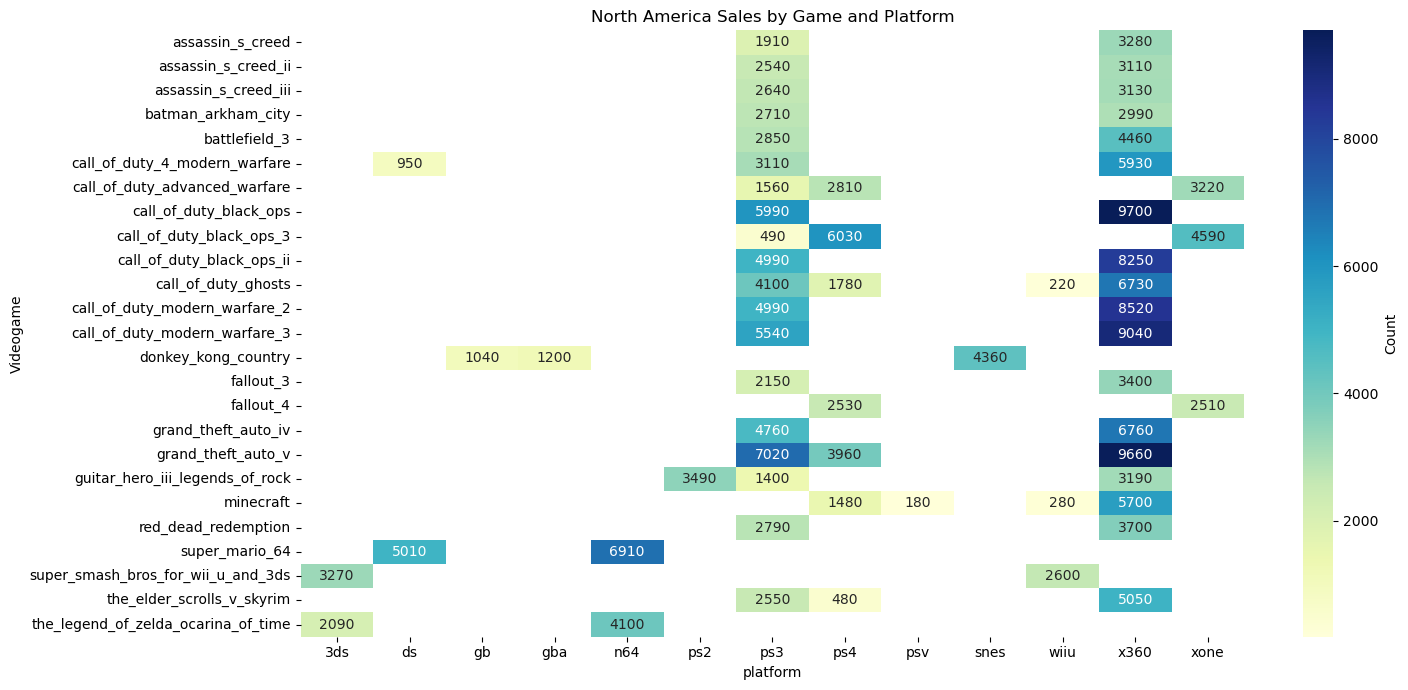

In [93]:
pivot_na = df_vg_games_platform_top_games_na.pivot(index='name', columns='platform', values='na_sales')

plot_heatmap(pivot_na, title='North America Sales by Game and Platform', xlabel='platform', ylabel='Videogame', cmap='YlGnBu', annot=True, fmt='.0f', cbar_label='Count', figsize=(15, 7))


3.4.9.3 Data visualization for European Union Sales Comparison of the Same Games Across Different Platforms.

In [94]:
df_games_platform_top_games_eu = (df_vg_games_platform.groupby('name', as_index=False)['eu_sales'].sum()
                                 .sort_values(by='eu_sales', ascending=False).head(25))

df_vg_games_platform_top_games_eu = df_vg_games_platform[df_vg_games_platform['name'].isin(df_games_platform_top_games_eu['name'])]
df_vg_games_platform_top_games_eu

name platform  na_sales  eu_sales  jp_sales  other_sales  name_total_count  total_sales
42    battlefield_3      ps3    2850.0    2890.0     350.0       1080.0               2         7170.0
43    battlefield_3     x360    4460.0    2110.0      60.0        690.0               2         7320.0
85   call_of_dut...       ds     950.0      10.0      10.0         80.0               3         1050.0
86   call_of_dut...      ps3    3110.0    2260.0     280.0       1030.0               3         6680.0
87   call_of_dut...     x360    5930.0    2360.0     130.0        900.0               3         9320.0
..              ...      ...       ...       ...       ...          ...             ...            ...
646  super_mario_64       ds    5010.0    3070.0    1250.0        970.0               2        10300.0
647  super_mario_64      n64    6910.0    2850.0    1910.0        230.0               2        11900.0
670  the_elder_s...      ps3    2550.0    2600.0     250.0       1000.0               3         6400.0
671  the_elder_s...      ps4     480.0     590.0      40.0        210.0               3         1320.0
672  the_elder_s...     x360    5050.0    2790.0     100.0        850.0               3         8790.0

[68 rows x 8 columns]

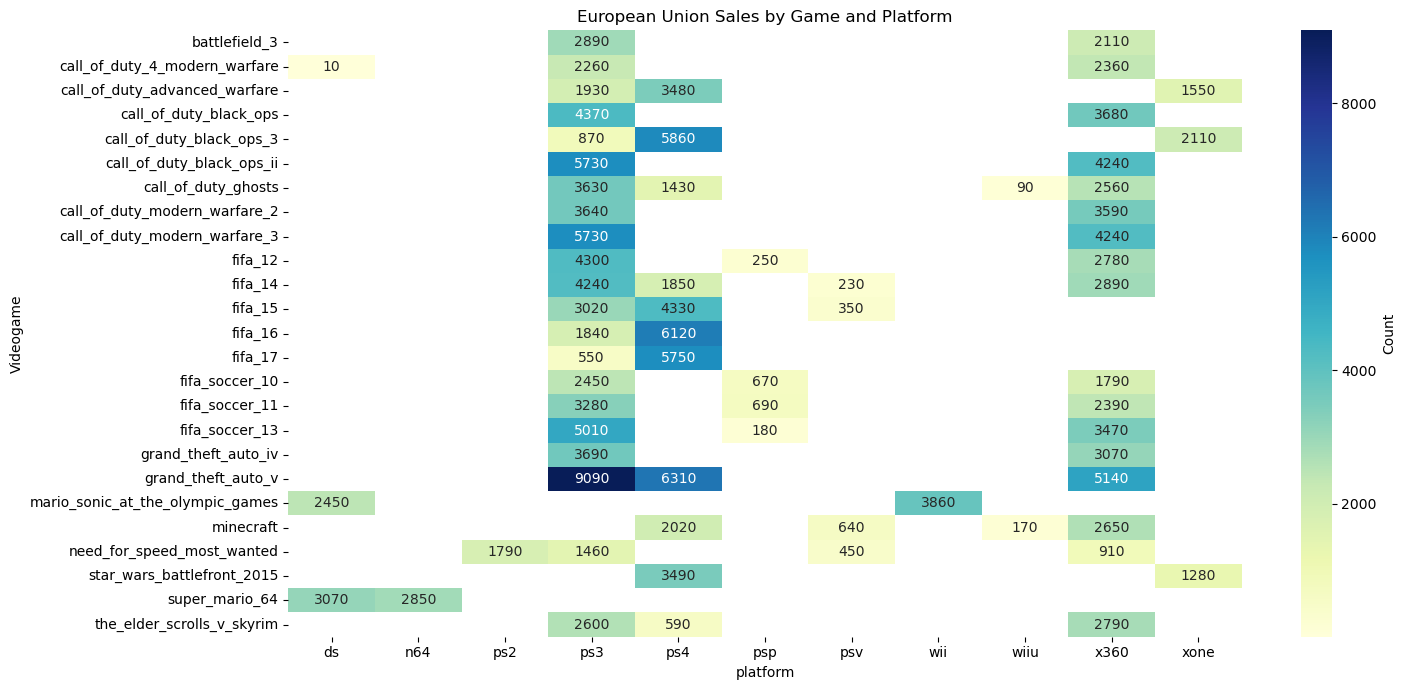

In [95]:
pivot_eu = df_vg_games_platform_top_games_eu.pivot(index='name', columns='platform', values='eu_sales')

plot_heatmap(pivot_eu, title='European Union Sales by Game and Platform', xlabel='platform', ylabel='Videogame', cmap='YlGnBu', annot=True, fmt='.0f', cbar_label='Count', figsize=(15, 7))


3.4.9.4 Data visualization for Japan Sales Comparison of the Same Games Across Different Platforms.

In [96]:
df_games_platform_top_games_jp = (df_vg_games_platform.groupby('name', as_index=False)['jp_sales'].sum()
                                 .sort_values(by='jp_sales', ascending=False).head(25))

df_vg_games_platform_top_games_jp = df_vg_games_platform[df_vg_games_platform['name'].isin(df_games_platform_top_games_jp['name'])]
df_vg_games_platform_top_games_jp

name platform  na_sales  eu_sales  jp_sales  other_sales  name_total_count  total_sales
160  donkey_kong...       gb    1040.0     720.0     300.0        130.0               3         2190.0
161  donkey_kong...      gba    1200.0     480.0     290.0         70.0               3         2040.0
162  donkey_kong...     snes    4360.0    1710.0    3000.0        230.0               3         9300.0
163  donkey_kong...      3ds     740.0     620.0     410.0        130.0               2         1900.0
164  donkey_kong...      wii    3170.0    1790.0    1030.0        460.0               2         6450.0
..              ...      ...       ...       ...       ...          ...             ...            ...
691  the_legend_...     wiiu     920.0     600.0     140.0        140.0               2         1800.0
758  winning_ele...      ps2     100.0    2390.0    1050.0        860.0               2         4400.0
759  winning_ele...      psp      10.0     720.0     120.0         10.0               2          860.0
764  world_socce...      ps2     120.0    2260.0     900.0        770.0               2         4050.0
765  world_socce...       xb      60.0     330.0      20.0         30.0               2          440.0

[61 rows x 8 columns]

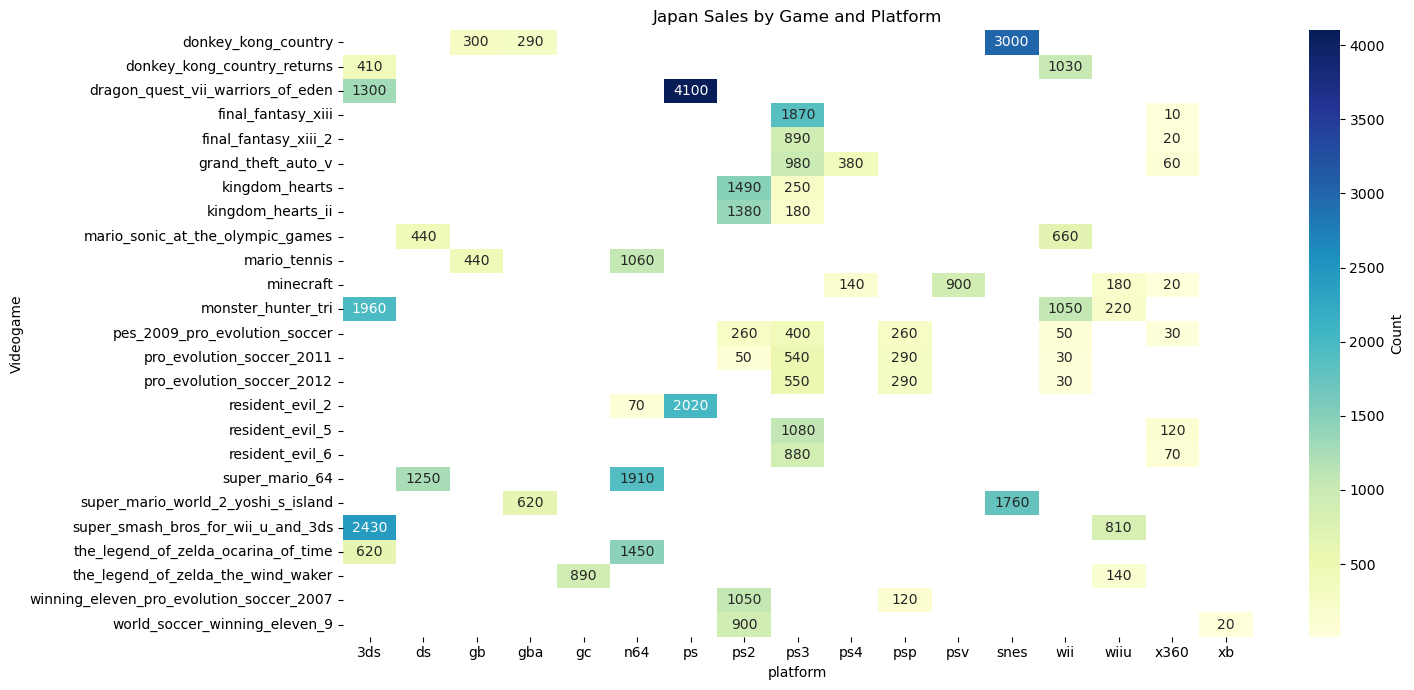

In [97]:
pivot_jp = df_vg_games_platform_top_games_jp.pivot(index='name', columns='platform', values='jp_sales')

plot_heatmap(pivot_jp, title='Japan Sales by Game and Platform', xlabel='platform', ylabel='Videogame', cmap='YlGnBu', annot=True, fmt='.0f', cbar_label='Count', figsize=(15, 7))


3.4.9.5 Data visualization for Other Region Sales Comparison of the Same Games Across Different Platforms.

In [98]:
df_games_platform_top_games_other = (df_vg_games_platform.groupby('name', as_index=False)['other_sales'].sum()
                                    .sort_values(by='other_sales', ascending=False).head(25))

df_vg_games_platform_top_games_other = df_vg_games_platform[df_vg_games_platform['name'].isin(df_games_platform_top_games_other['name'])]
df_vg_games_platform_top_games_other

name platform  na_sales  eu_sales  jp_sales  other_sales  name_total_count  total_sales
42    battlefield_3      ps3    2850.0    2890.0     350.0       1080.0               2         7170.0
43    battlefield_3     x360    4460.0    2110.0      60.0        690.0               2         7320.0
85   call_of_dut...       ds     950.0      10.0      10.0         80.0               3         1050.0
86   call_of_dut...      ps3    3110.0    2260.0     280.0       1030.0               3         6680.0
87   call_of_dut...     x360    5930.0    2360.0     130.0        900.0               3         9320.0
..              ...      ...       ...       ...       ...          ...             ...            ...
670  the_elder_s...      ps3    2550.0    2600.0     250.0       1000.0               3         6400.0
671  the_elder_s...      ps4     480.0     590.0      40.0        210.0               3         1320.0
672  the_elder_s...     x360    5050.0    2790.0     100.0        850.0               3         8790.0
682  the_last_of_us      ps3    2410.0    2180.0     280.0        990.0               2         5860.0
683  the_last_of_us      ps4    1880.0    2000.0      70.0        770.0               2         4720.0

[75 rows x 8 columns]

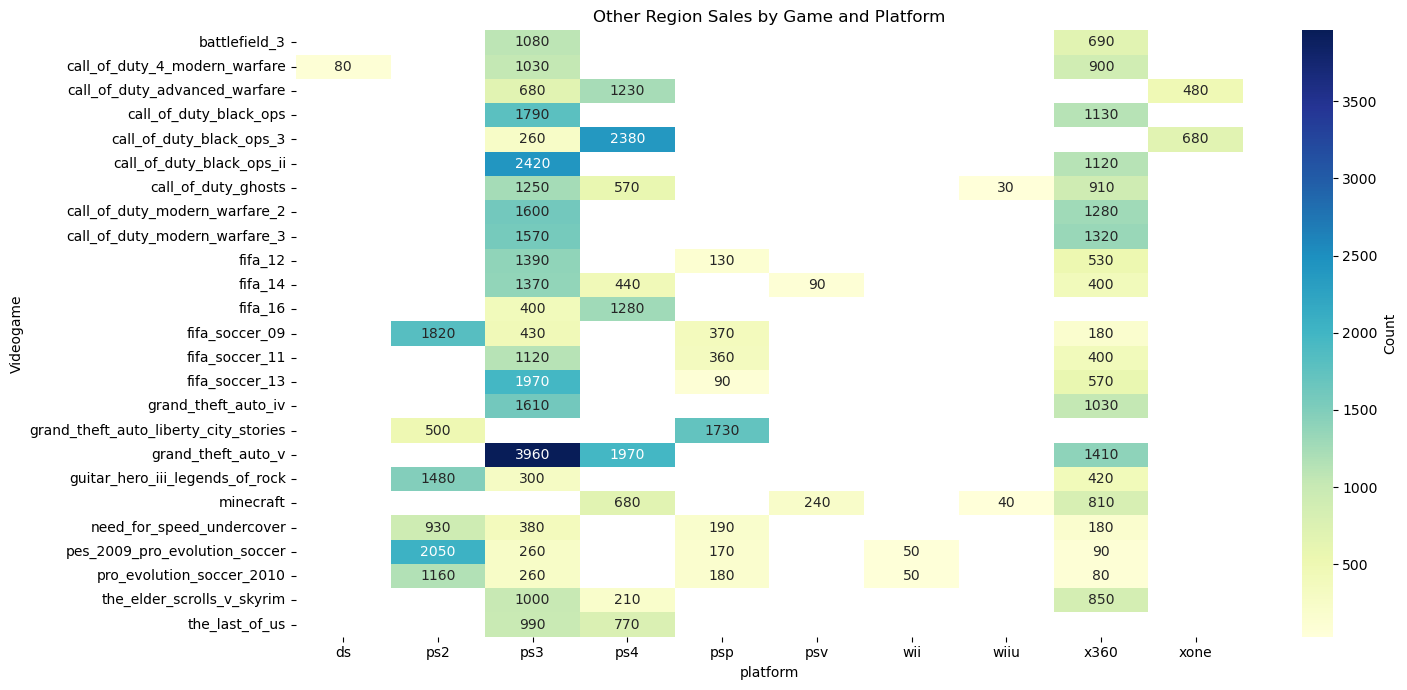

In [99]:
pivot_other = df_vg_games_platform_top_games_other.pivot(index='name', columns='platform', values='other_sales')

plot_heatmap(pivot_other, title='Other Region Sales by Game and Platform', xlabel='platform', ylabel='Videogame', cmap='YlGnBu', annot=True, fmt='.0f', cbar_label='Count', figsize=(15, 7))


##### 3.4.10 Data visualization for Genre Distribution Across the Video Game Market.

In [100]:
df_vg_games_genre = df_vg_games_genre.set_index('genre')


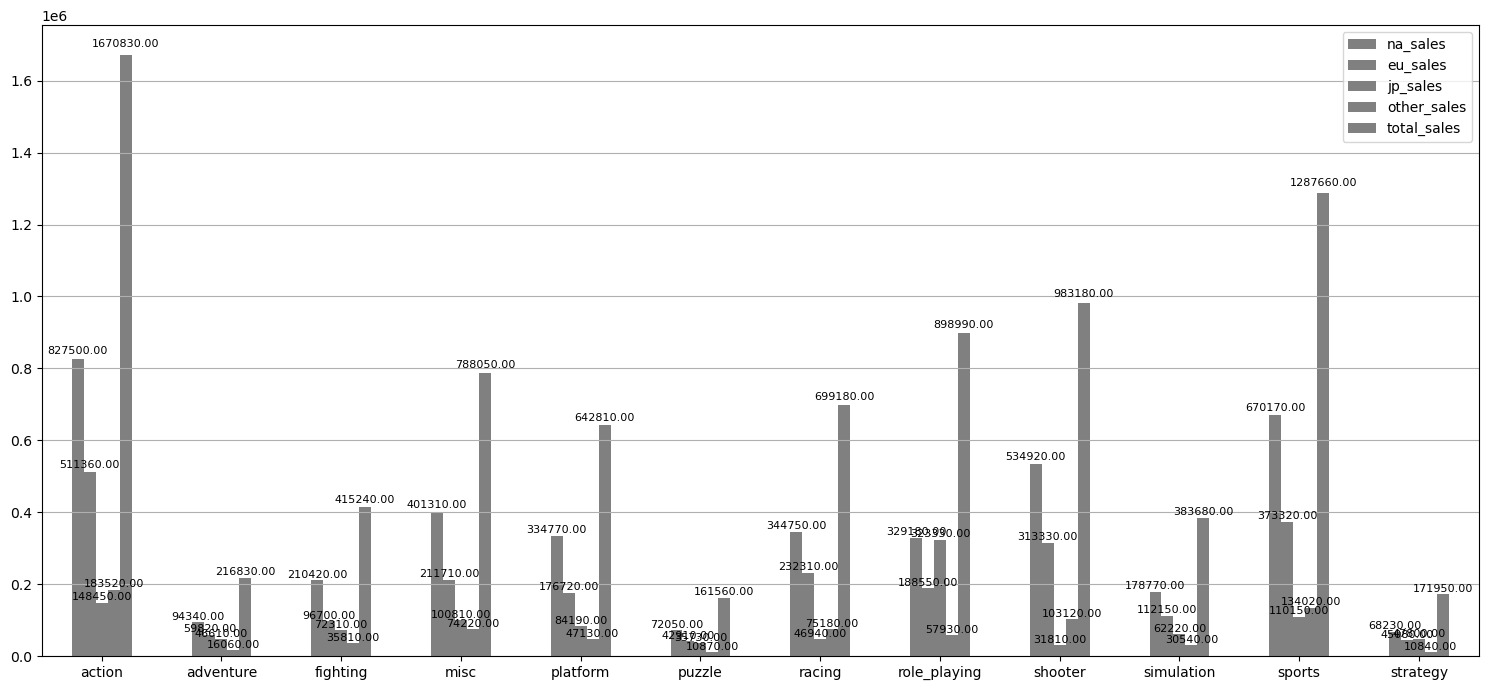

In [101]:
plot_grouped_bars(df_vg_games_genre, title='', xlabel='', ylabel='', x_rotation=0, y_rotation=0, grid_axis='y', color='grey', show_values=True)

## 4. Conclusions and key insights

### 🎯 Key Findings

#### Behavioral Insights

1. Top-performing genres
    - Action, Sports, and Shooter are the genres with the highest global sales.
    - Niche genres such as Puzzle or Simulation have lower sales volume but may still offer profitable opportunities in targeted markets.

2. Historically successful platforms
    - Consoles like the PS2, Xbox 360, and Wii dominate in cumulative sales.
    - There’s a clear correlation between high sales and the size of the platform's installed user base.

3. Regional market differences
    -North America accounts for the largest portion of sales, followed by Europe.
    - Japan demonstrates unique consumption preferences, favoring different platforms and genres, highlighting the importance of regional   
    strategies.

4. High variability in sales
    - The coefficient of variation indicates significant dispersion in sales, where a small number of titles generate the majority of 
    revenue.
    - This supports the idea that the market is highly competitive and hit-driven.

Recommendations

- Enrich the dataset with more recent data, including digital, mobile, and PC platforms (e.g., Steam).
- Include time-series analysis to detect cyclical or seasonal patterns.
- Analyze the relationship between review scores and sales performance to better understand the impact of perceived quality.

